# Bibliotecas utilizadas

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
import scipy.stats as stats
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Tratando os dados

In [75]:
data = pd.read_csv('./ailerons.csv')
selected_columns = ['ClimbRate', 'Sgz', 'P', 'Q', 'CurPitch', 'CurRoll', 'AbsRoll', 'DiffClb', 
                    'DiffRollRate', 'DiffDiffClb', 'DiffSeTime1', 'DiffSeTime3', 'DiffSeTime5', 
                    'DiffSeTime7', 'DiffSeTime9', 'DiffSeTime11', 'DiffSeTime13', 'Alpha', 'Se', 'Goal']
selected_features = ['ClimbRate', 'Sgz', 'P', 'Q', 'CurPitch', 'CurRoll', 'AbsRoll', 'DiffClb', 
                    'DiffRollRate', 'DiffDiffClb', 'DiffSeTime1', 'DiffSeTime3', 'DiffSeTime5', 
                    'DiffSeTime7', 'DiffSeTime9', 'DiffSeTime11', 'DiffSeTime13', 'Alpha', 'Se']
# Filter the DataFrame based on selected columns
data = data[selected_columns]

In [76]:
bins = [-np.inf, -0.0025, -0.0020, -0.0015, -0.0010, -0.0005, np.inf]
labels = [0, 1, 2, 3, 4, 5]

# Discretize the 'Goal' column
data['Goal'] = pd.cut(data['Goal'], bins=bins, labels=labels, right=False)
data

ClimbRate  Sgz     P     Q  CurPitch  CurRoll  AbsRoll  DiffClb  \
0            -17   -6 -0.03  0.14      0.59     -0.5      -11       -9   
1           -791   15 -0.28 -0.34      1.11      0.9      -10       27   
2            -46   48 -0.42  0.07      0.57      0.6       -5       -8   
3            496   -5 -0.21 -0.04      0.03     -0.5       -7        6   
4           -124   16 -0.02  0.05      0.61     -0.2       -9       -3   
...          ...  ...   ...   ...       ...      ...      ...      ...   
13745        -53  -13 -0.07  0.02      0.58     -2.3      -15       12   
13746          1    4 -0.11 -0.07      0.47      0.8       -5        8   
13747        425  -14  0.40  0.07      0.41     -2.1      -16       12   
13748        102  -10 -0.19  0.08      1.30      0.5      -10       -3   
13749       -165   52  0.08  0.42      1.07     -1.6      -22      -15   

       DiffRollRate  DiffDiffClb  DiffSeTime1  DiffSeTime3  DiffSeTime5  \
0             0.015         -0.2        0.000       -0.002          0.0   
1            -0.002          4.7        0.000        0.000          0.0   
2            -0.008          0.0       -0.002        0.000          0.0   
3            -0.002         -0.1       -0.001        0.000          0.0   
4             0.000          0.0        0.000        0.000          0.0   
...             ...          ...          ...          ...          ...   
13745         0.022         -0.8        0.000        0.000          0.0   
13746        -0.003         -0.2        0.000        0.000          0.0   
13747         0.031         -0.7        0.000        0.000          0.0   
13748        -0.003         -0.2        0.000        0.000          0.0   
13749         0.007          0.0       -0.002        0.000          0.0   

       DiffSeTime7  DiffSeTime9  DiffSeTime11  DiffSeTime13  Alpha     Se Goal  
0           -0.002        0.000         0.000         0.000    0.6  0.021    4  
1            0.000        0.000         0.000         0.000    0.4  0.013    4  
2            0.000        0.000         0.000         0.000    0.5  0.019    5  
3            0.000        0.000         0.001         0.001    0.5  0.017    5  
4            0.000        0.000         0.000         0.000    0.5  0.018    4  
...            ...          ...           ...           ...    ...    ...  ...  
13745        0.000        0.000         0.000        -0.001    0.5  0.019    4  
13746        0.000        0.000         0.000         0.000    0.5  0.016    5  
13747        0.000        0.001         0.000         0.001    0.9  0.032    3  
13748        0.000        0.000         0.000         0.000    1.4  0.051    3  
13749        0.000        0.000         0.000         0.000    0.9  0.034    2  

[13750 rows x 20 columns]

# Questões

### II

In [81]:
X = data[selected_features]
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = data['Goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Adicionar uma constante para o intercepto

# Criar e treinar o modelo
model = LogisticRegression(max_iter=100000)
result = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Obter os coeficientes e interceptos do modelo
coefficients = model.coef_
intercepts = model.intercept_

# Calcular os odds-ratios exponenciando os coeficientes
odds_ratios = np.exp(coefficients)
odds_ratios_intercepts = np.exp(intercepts)

# Exibir os odds-ratios para os coeficientes independentes (interceptos)
print("Odds-Ratios para os coeficientes independentes (interceptos) de cada classe:")
for i, intercept in enumerate(odds_ratios_intercepts):
    print(f"Classe {i}: {intercept:.3f}")

# Exibir os odds-ratios para as features
print("\nOdds-Ratios para as features de cada classe:")
for i, class_coef in enumerate(odds_ratios):
    print(f"Classe {i}:")
    for j, coef in enumerate(class_coef):
        print(f"  Atributo {selected_features[j]}: {coef:.3f}")

# Comparar odds-ratios dos coeficientes independentes para todas as classes
print("\nComparação dos odds-ratios dos coeficientes independentes (interceptos):")
for i in range(len(odds_ratios_intercepts)):
    for j in range(i + 1, len(odds_ratios_intercepts)):
        print(f"Classe {i} vs Classe {j}:")
        print(f"  Classe {i}: {odds_ratios_intercepts[i]:.3f}")
        print(f"  Classe {j}: {odds_ratios_intercepts[j]:.3f}")
        ratio = odds_ratios_intercepts[i] / odds_ratios_intercepts[j]
        print(f"  Razão de odds (Classe {i} / Classe {j}): {ratio:.3f}")

              precision    recall  f1-score   support

           0       0.50      0.18      0.27        11
           1       0.54      0.33      0.41        43
           2       0.52      0.50      0.51       148
           3       0.68      0.63      0.66       548
           4       0.78      0.82      0.80      1405
           5       0.73      0.71      0.72       595

    accuracy                           0.73      2750
   macro avg       0.62      0.53      0.56      2750
weighted avg       0.73      0.73      0.73      2750

Odds-Ratios para os coeficientes independentes (interceptos) de cada classe:
Classe 0: 0.000
Classe 1: 0.002
Classe 2: 1.014
Classe 3: 319.440
Classe 4: 3774.737
Classe 5: 97.448

Odds-Ratios para as features de cada classe:
Classe 0:
  Atributo ClimbRate: 1.312
  Atributo Sgz: 0.663
  Atributo P: 9.498
  Atributo Q: 1.849
  Atributo CurPitch: 1.386
  Atributo CurRoll: 6.650
  Atributo AbsRoll: 0.025
  Atributo DiffClb: 2.729
  Atributo DiffRollRate: 0.

# Naive Bayes

### V

In [63]:
X = data[selected_features]
y = data['Goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Combinar X_train e y_train para análise
train_data = pd.concat([X_train, y_train], axis=1)

# Separar os dados por classe
classes = train_data['Goal'].unique()
class_data = {cls: data[data['Goal'] == cls][selected_features] for cls in classes}



Classe 4
Atributo ClimbRate


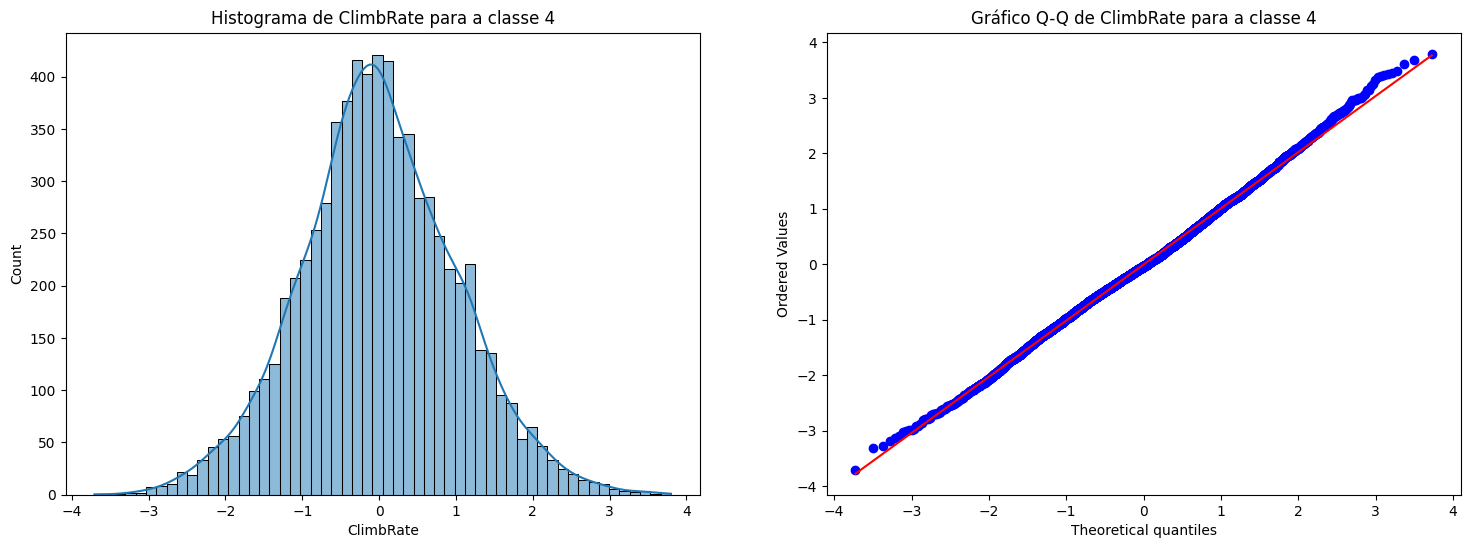

Atributo Sgz


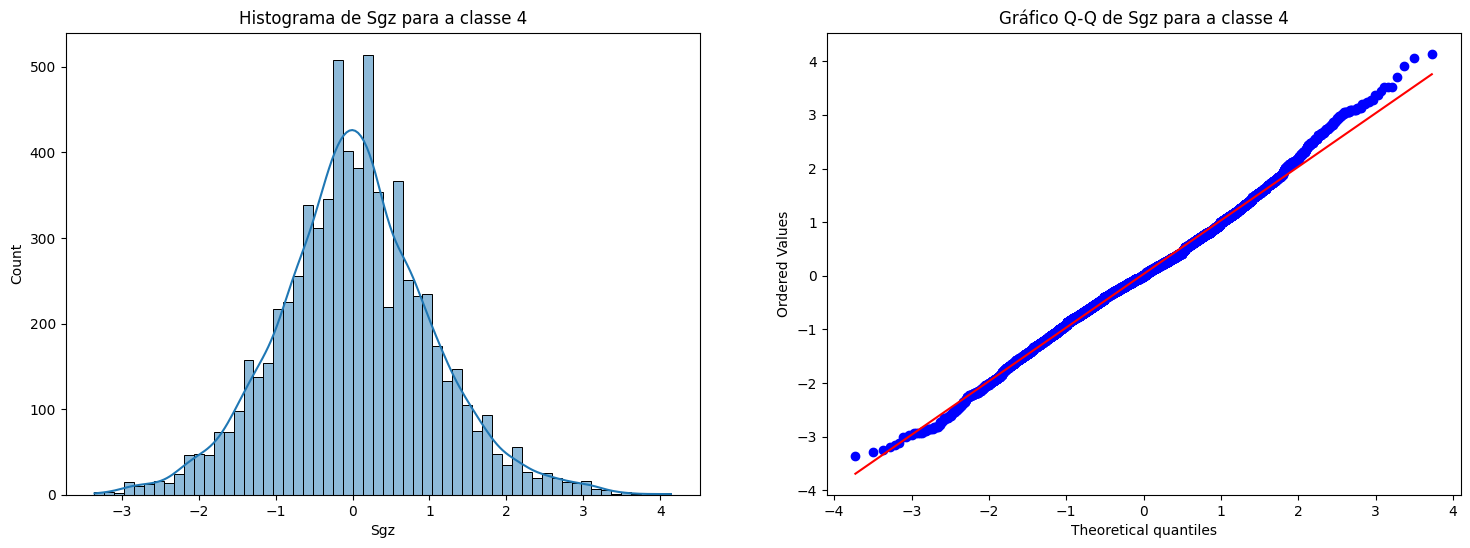

Atributo P


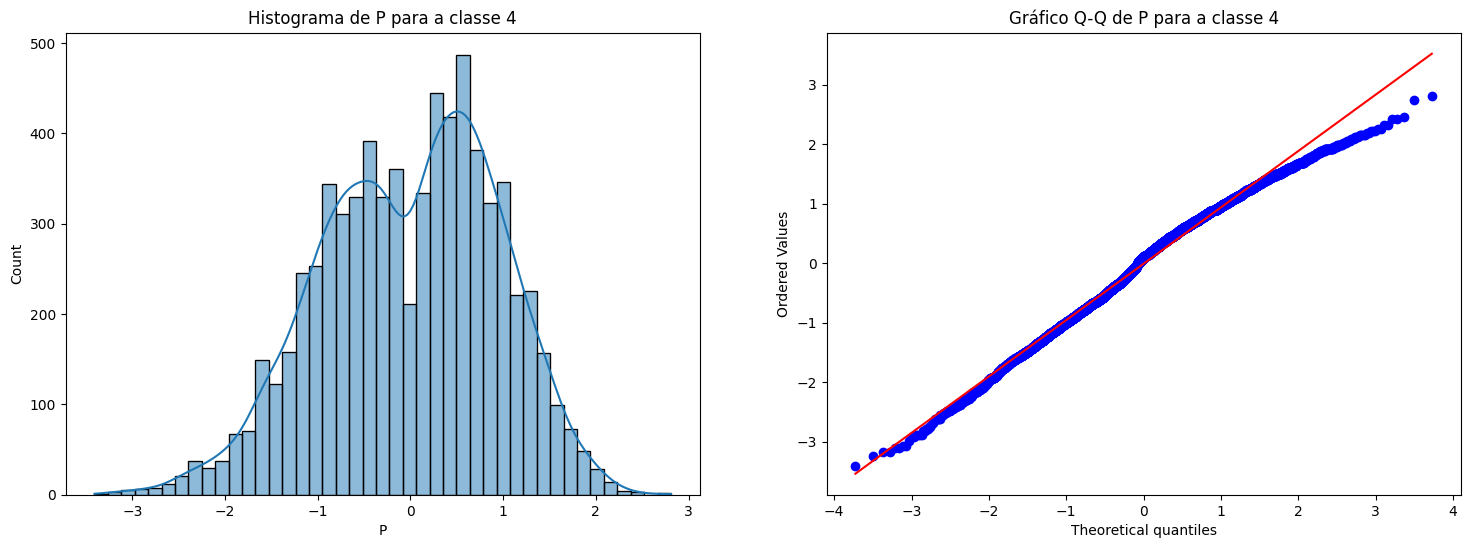

Atributo Q


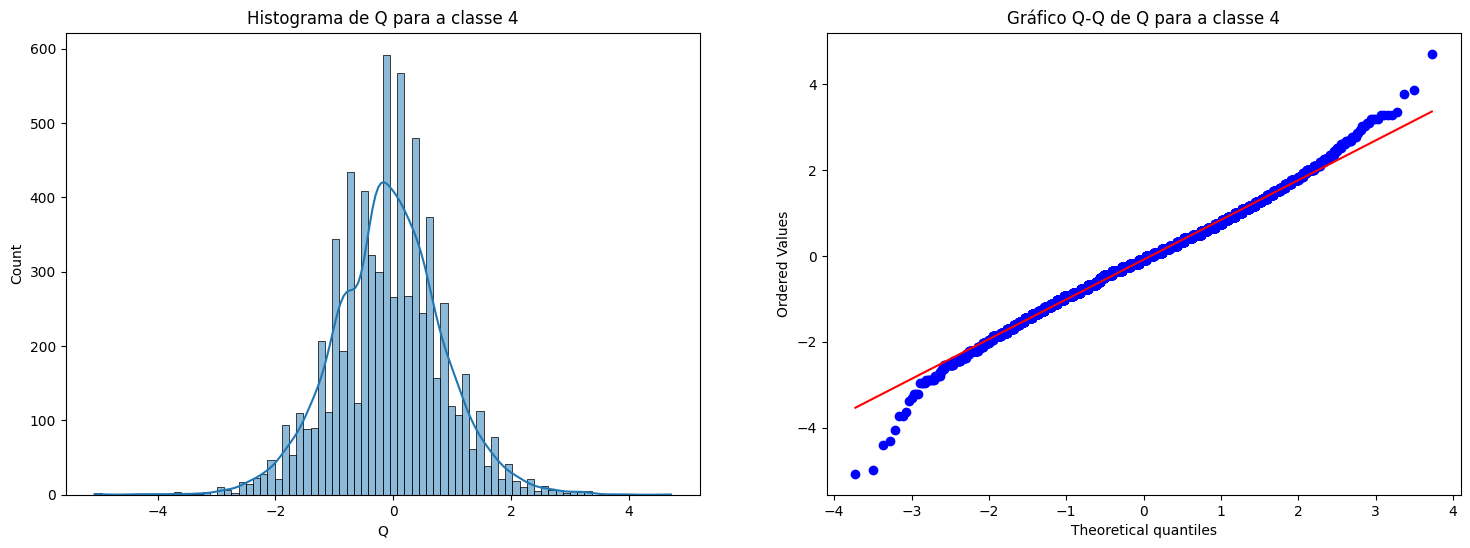

Atributo CurPitch


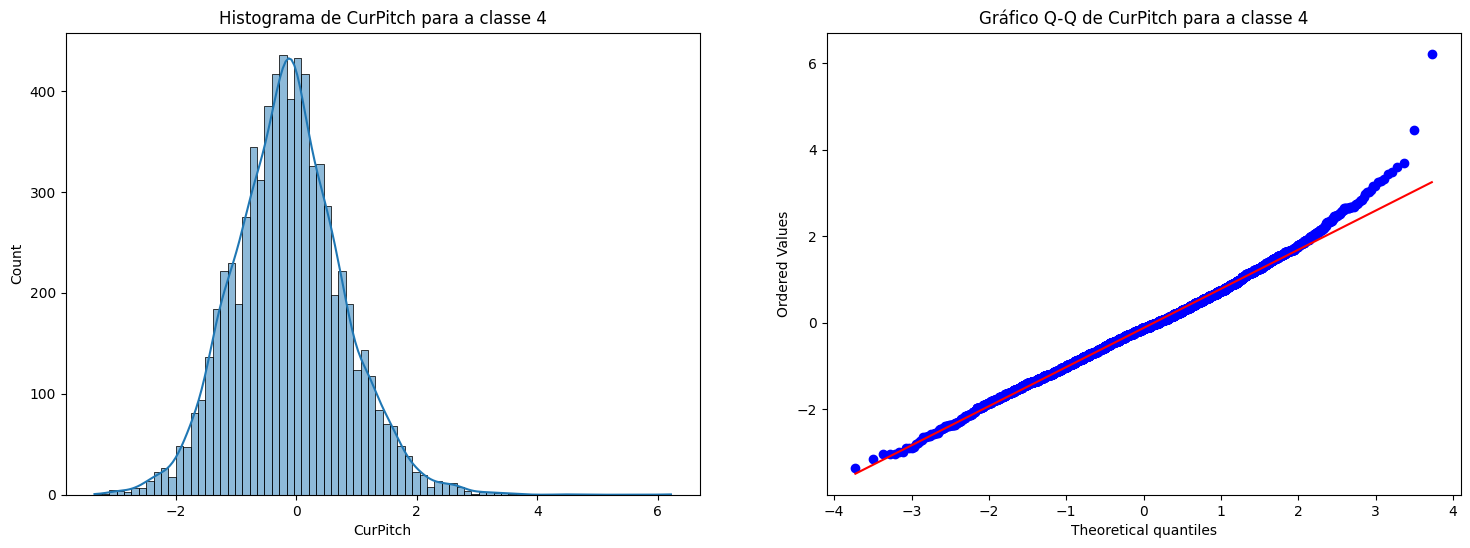

Atributo CurRoll


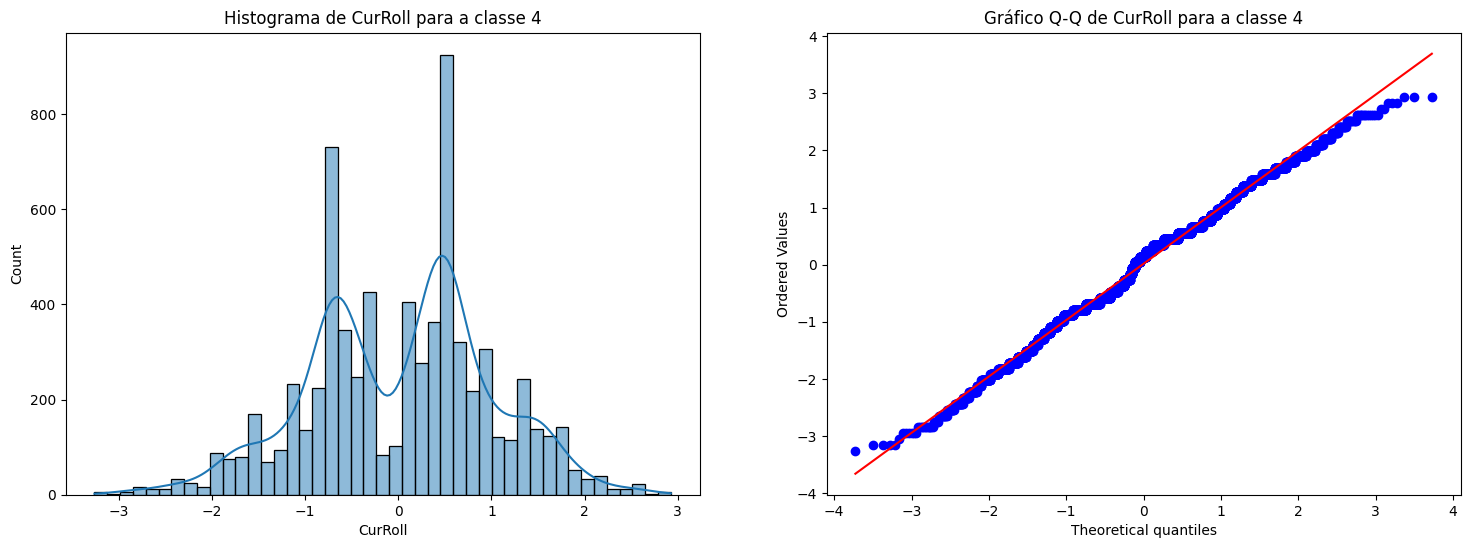

Atributo AbsRoll


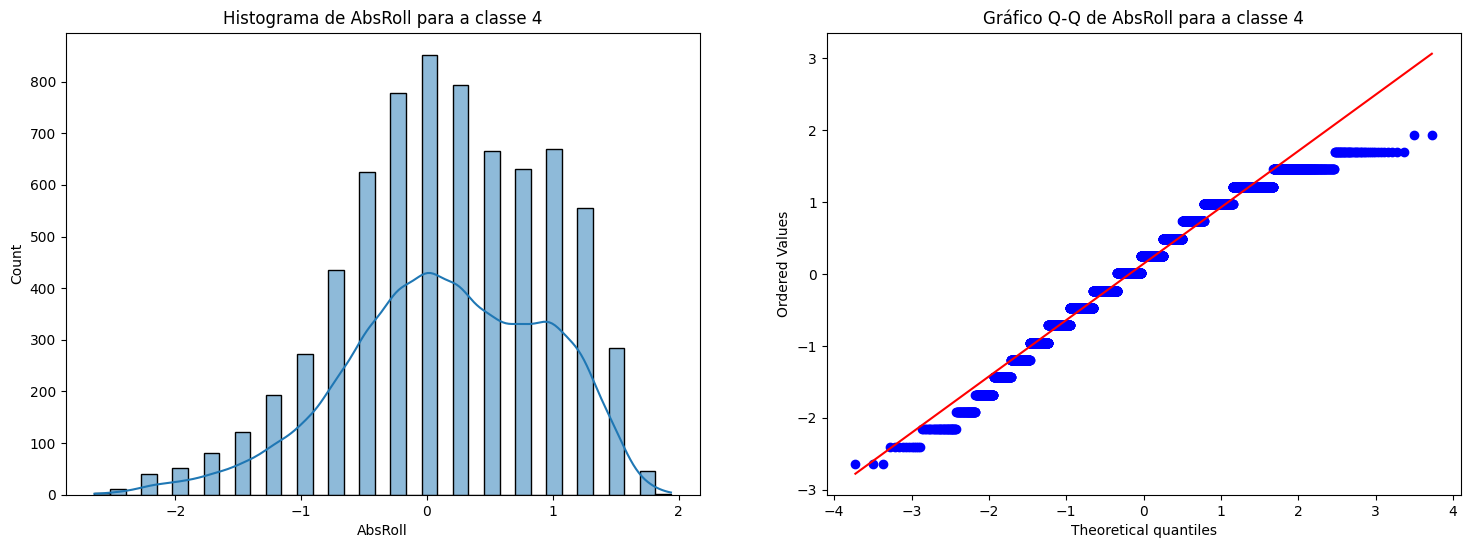

Atributo DiffClb


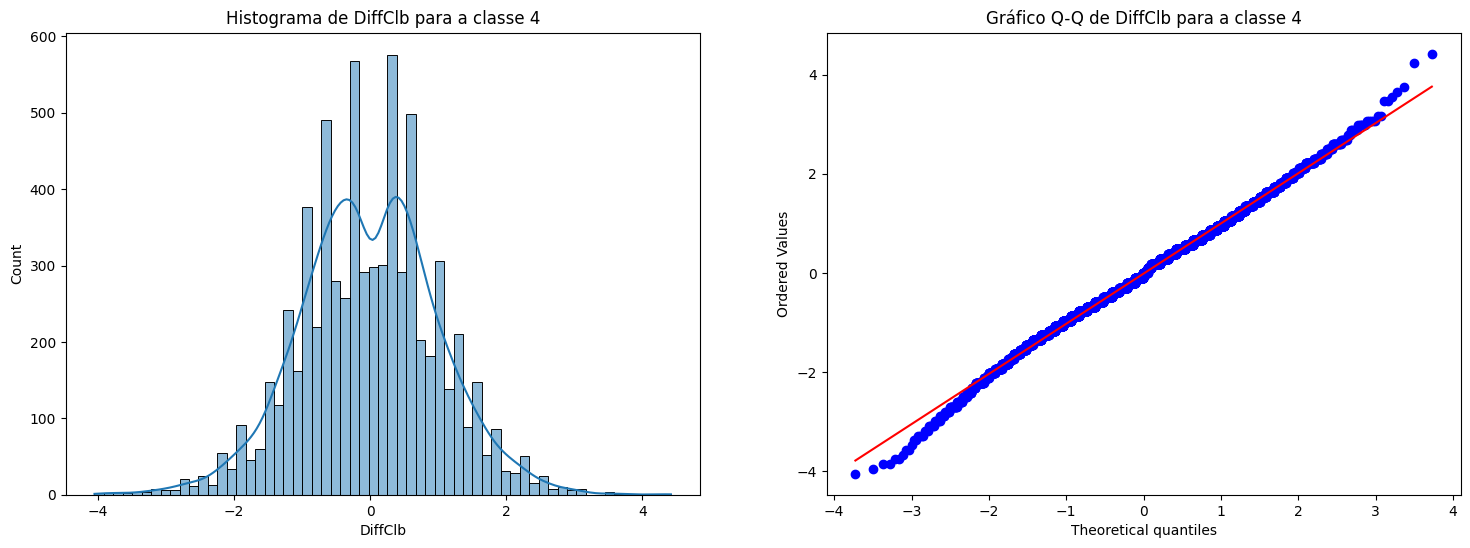

Atributo DiffRollRate


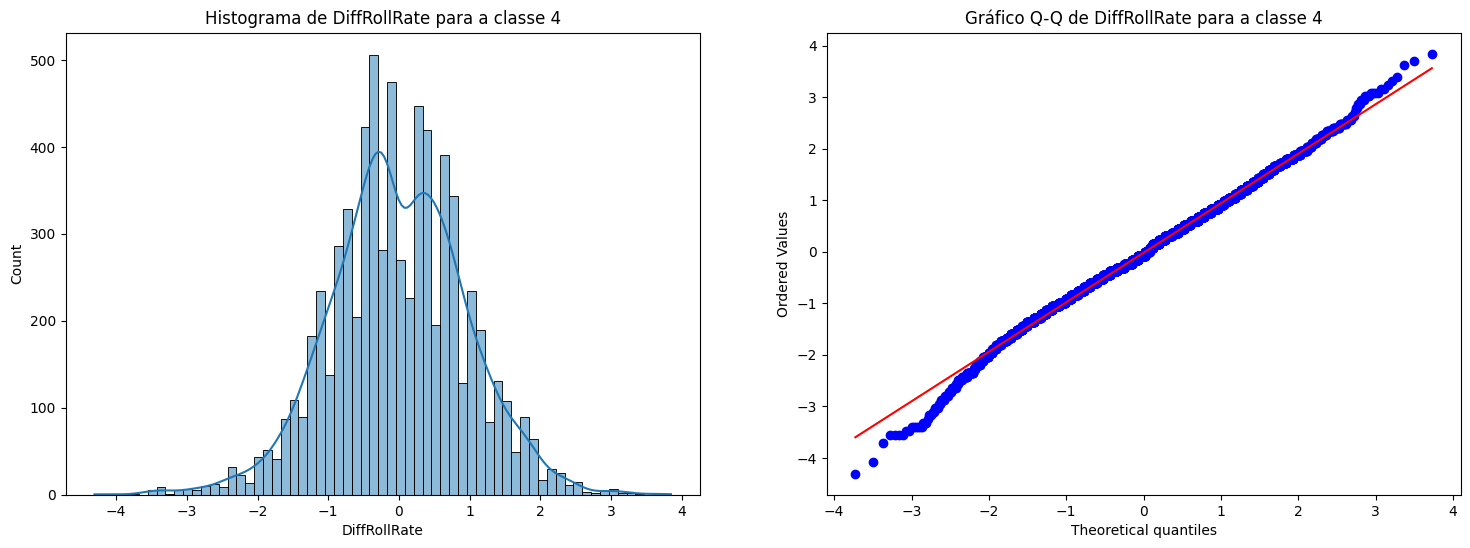

Atributo DiffDiffClb


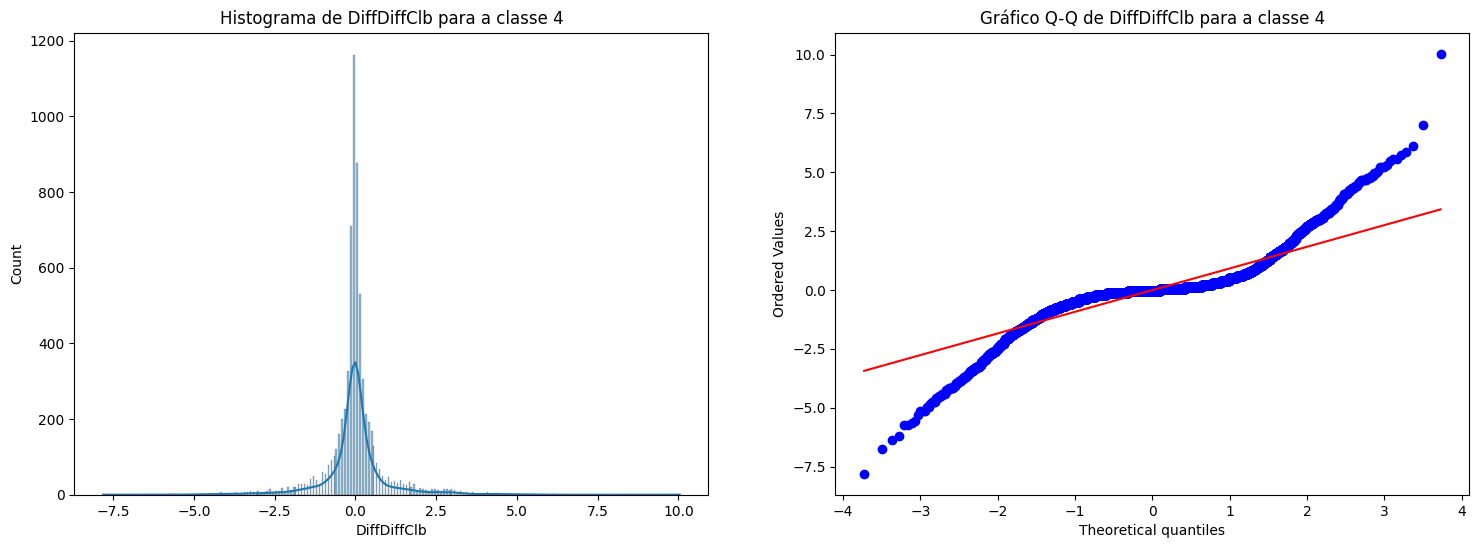

Atributo DiffSeTime1


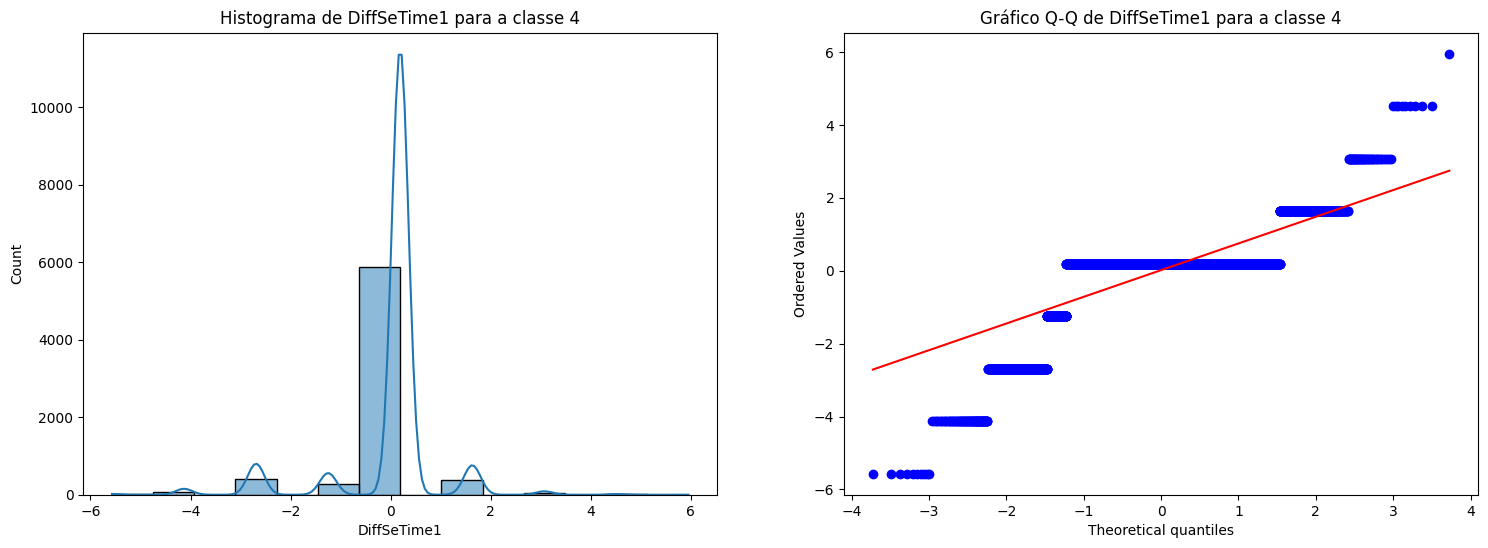

Atributo DiffSeTime3


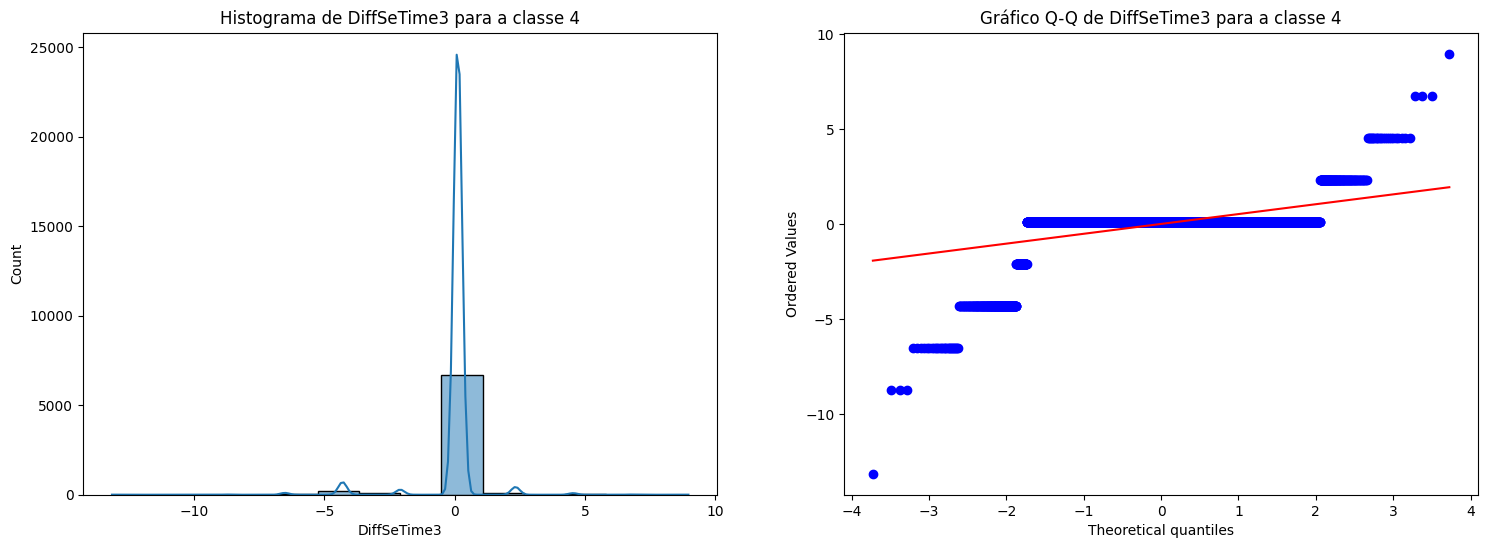

Atributo DiffSeTime5


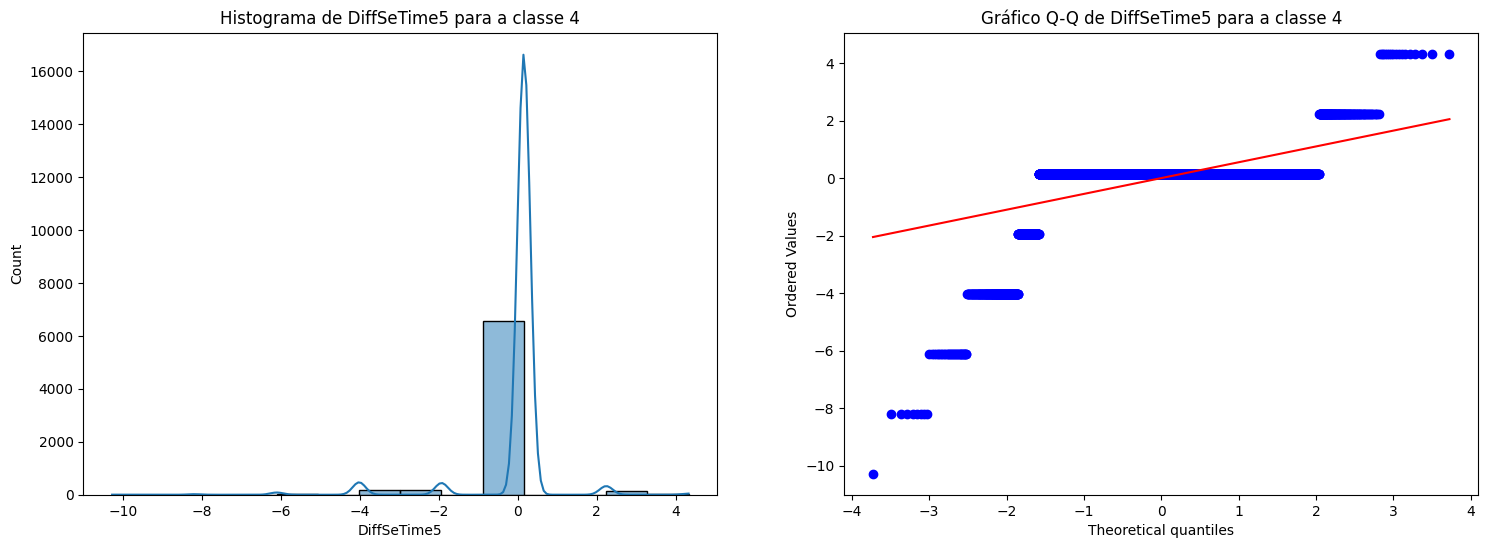

Atributo DiffSeTime7


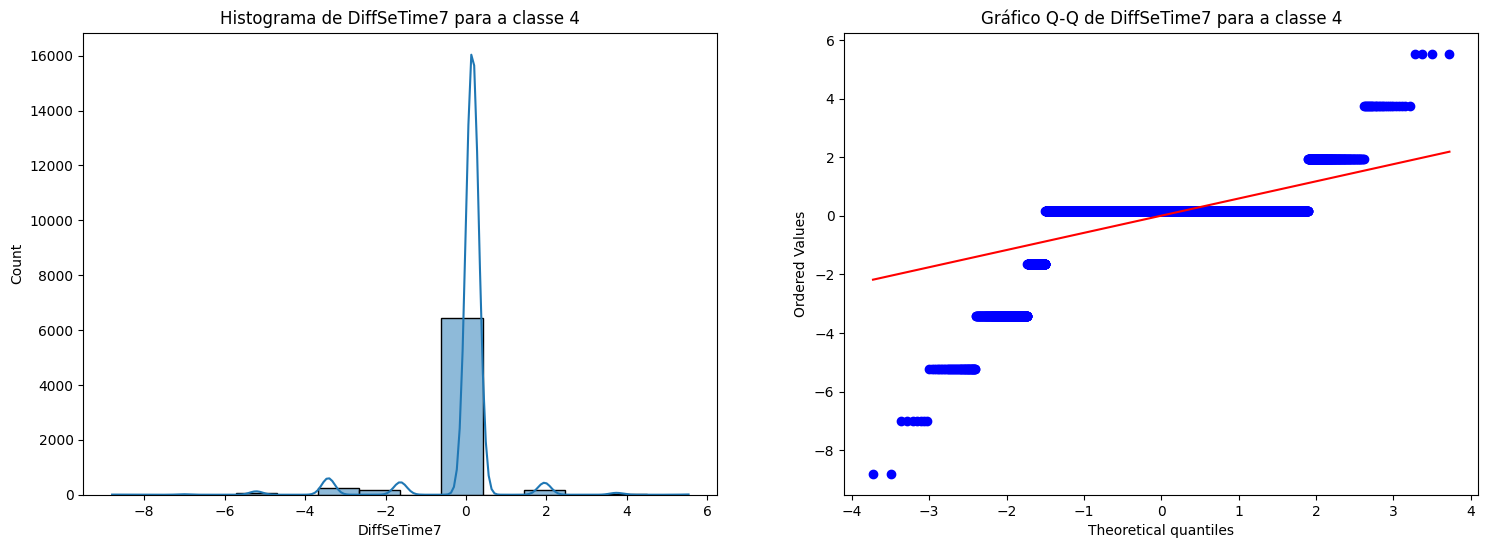

Atributo DiffSeTime9


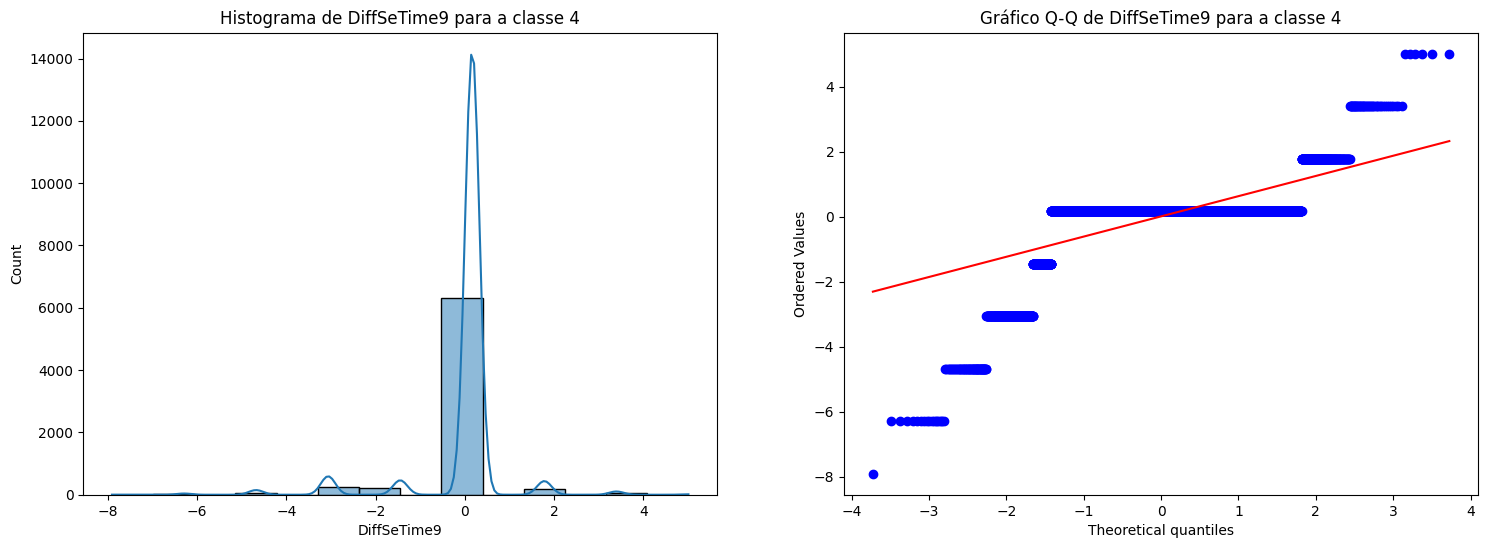

Atributo DiffSeTime11


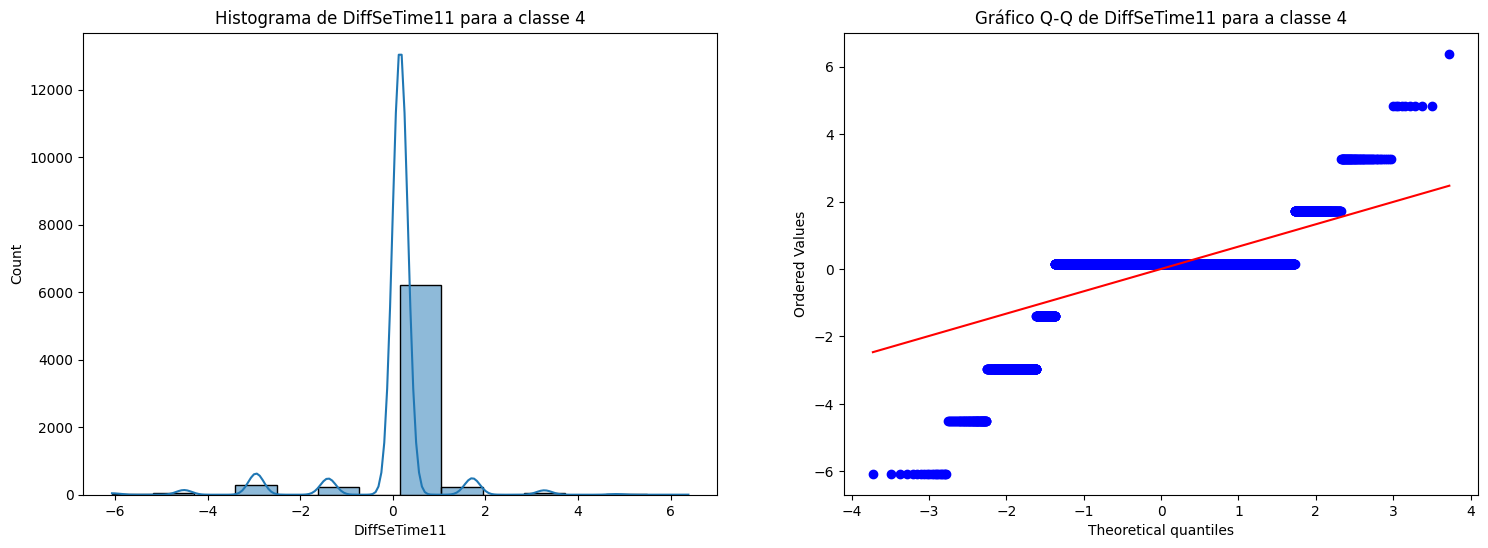

Atributo DiffSeTime13


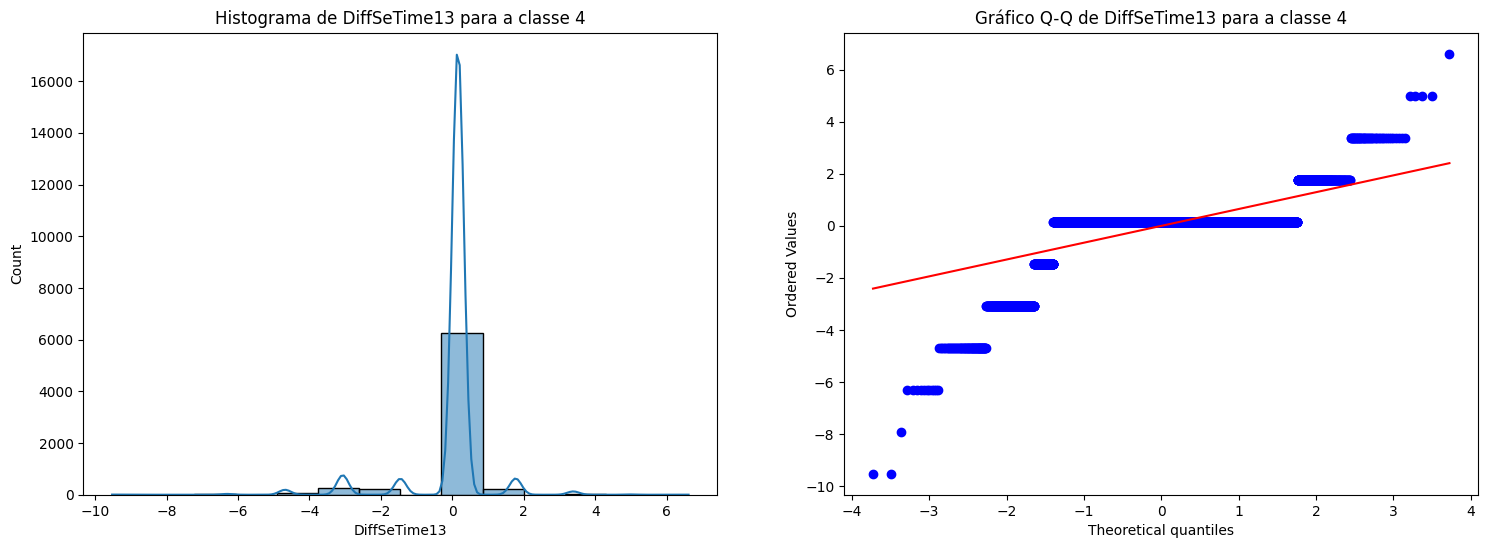

Atributo Alpha


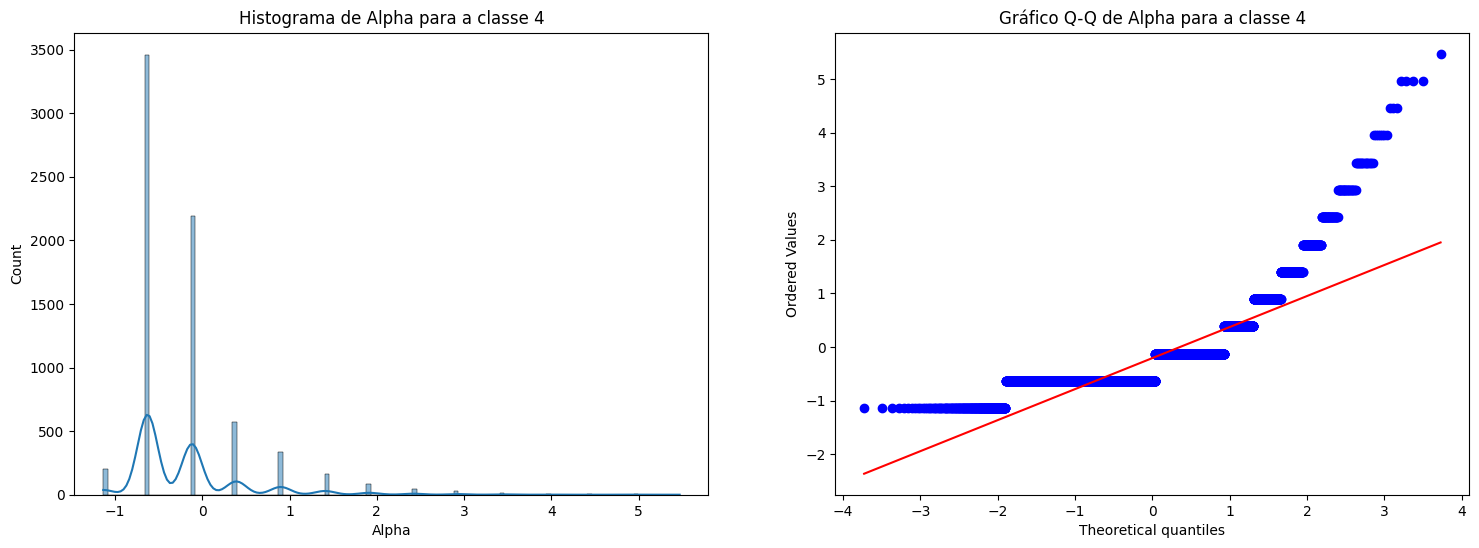

Atributo Se


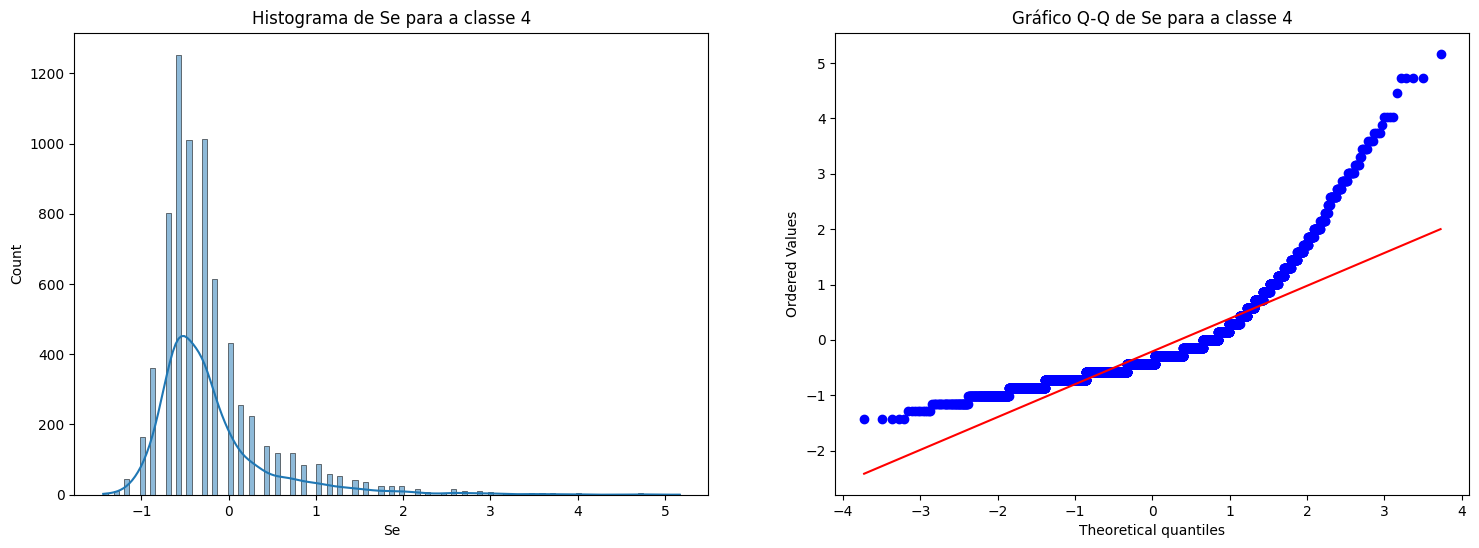

Classe 2
Atributo ClimbRate


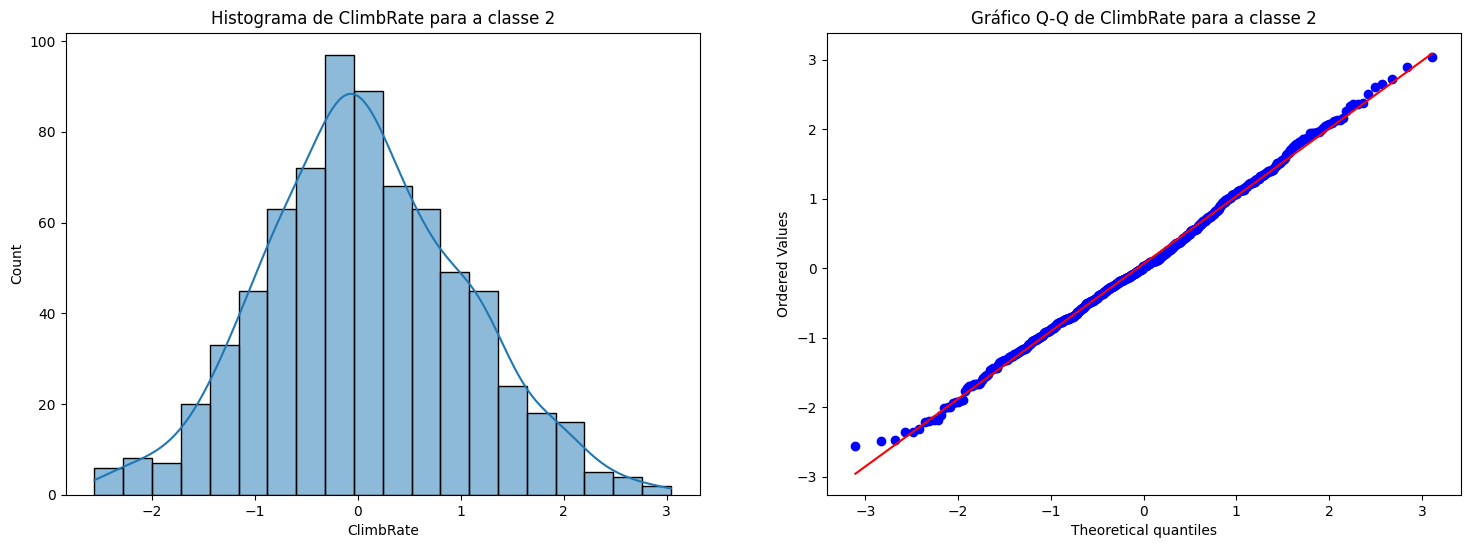

Atributo Sgz


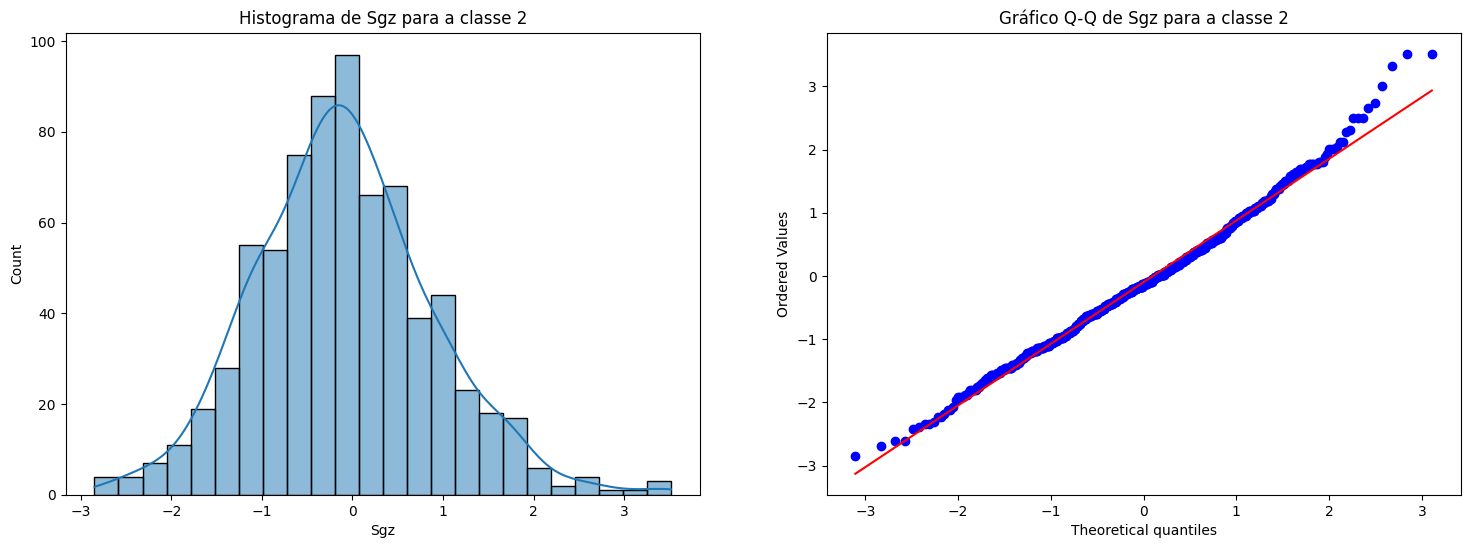

Atributo P


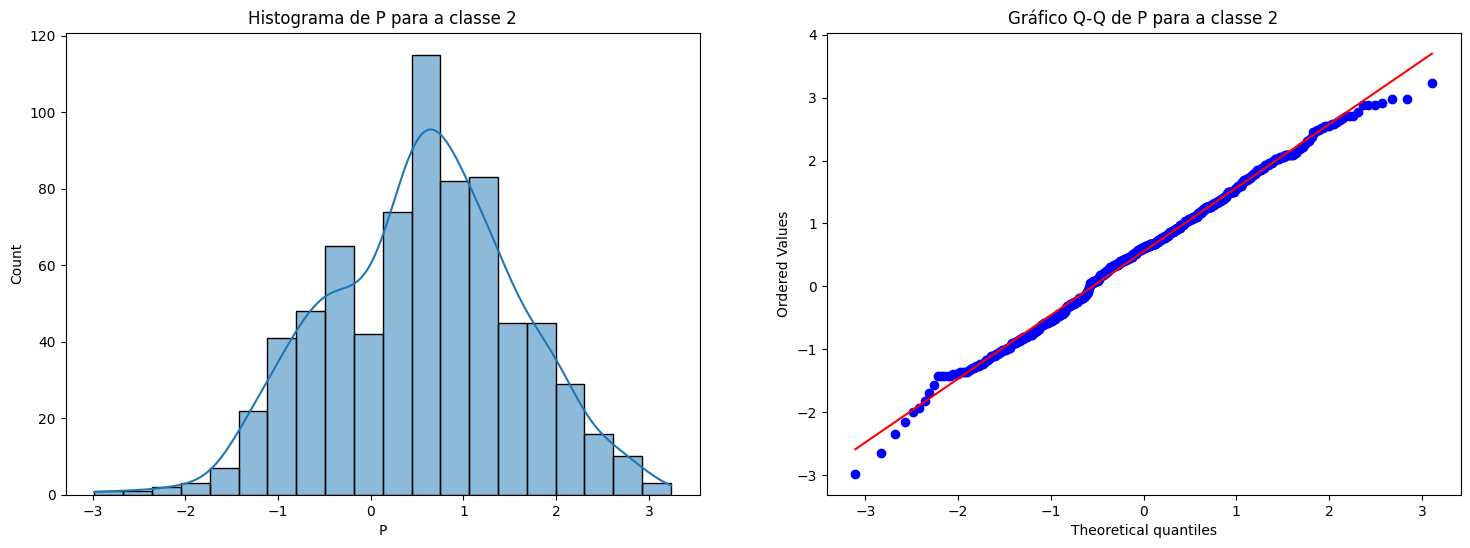

Atributo Q


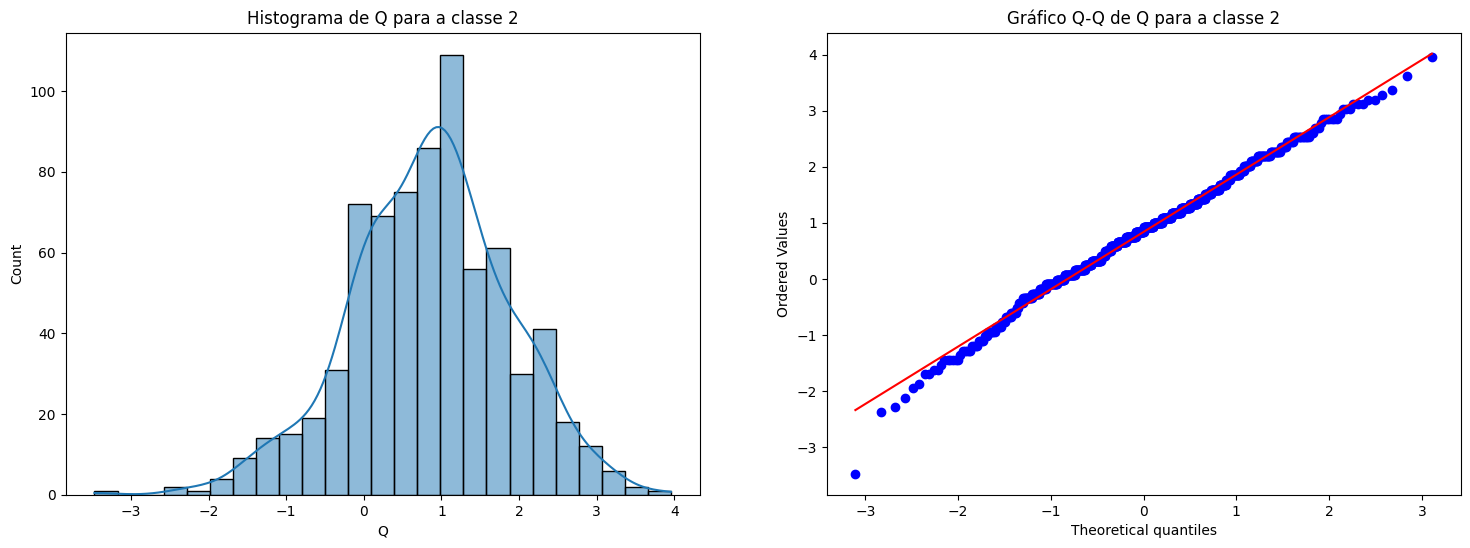

Atributo CurPitch


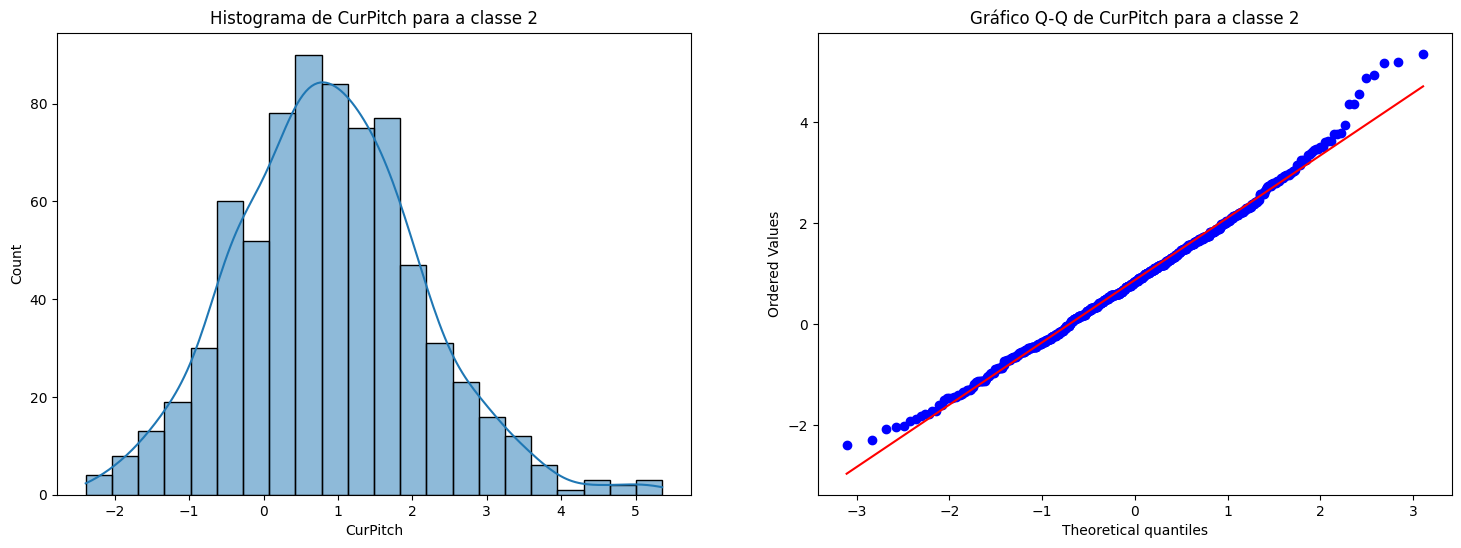

Atributo CurRoll


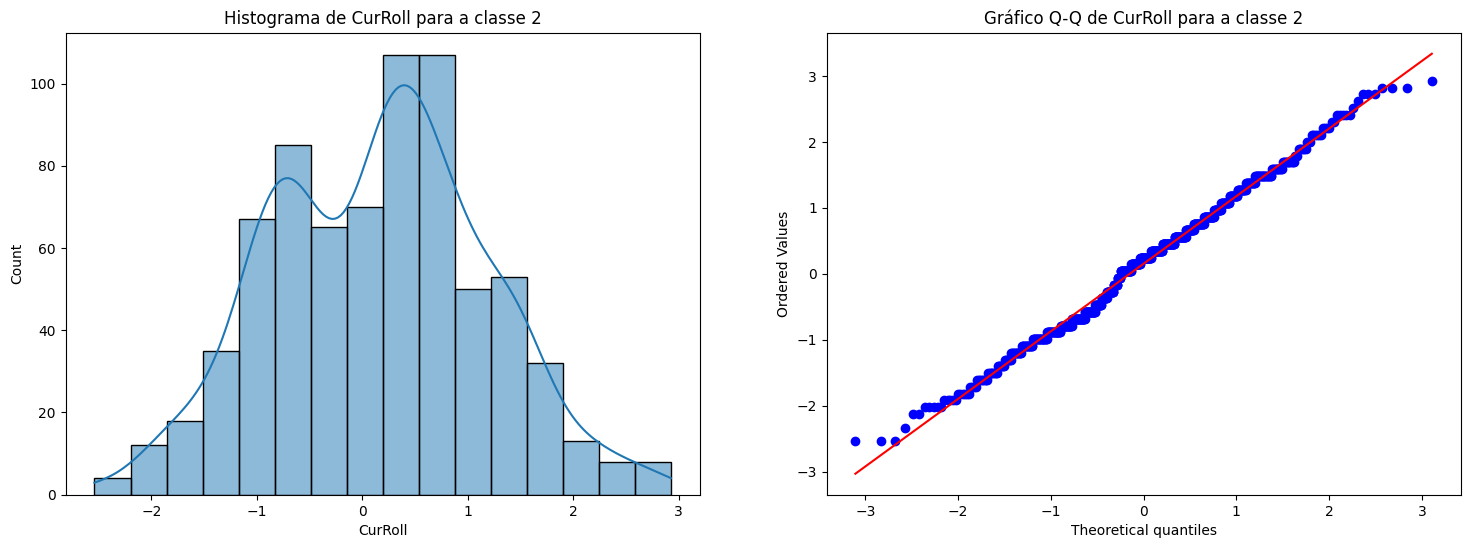

Atributo AbsRoll


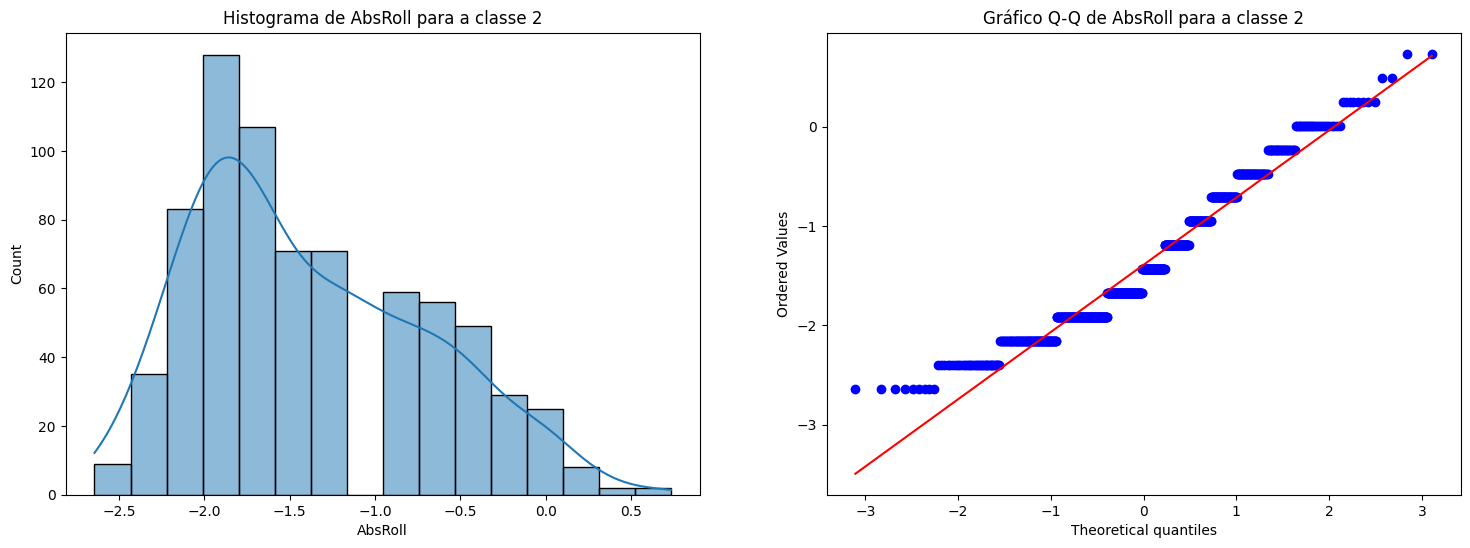

Atributo DiffClb


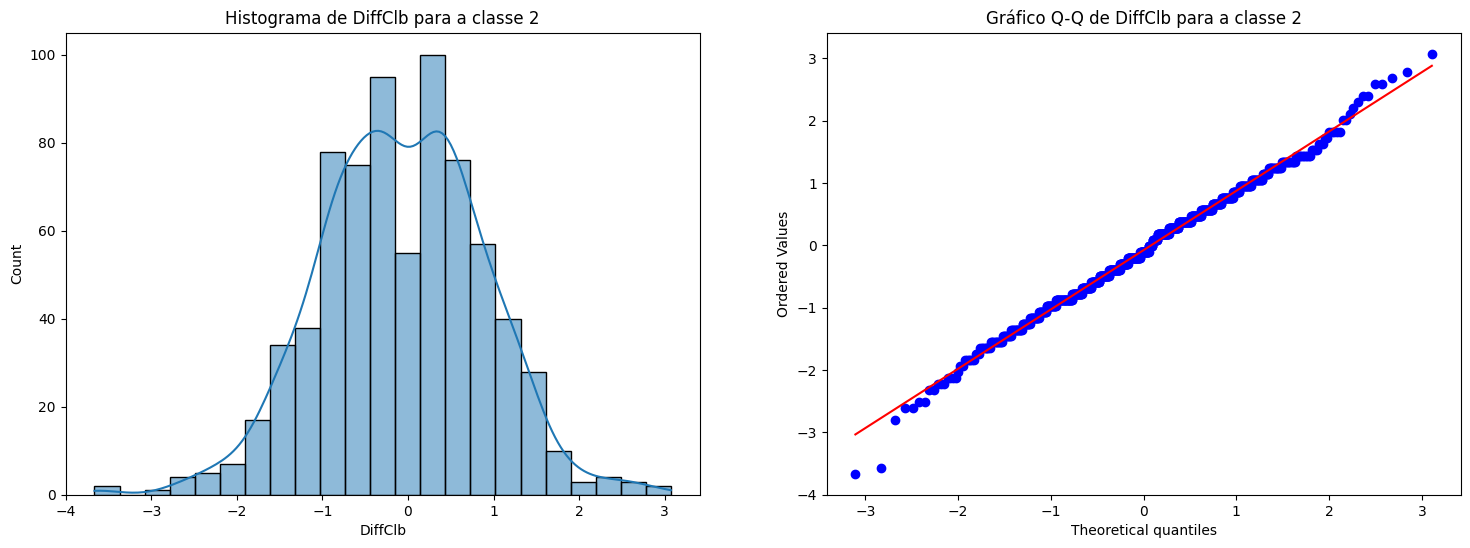

Atributo DiffRollRate


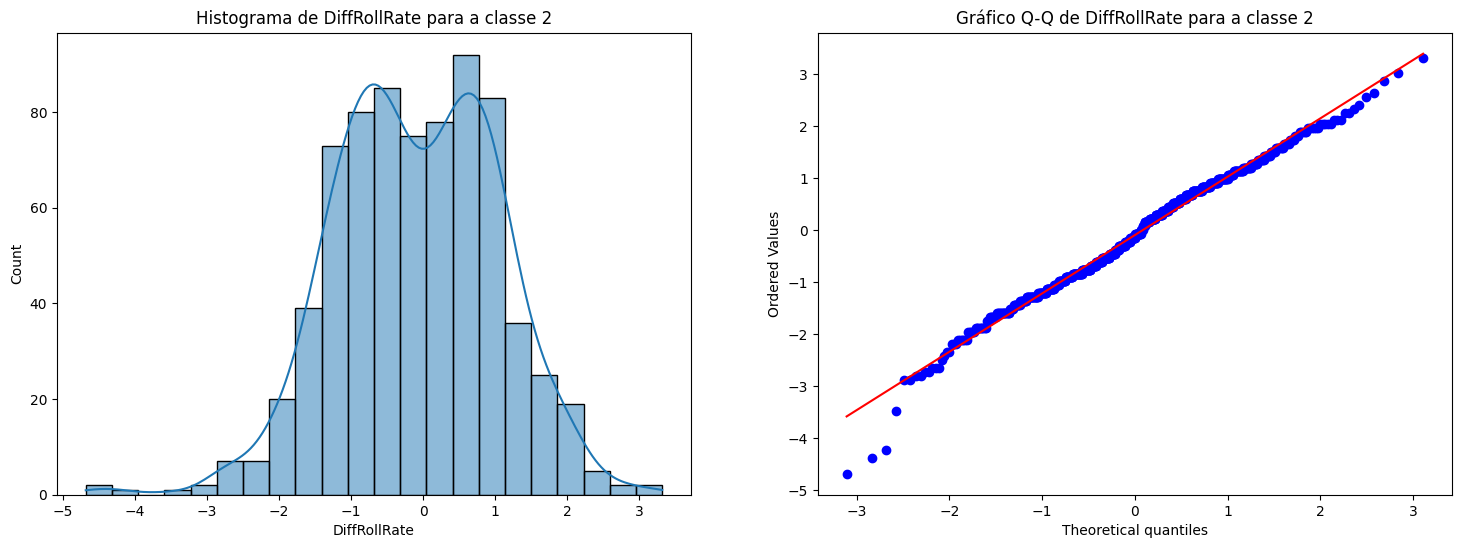

Atributo DiffDiffClb


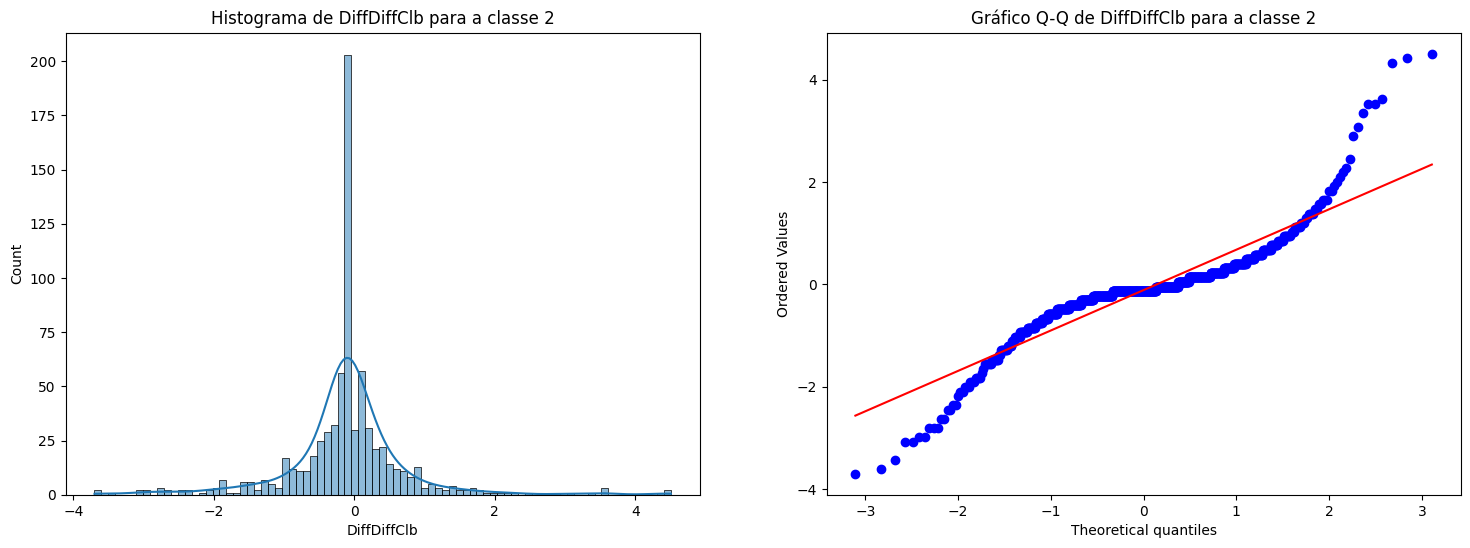

Atributo DiffSeTime1


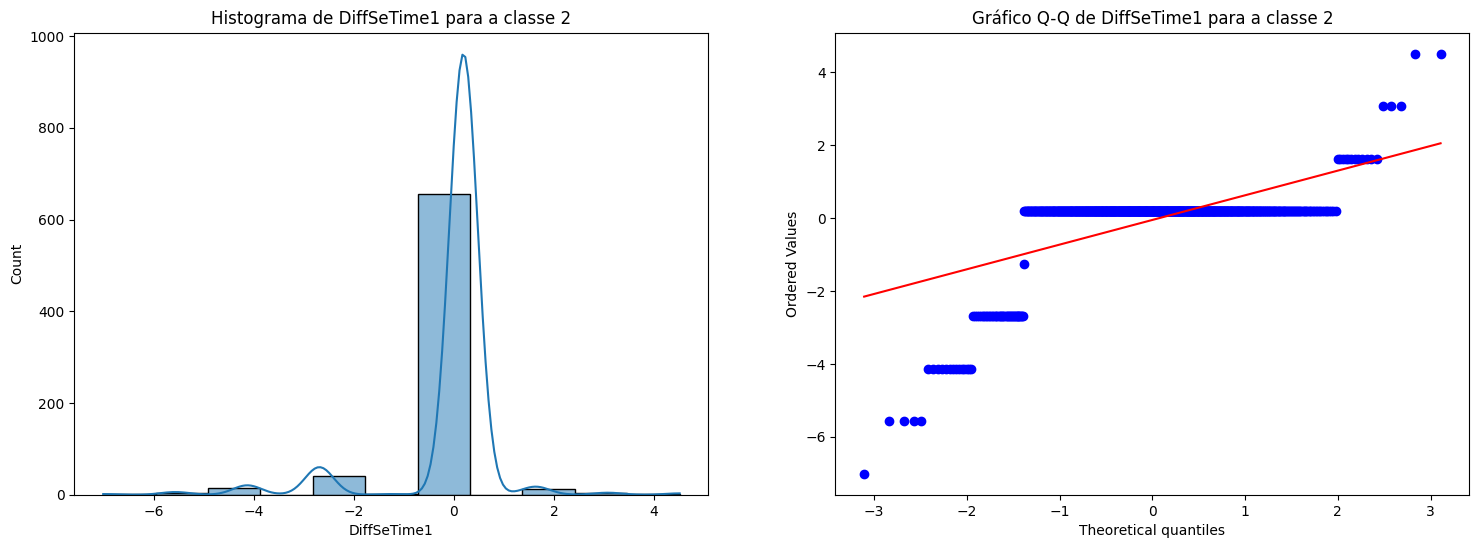

Atributo DiffSeTime3


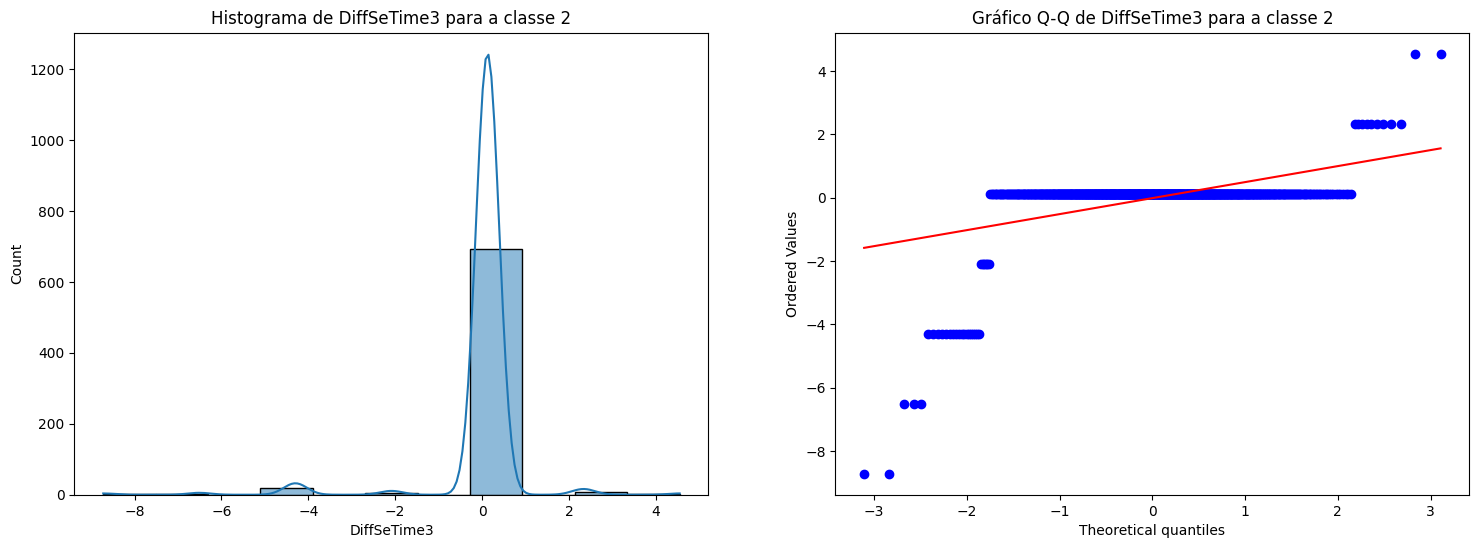

Atributo DiffSeTime5


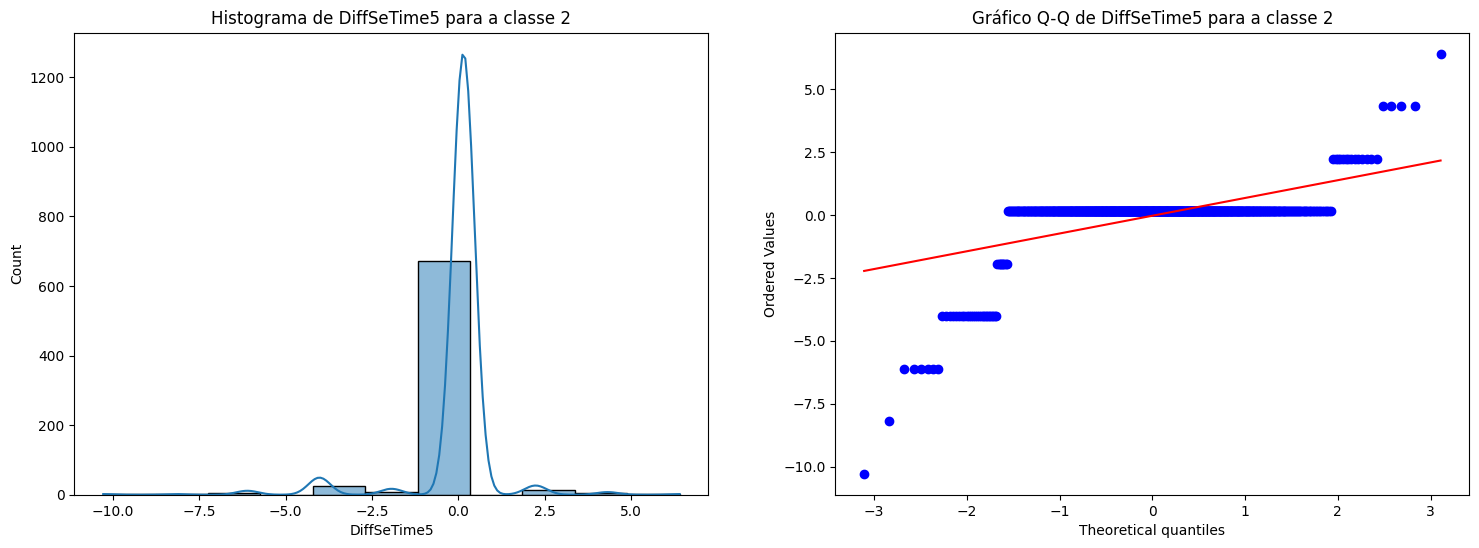

Atributo DiffSeTime7


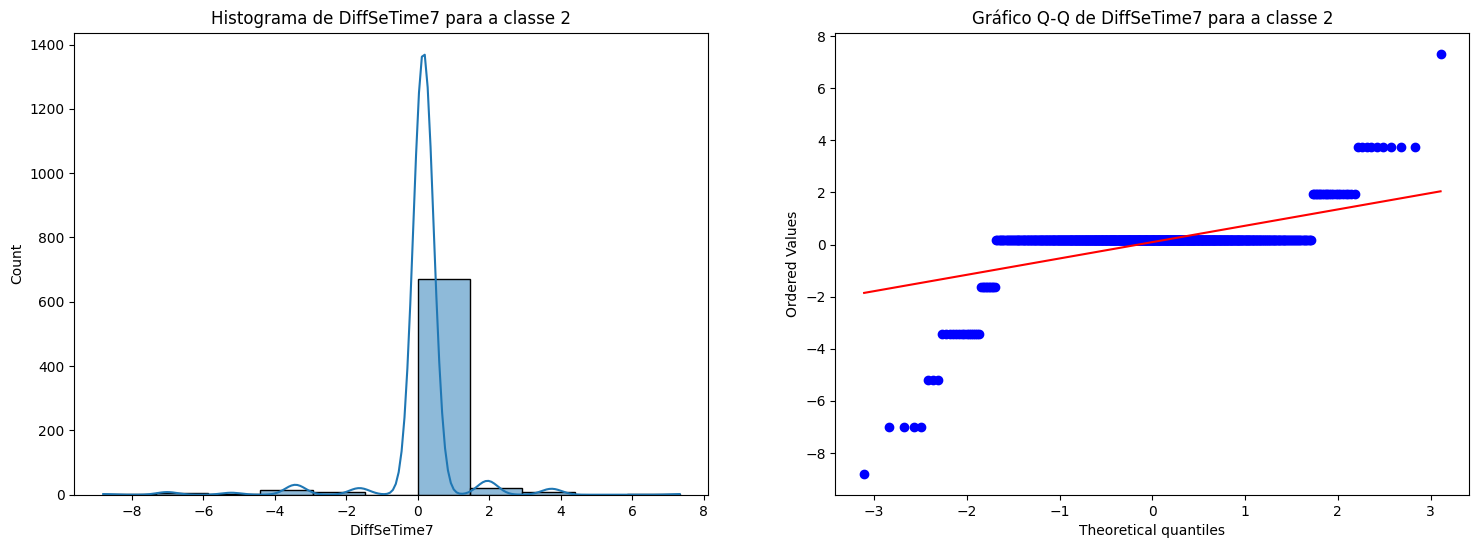

Atributo DiffSeTime9


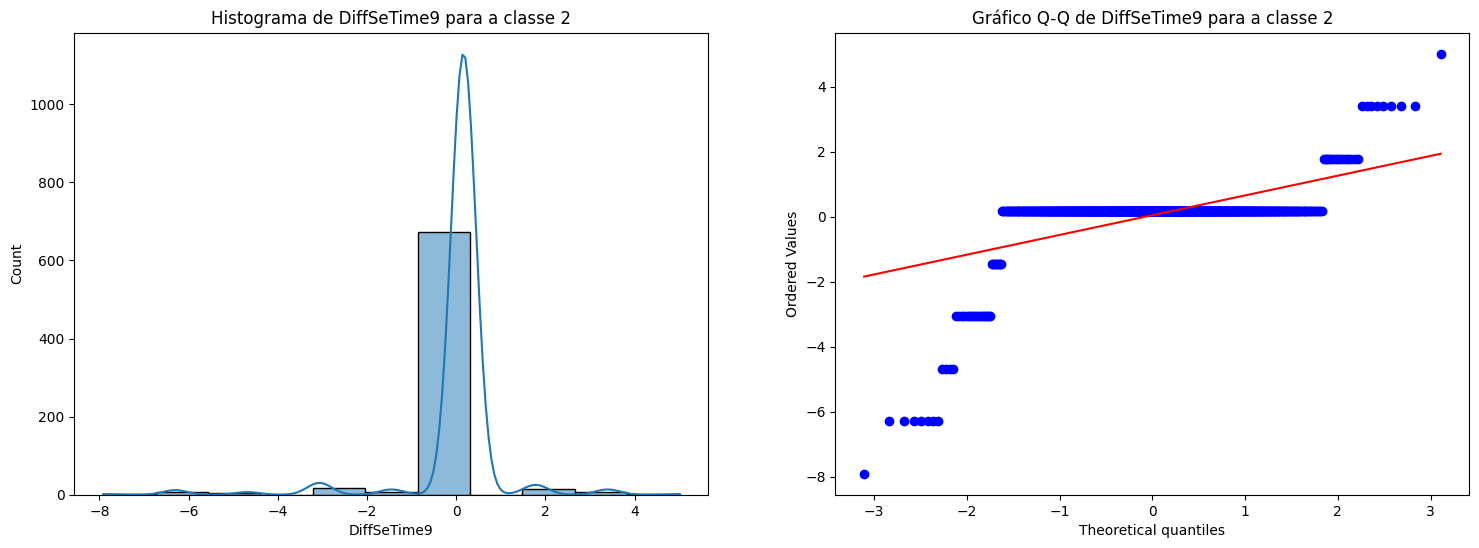

Atributo DiffSeTime11


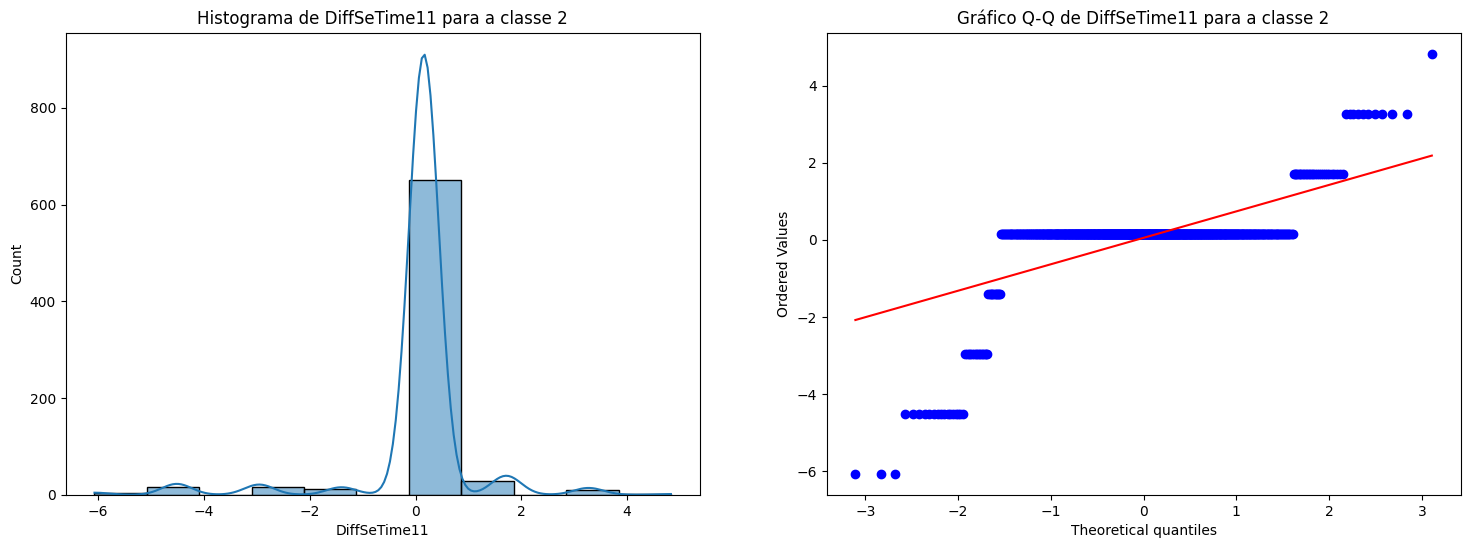

Atributo DiffSeTime13


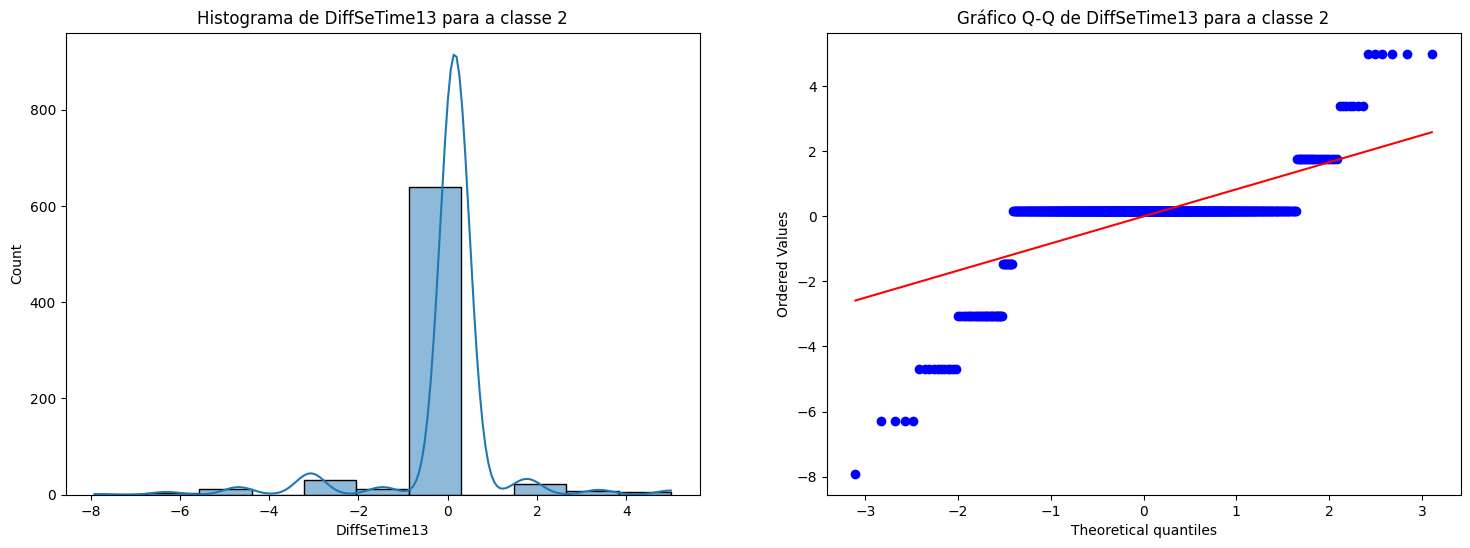

Atributo Alpha


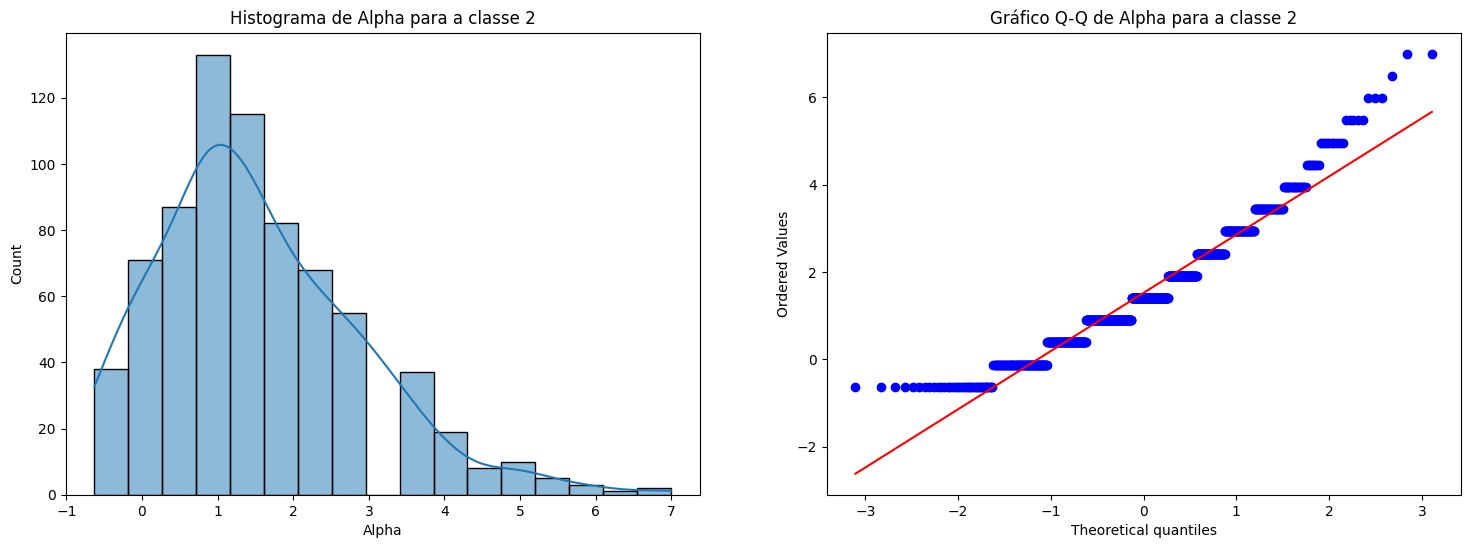

Atributo Se


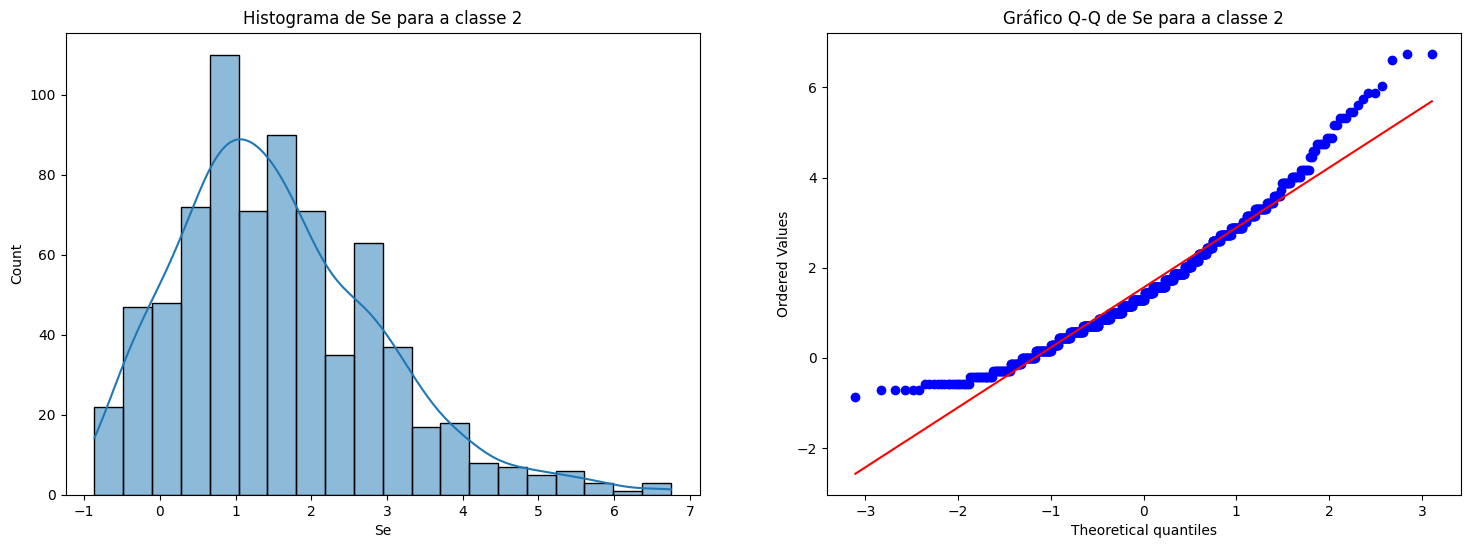

Classe 5
Atributo ClimbRate


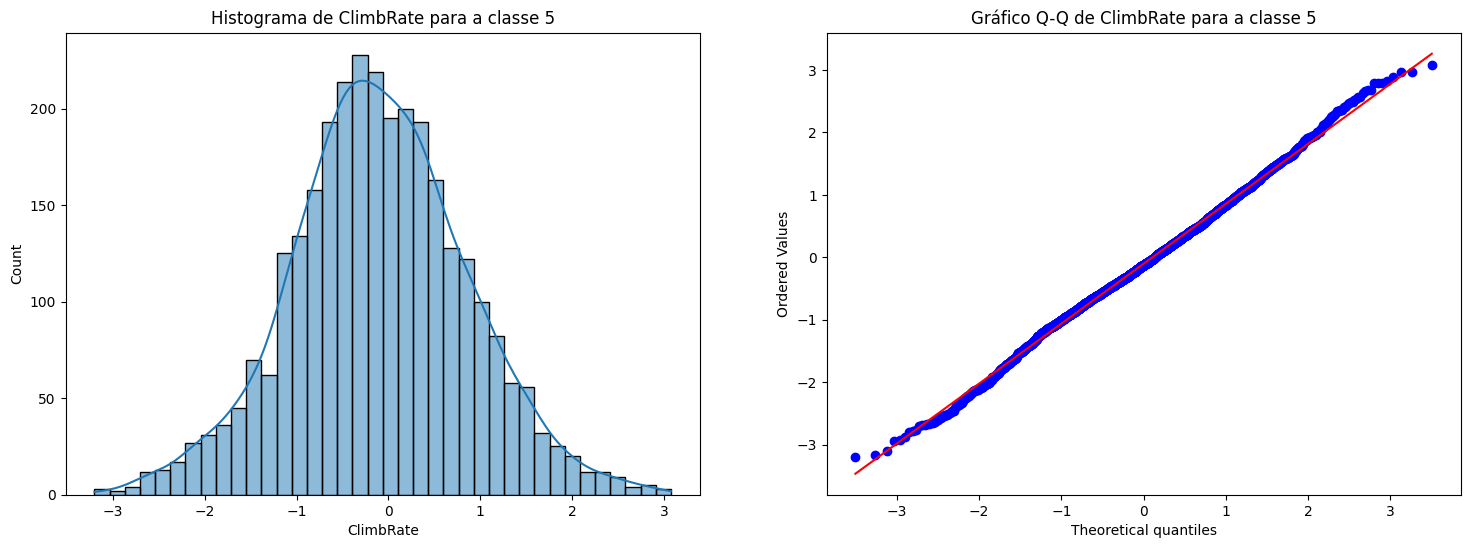

Atributo Sgz


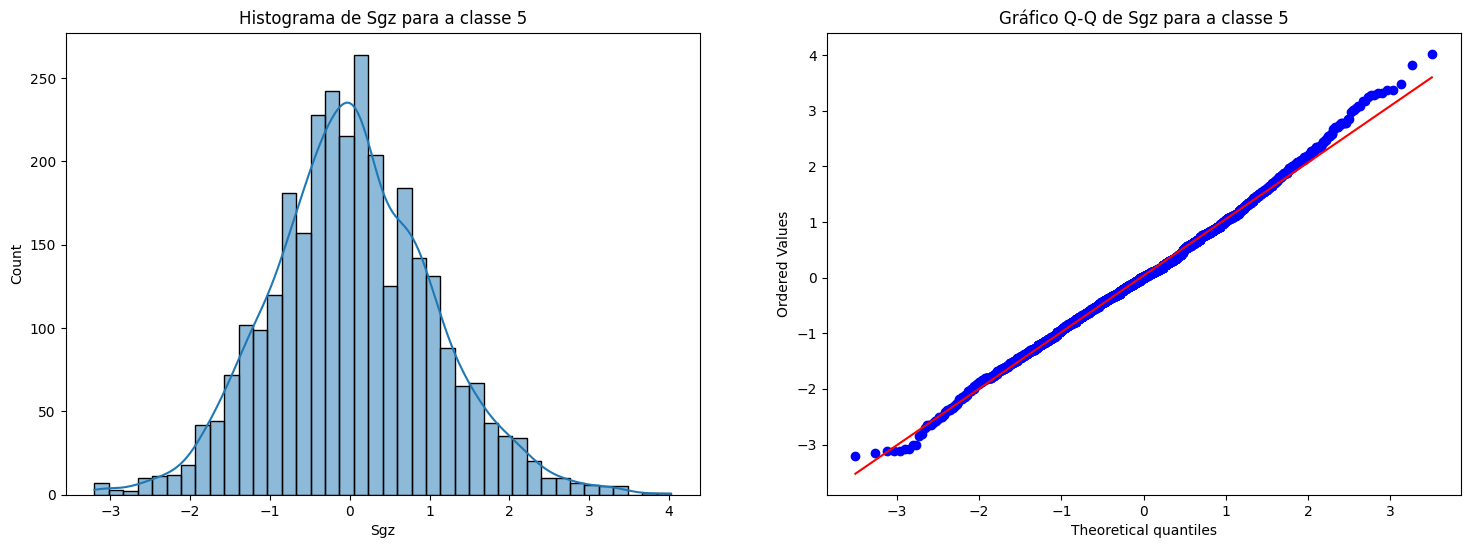

Atributo P


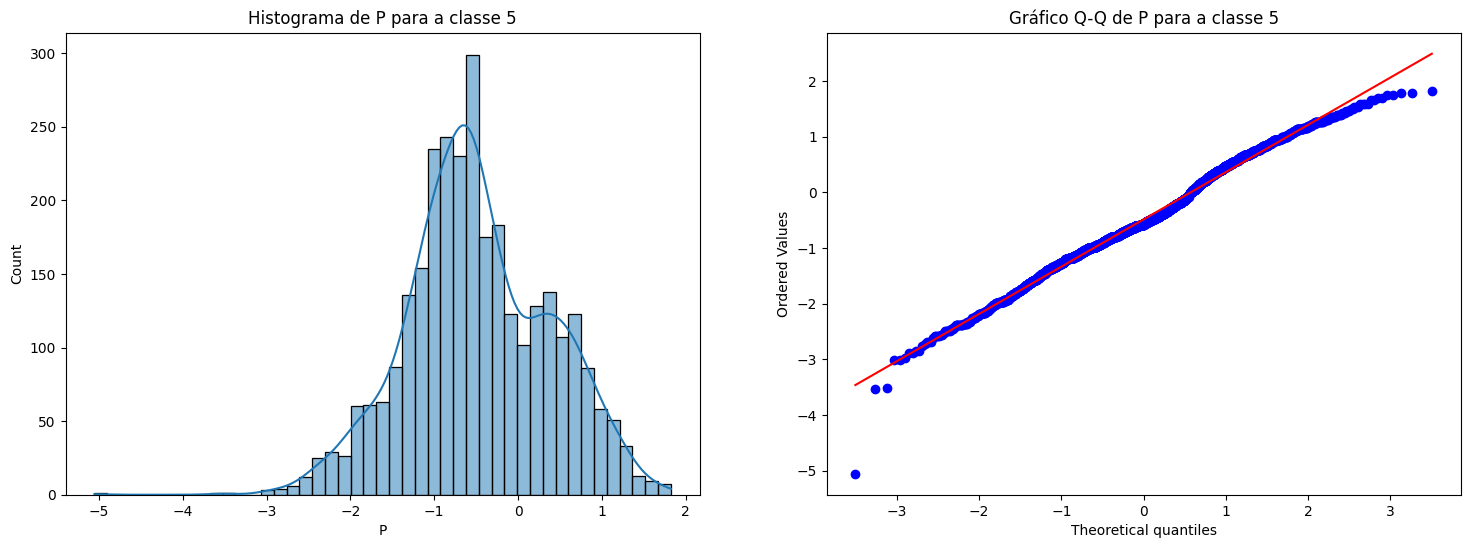

Atributo Q


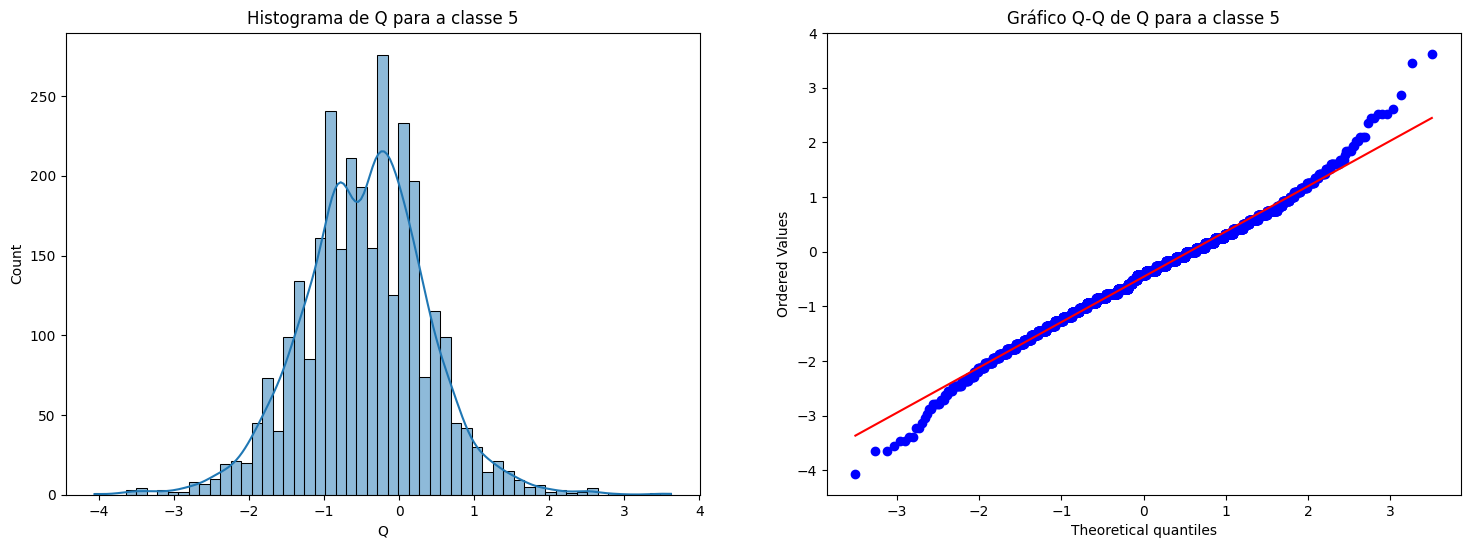

Atributo CurPitch


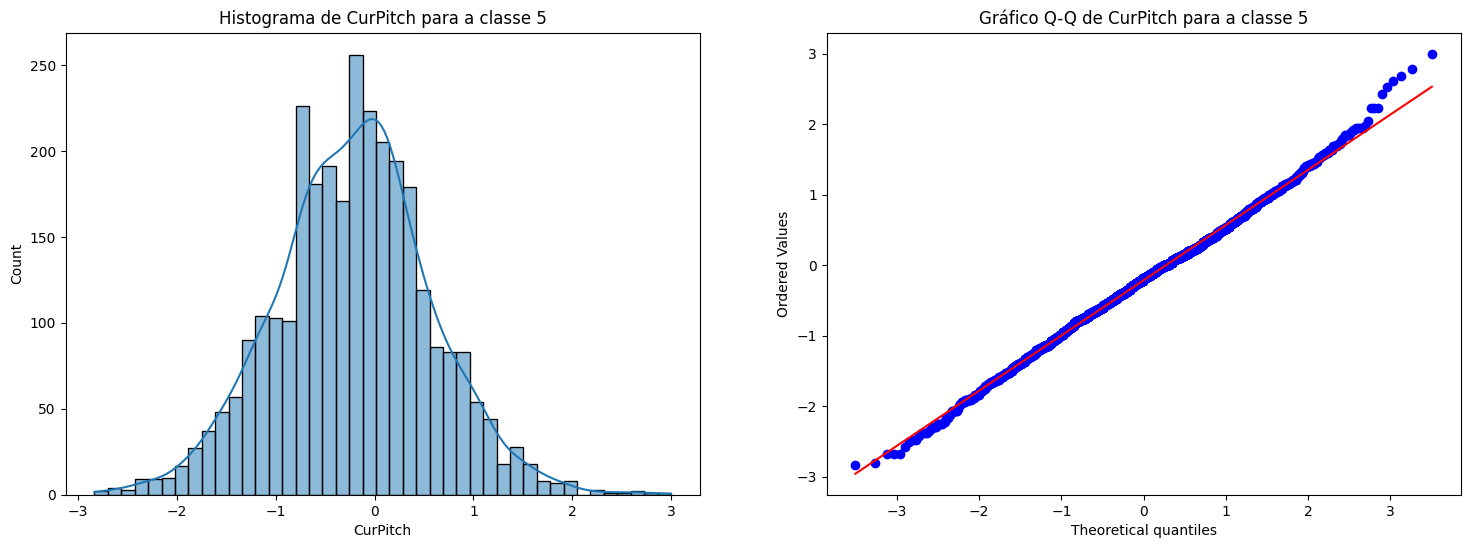

Atributo CurRoll


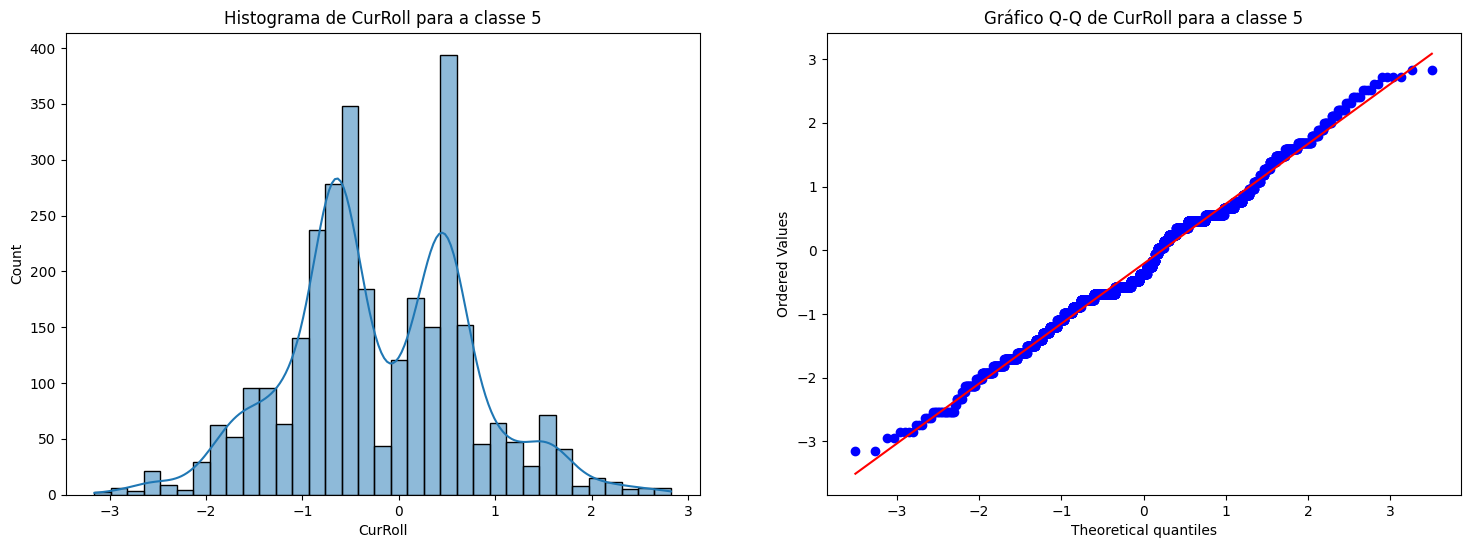

Atributo AbsRoll


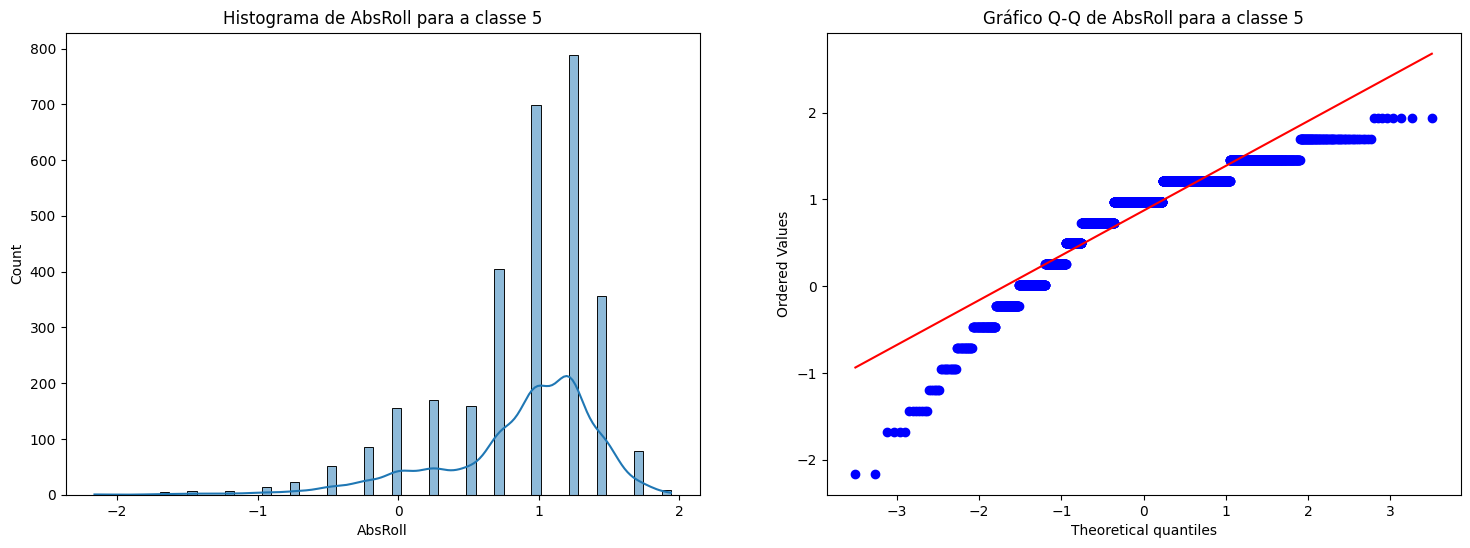

Atributo DiffClb


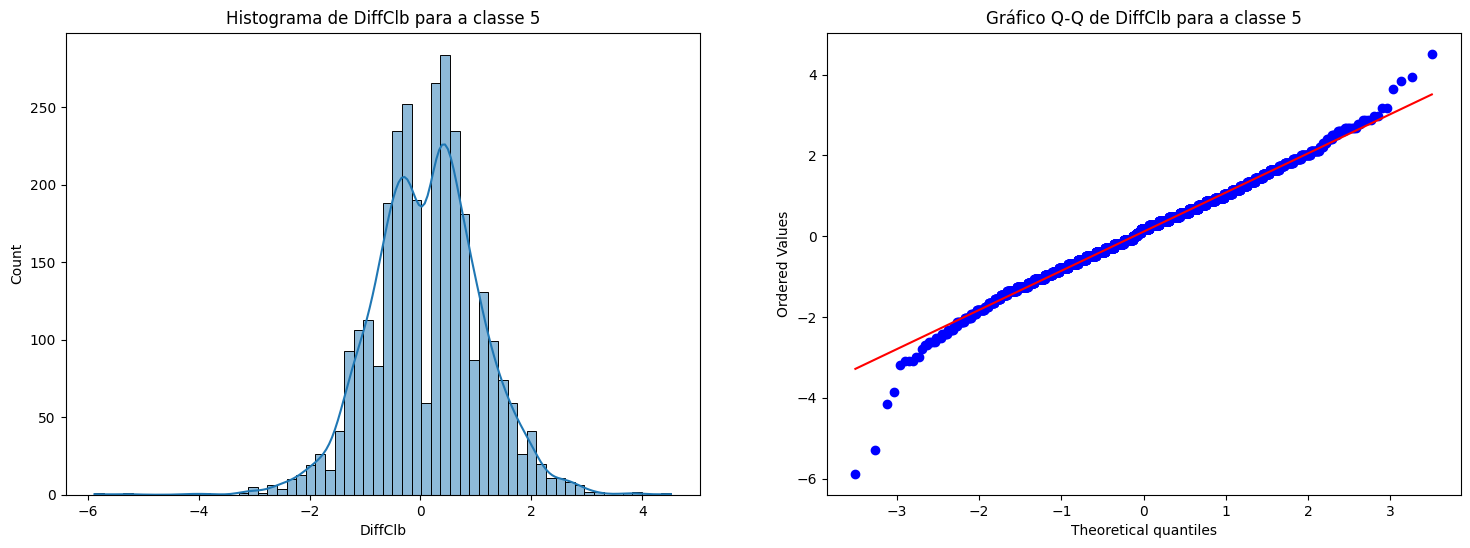

Atributo DiffRollRate


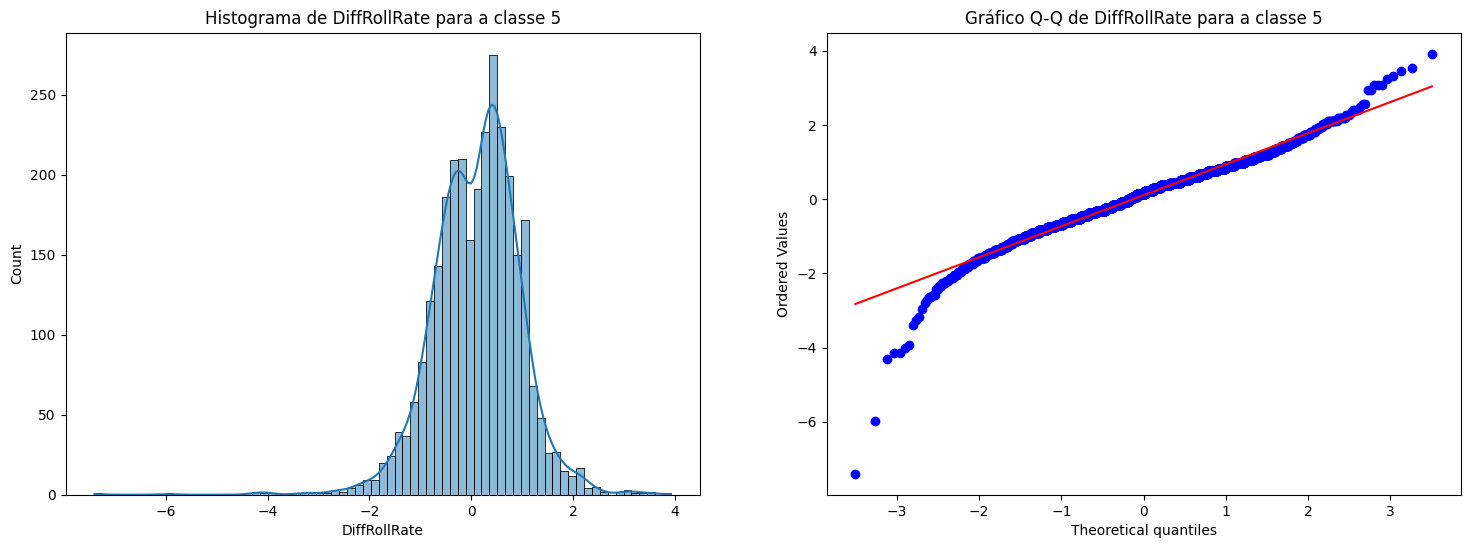

Atributo DiffDiffClb


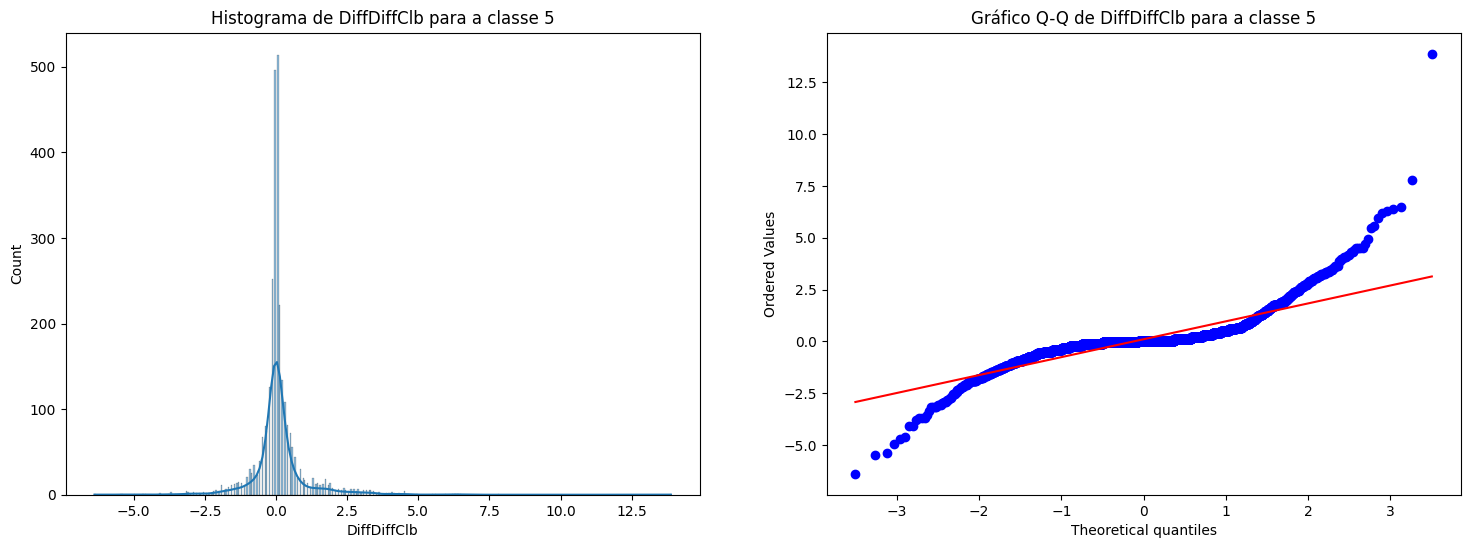

Atributo DiffSeTime1


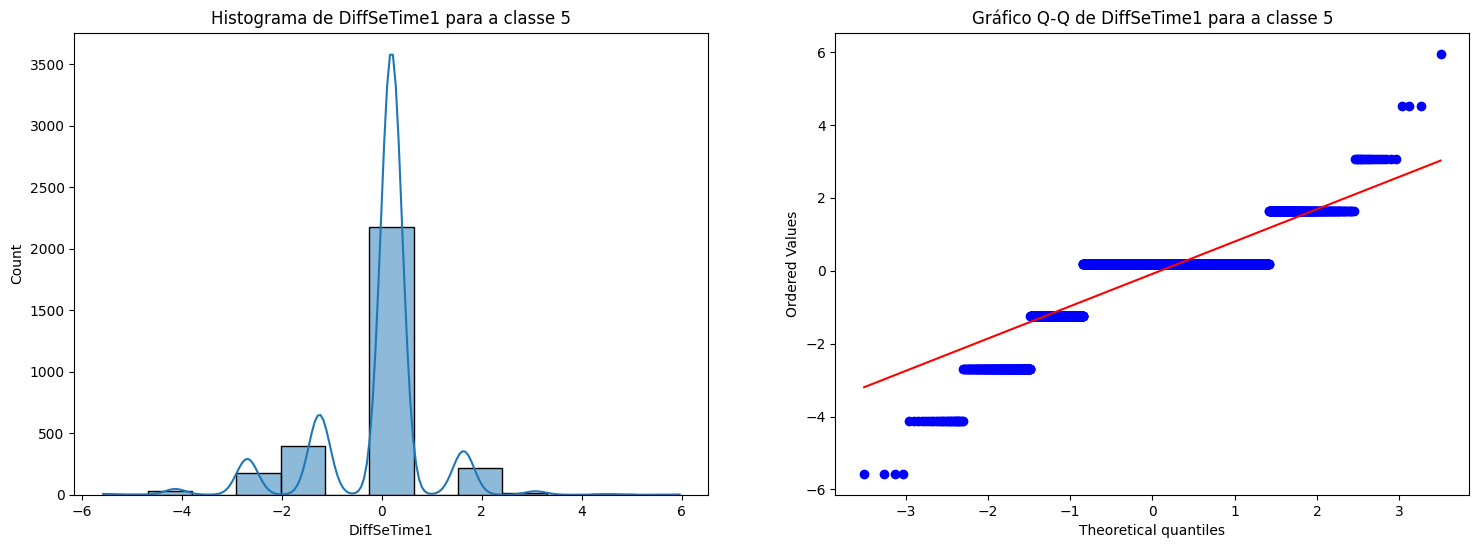

Atributo DiffSeTime3


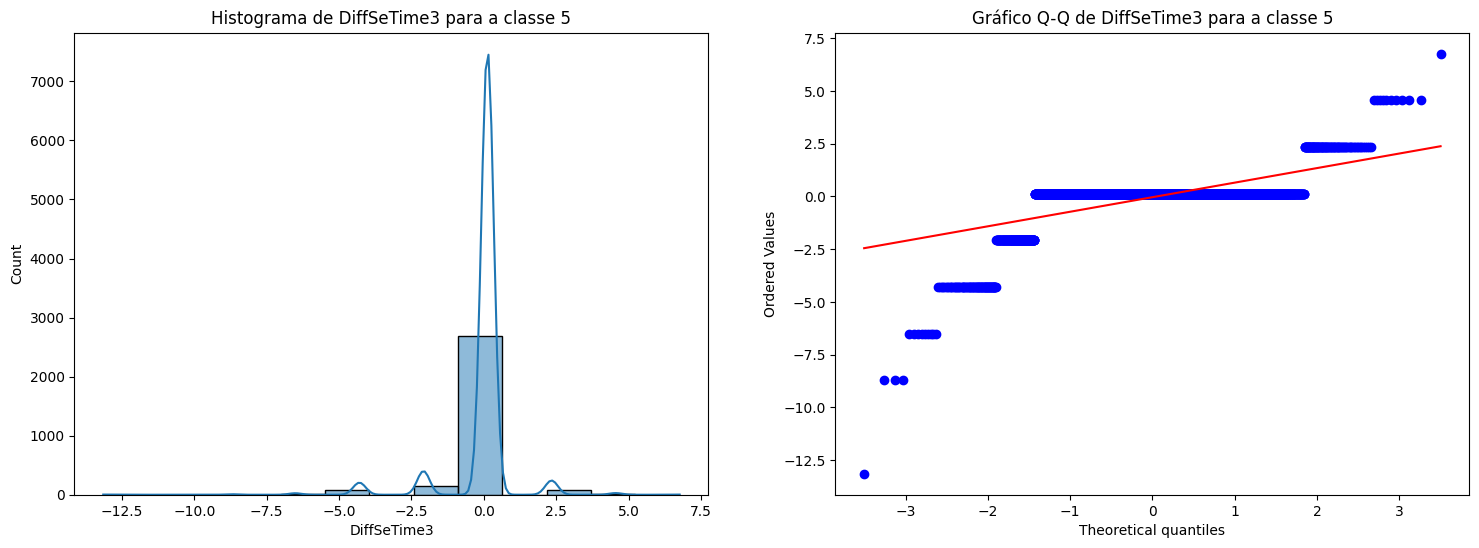

Atributo DiffSeTime5


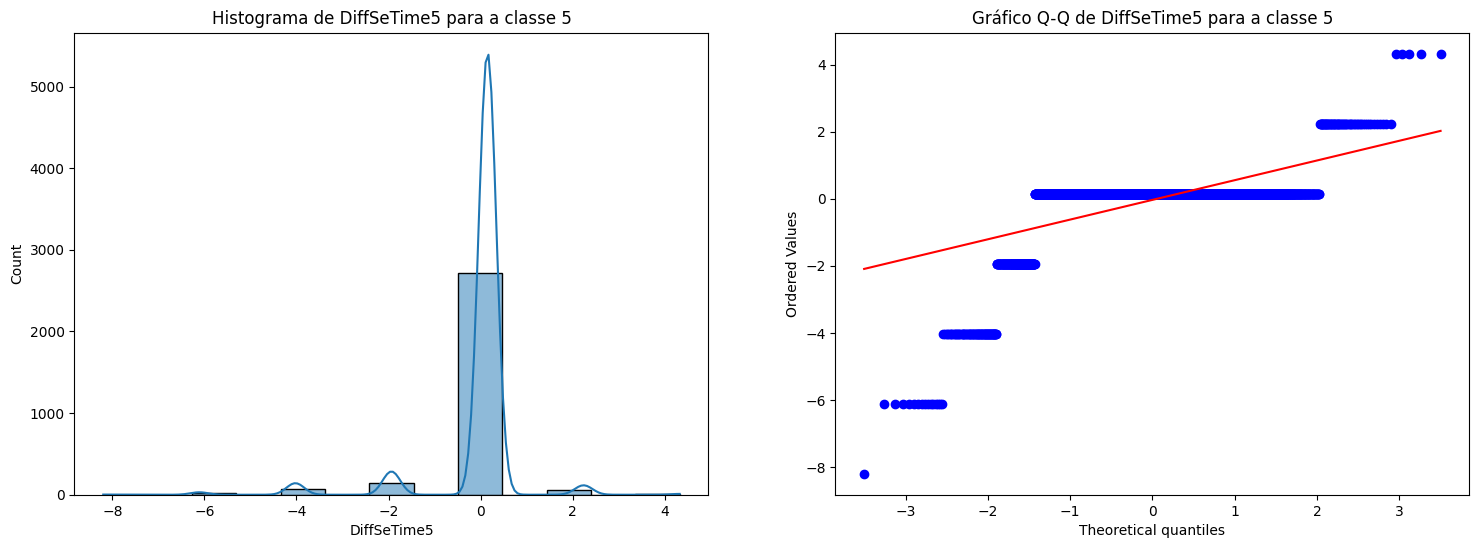

Atributo DiffSeTime7


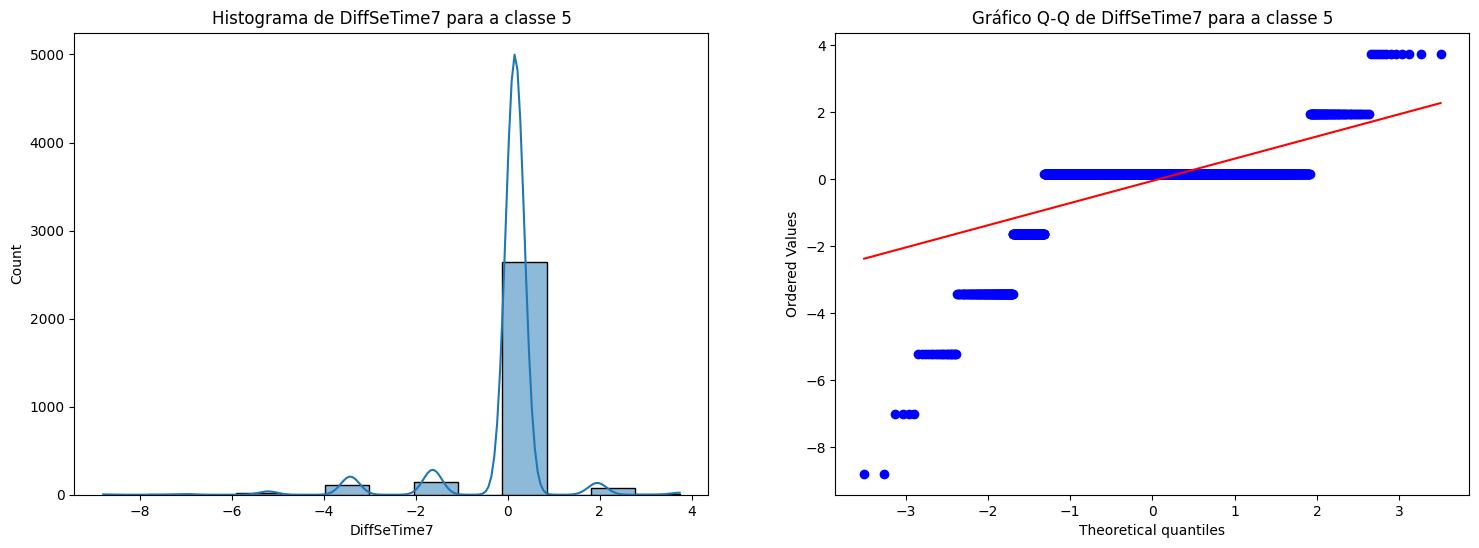

Atributo DiffSeTime9


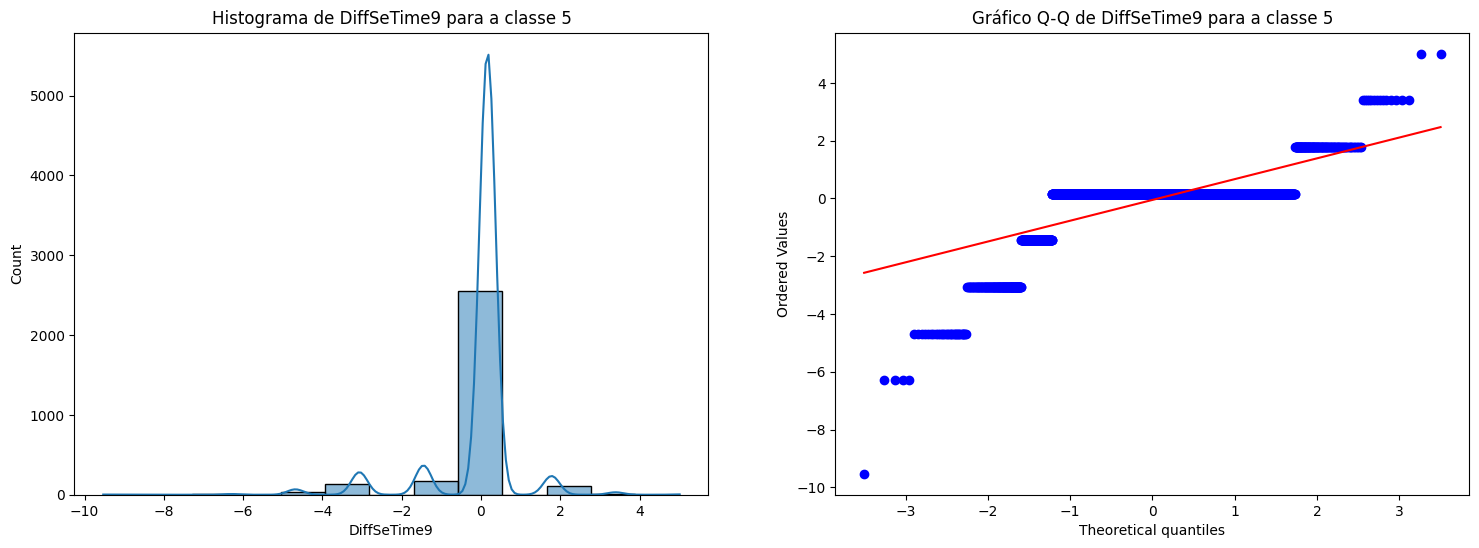

Atributo DiffSeTime11


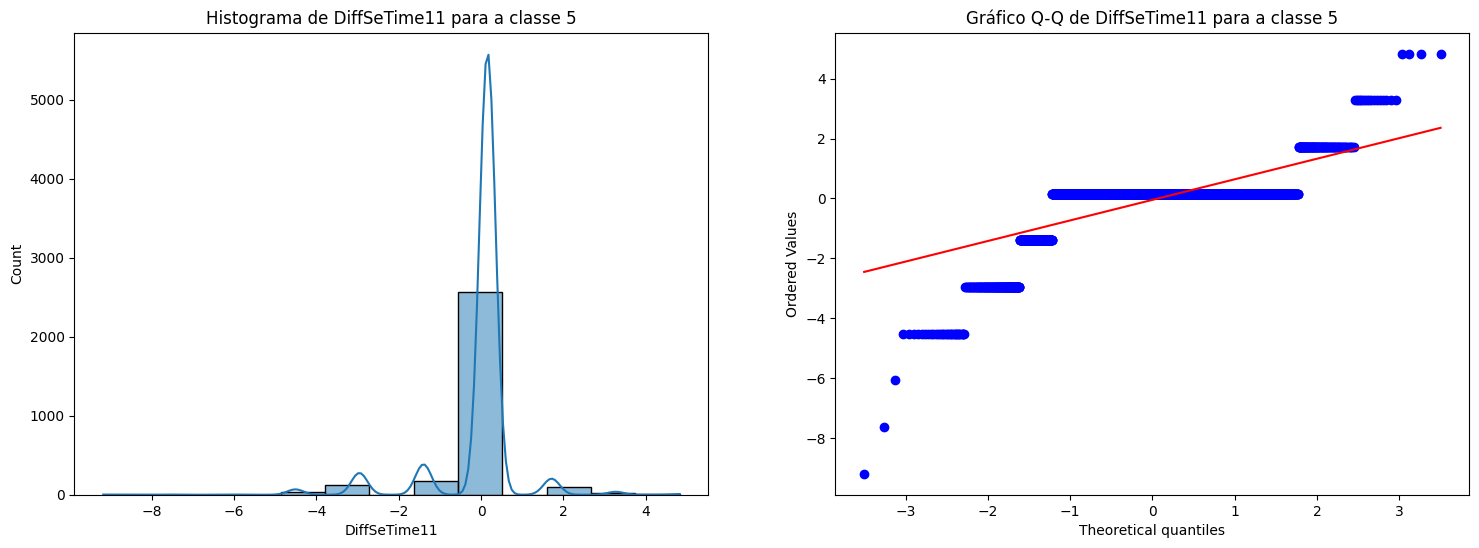

Atributo DiffSeTime13


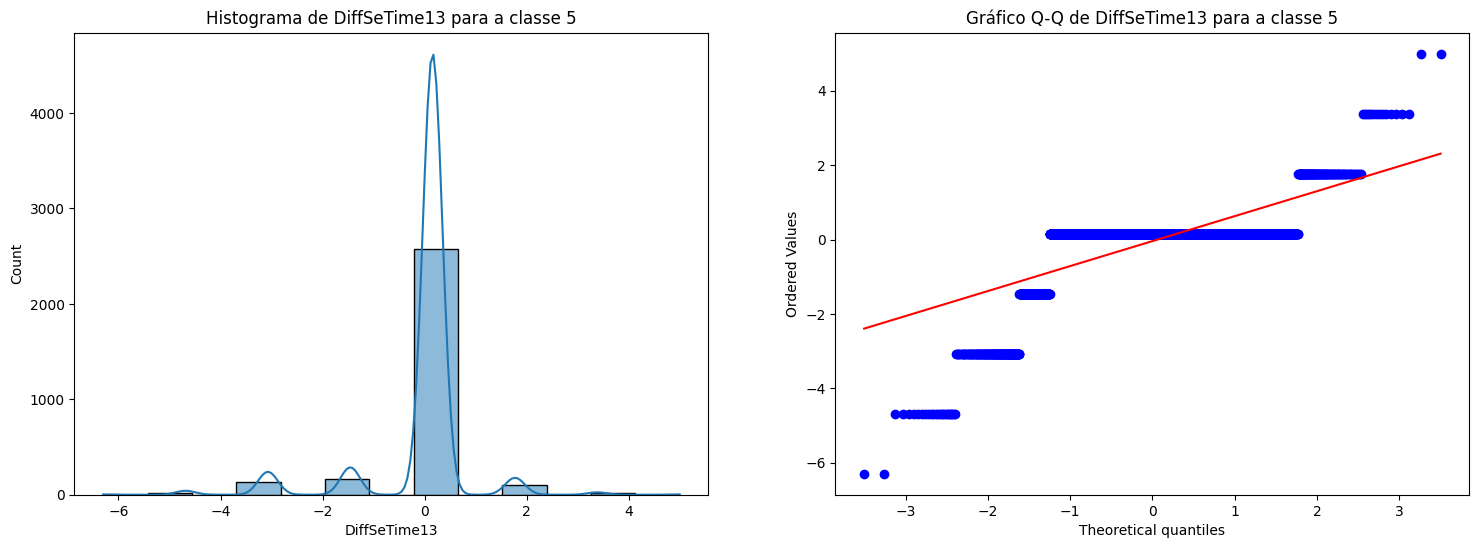

Atributo Alpha


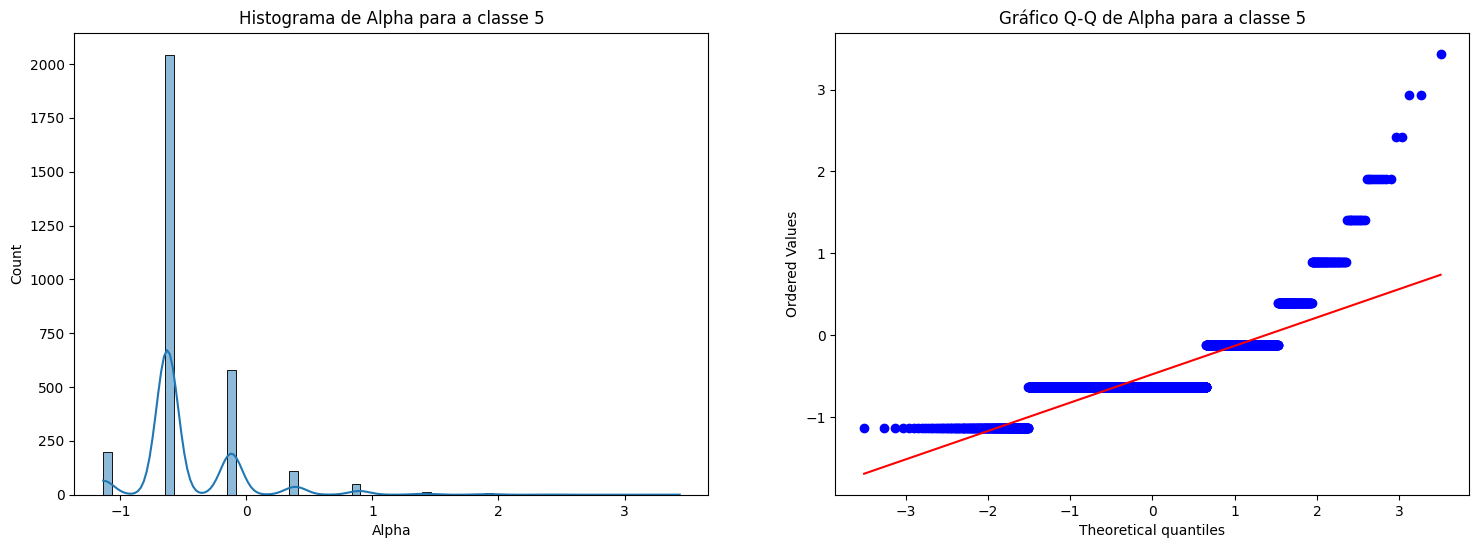

Atributo Se


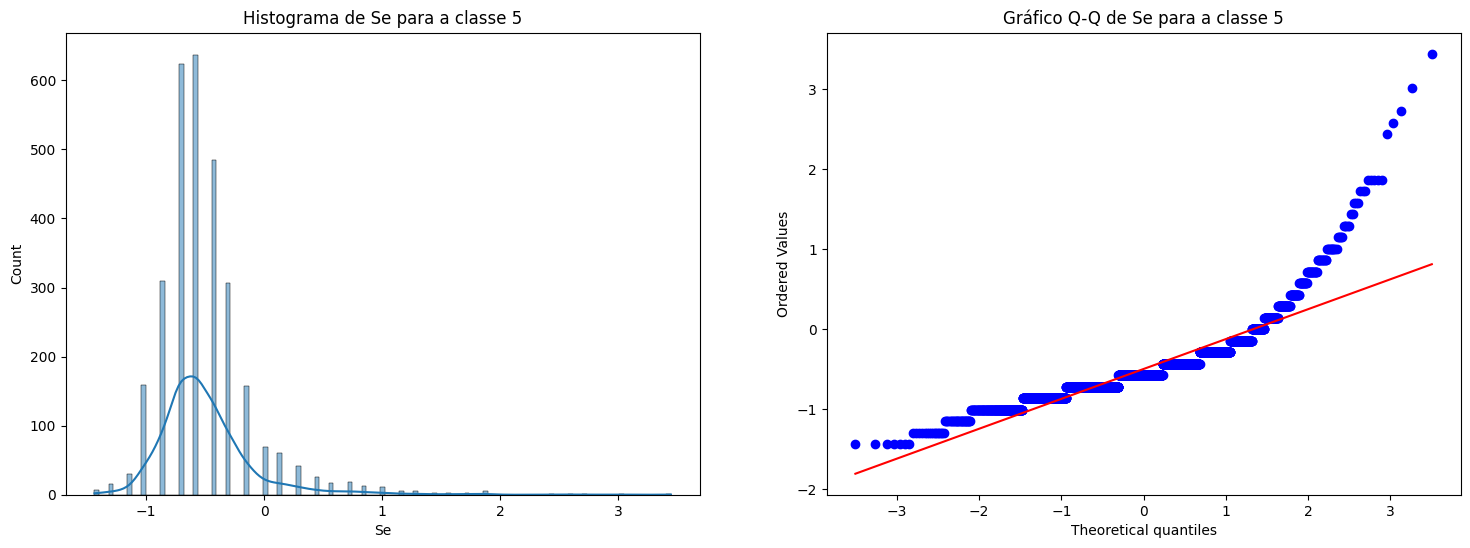

Classe 3
Atributo ClimbRate


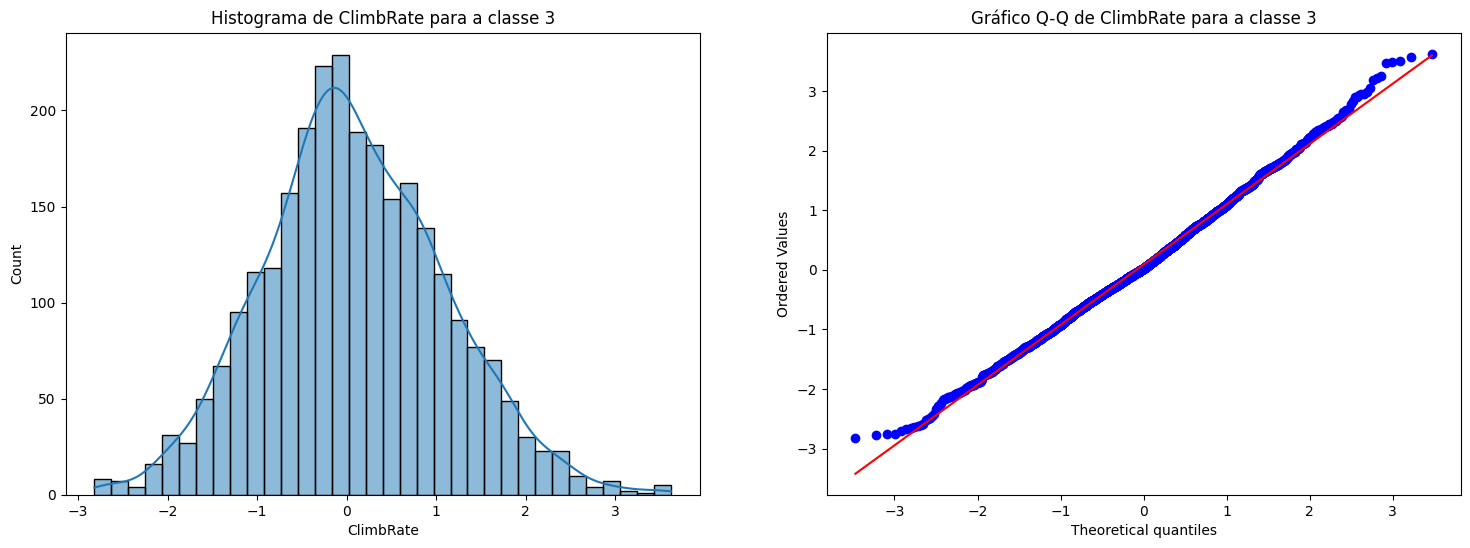

Atributo Sgz


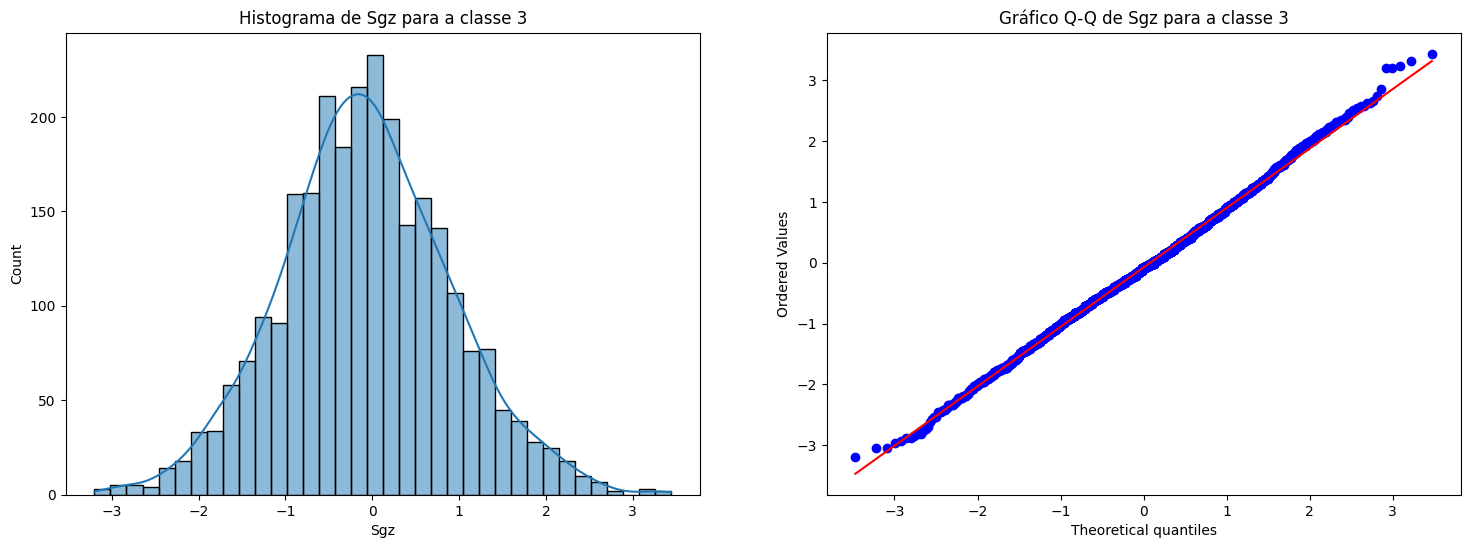

Atributo P


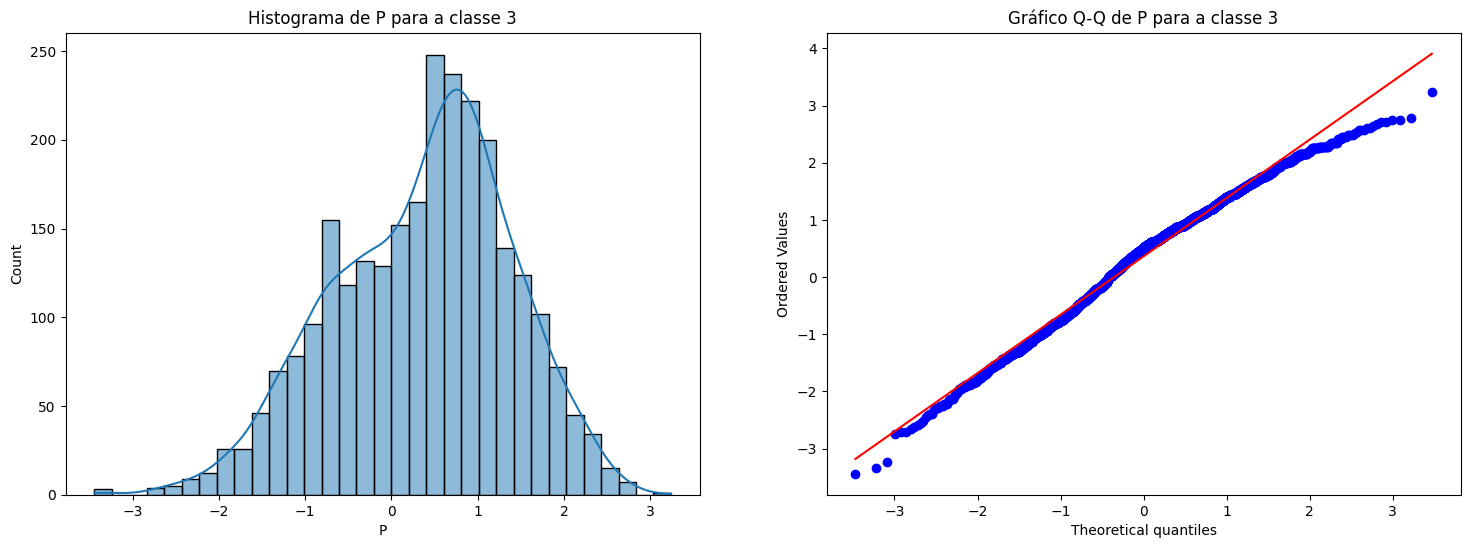

Atributo Q


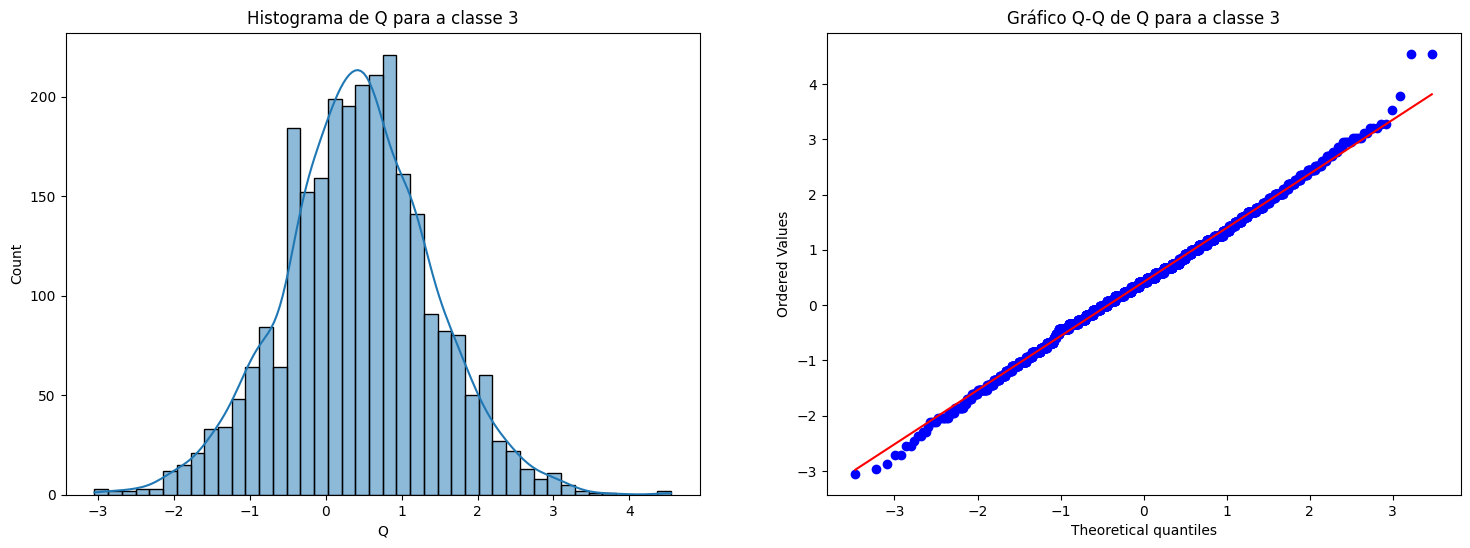

Atributo CurPitch


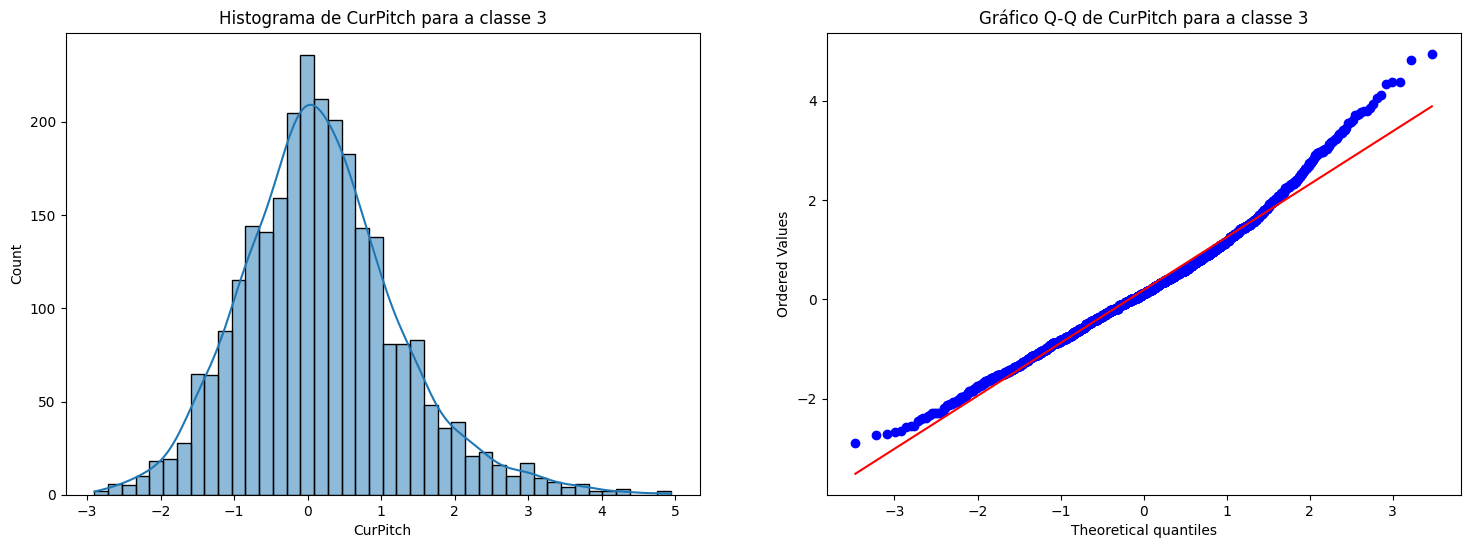

Atributo CurRoll


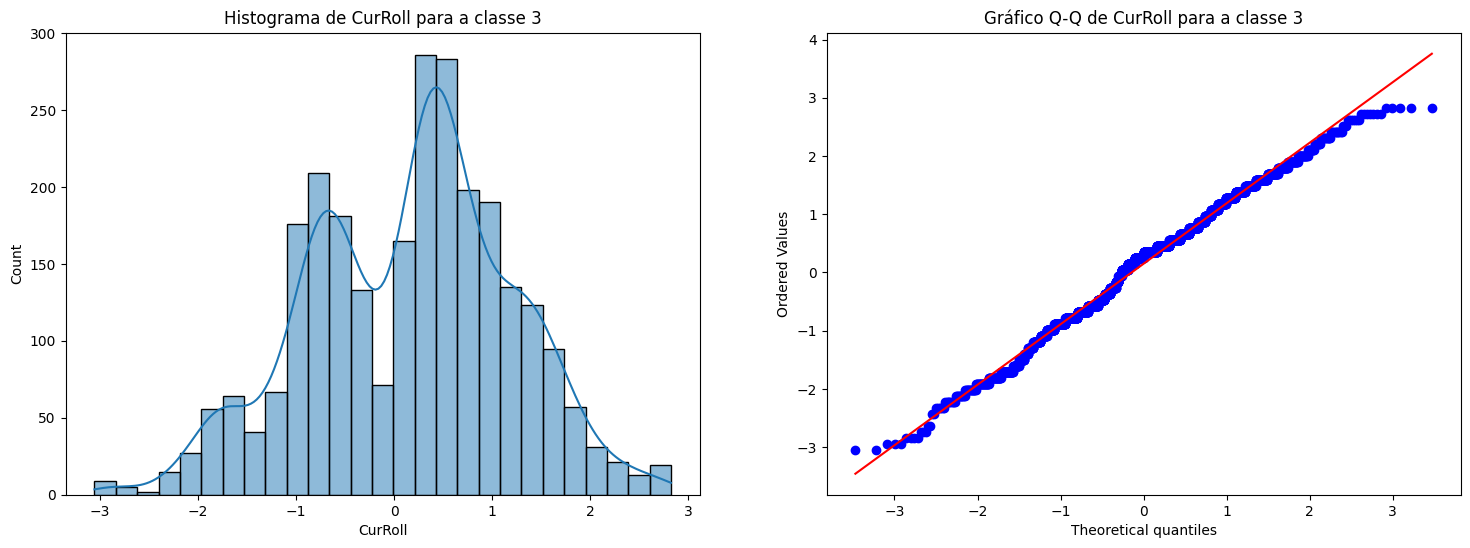

Atributo AbsRoll


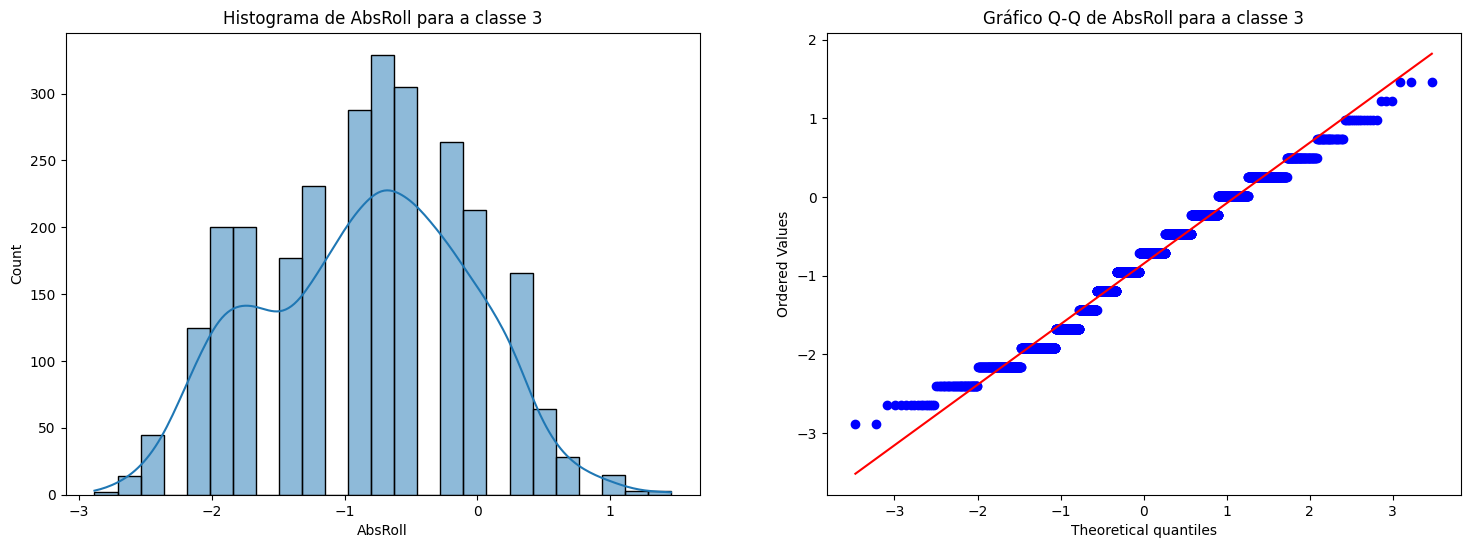

Atributo DiffClb


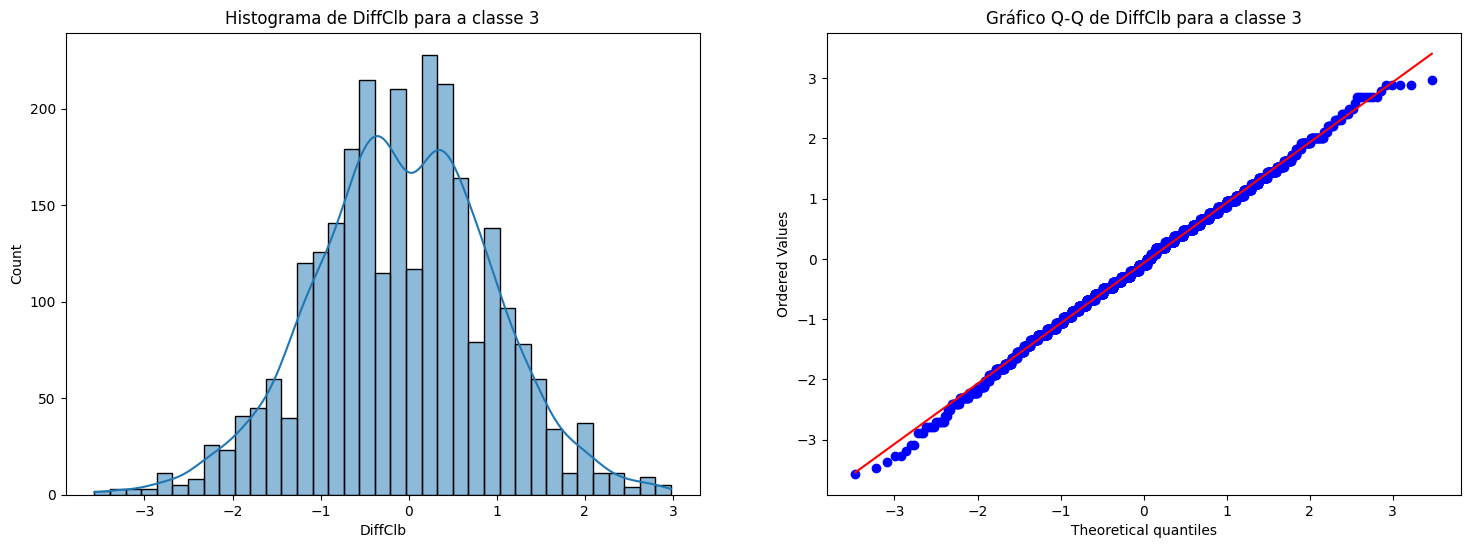

Atributo DiffRollRate


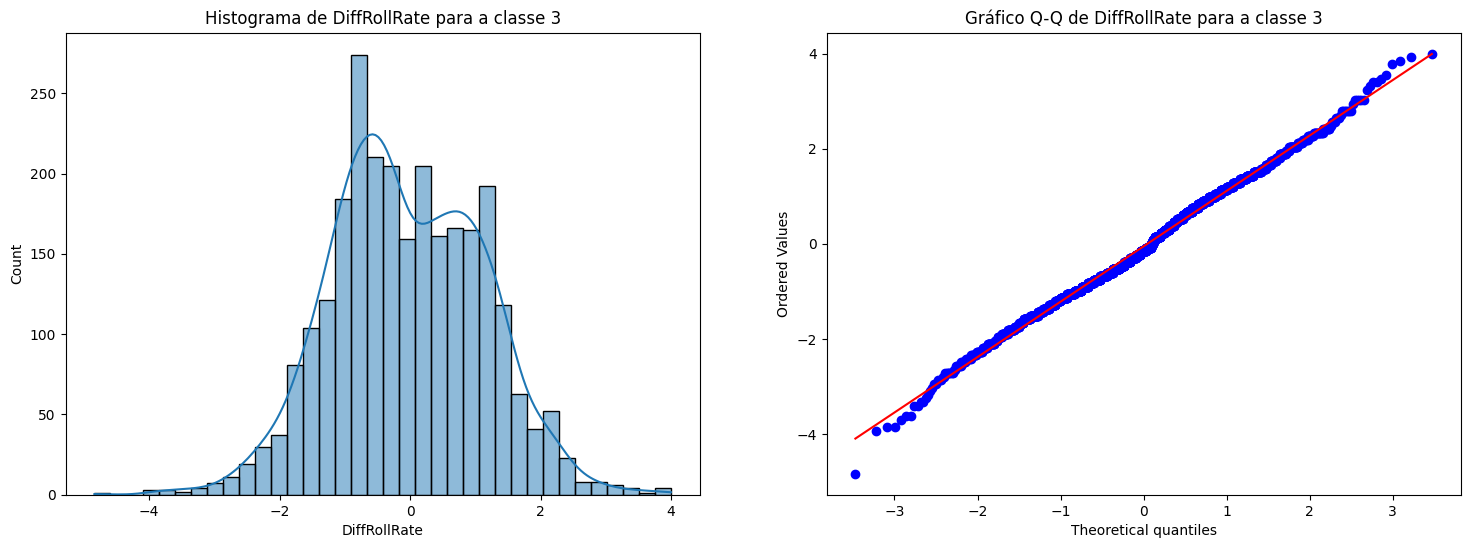

Atributo DiffDiffClb


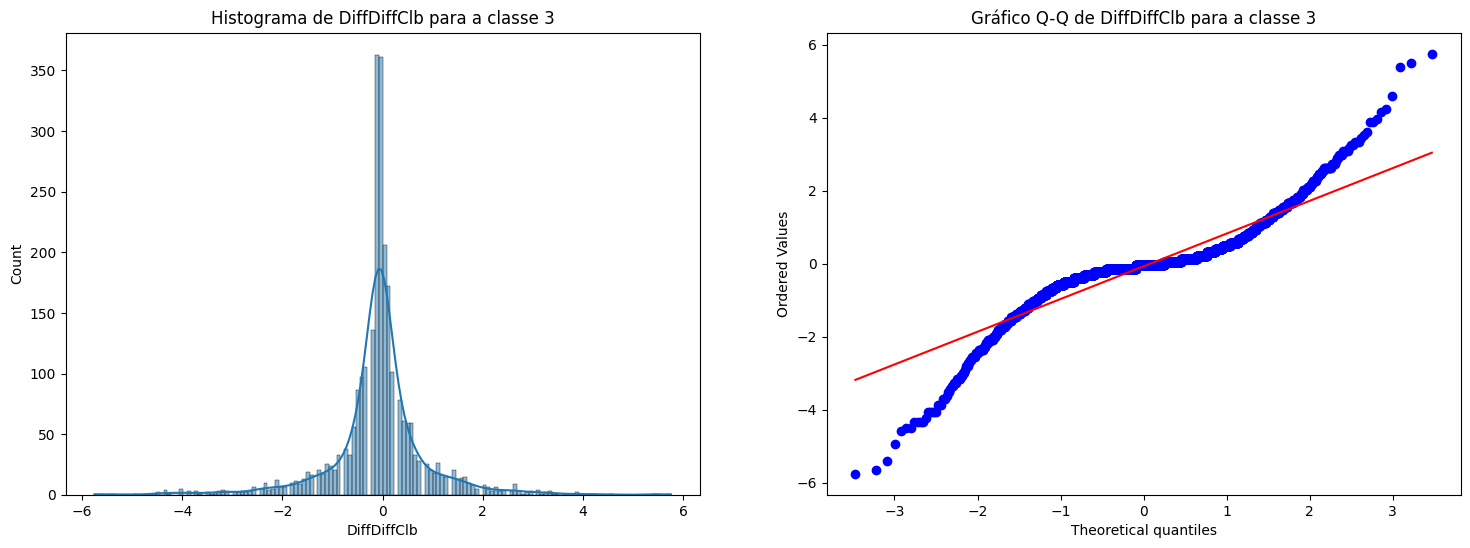

Atributo DiffSeTime1


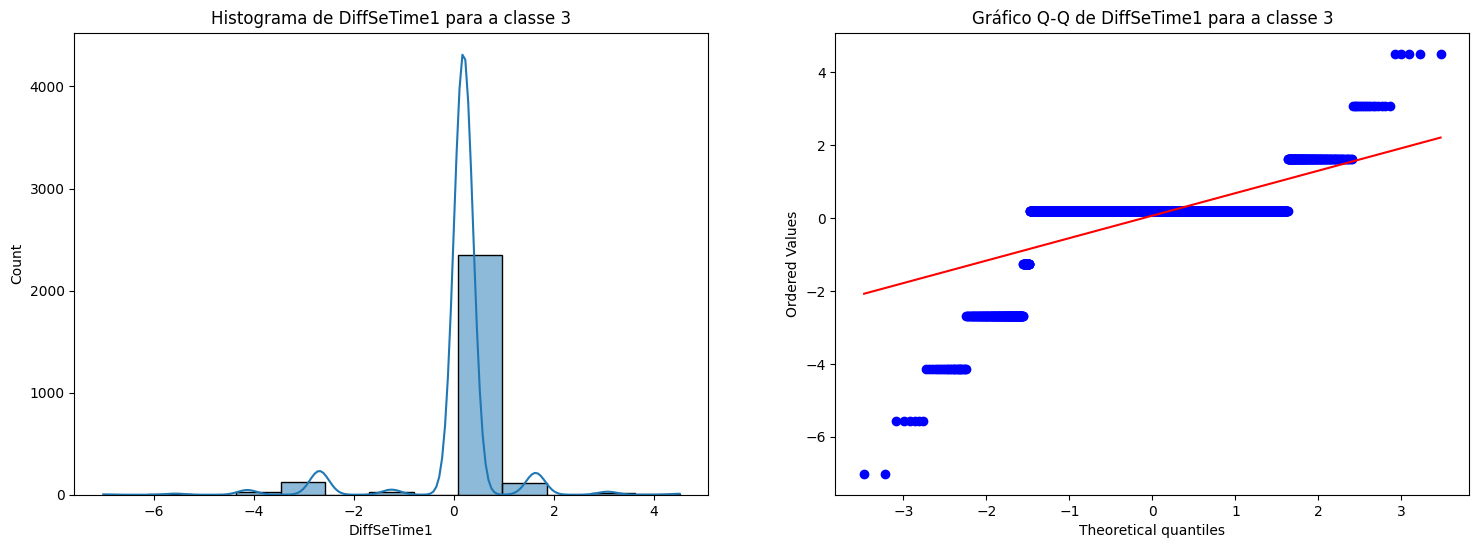

Atributo DiffSeTime3


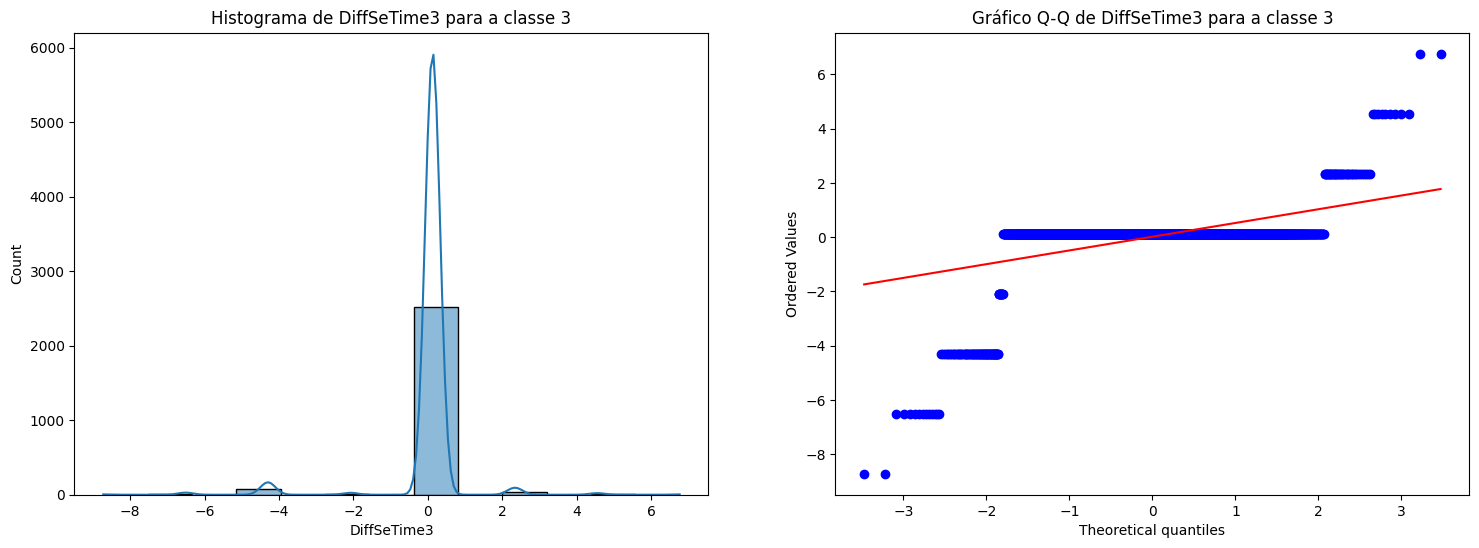

Atributo DiffSeTime5


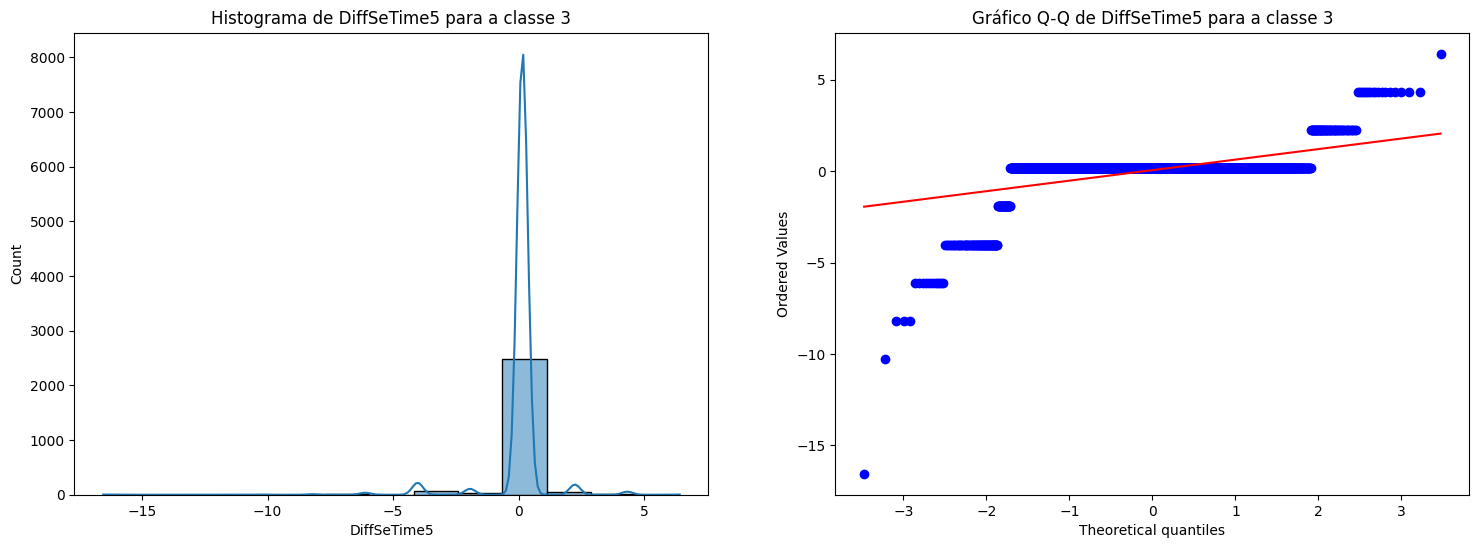

Atributo DiffSeTime7


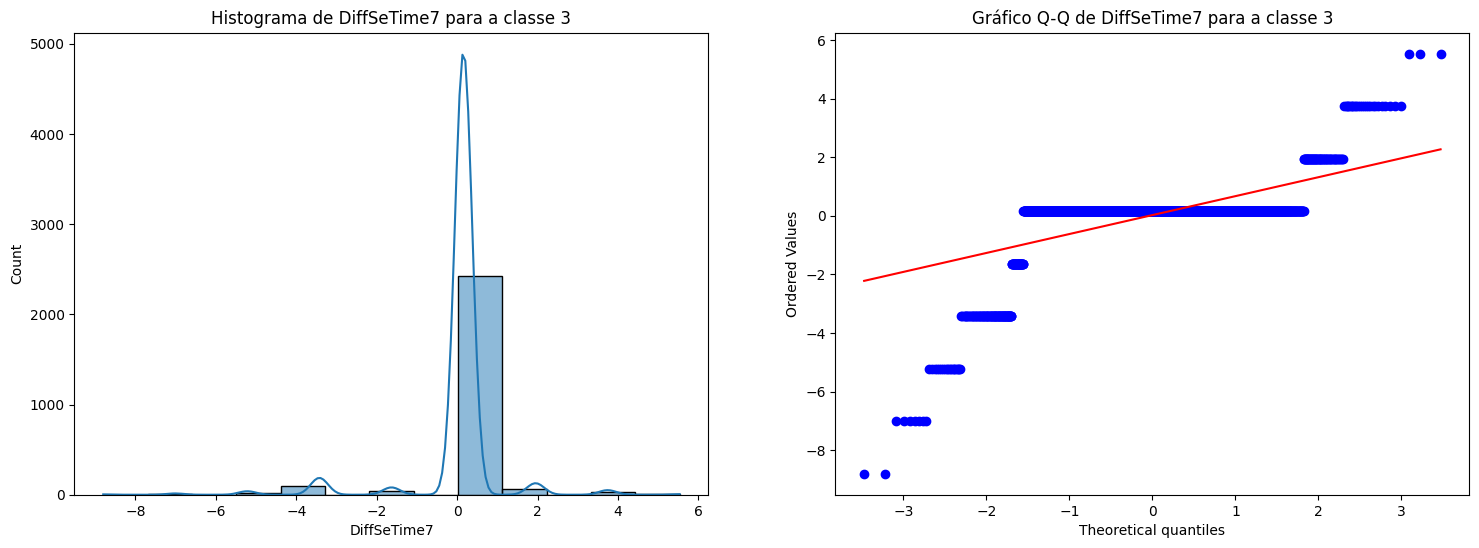

Atributo DiffSeTime9


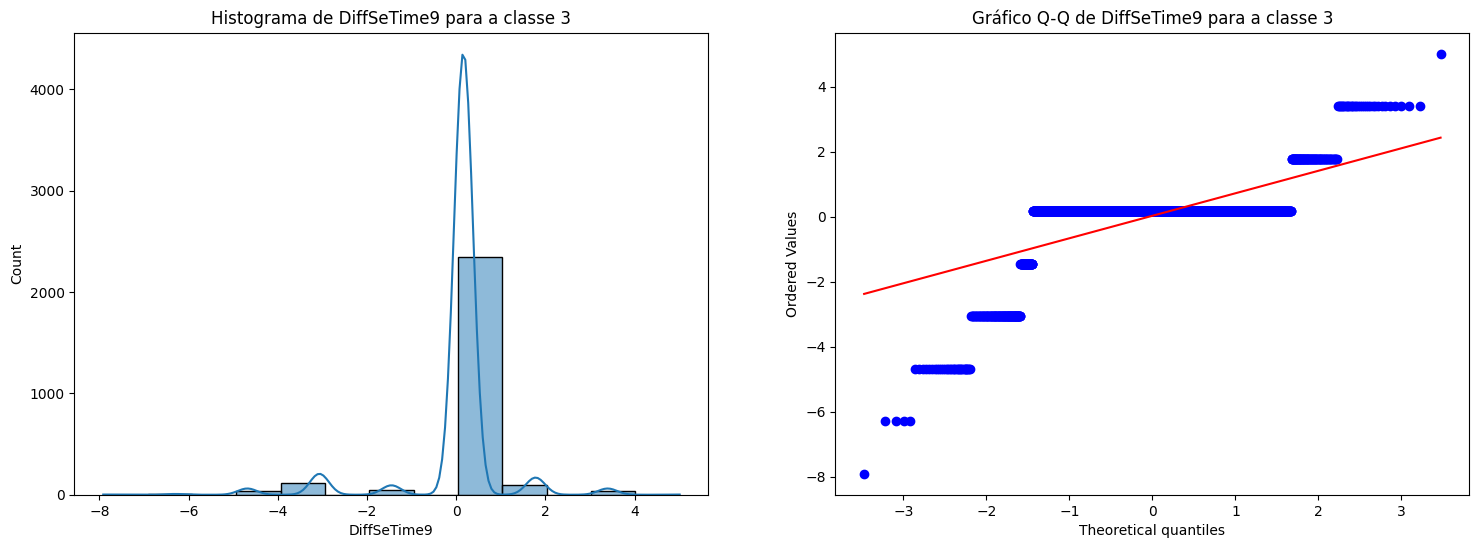

Atributo DiffSeTime11


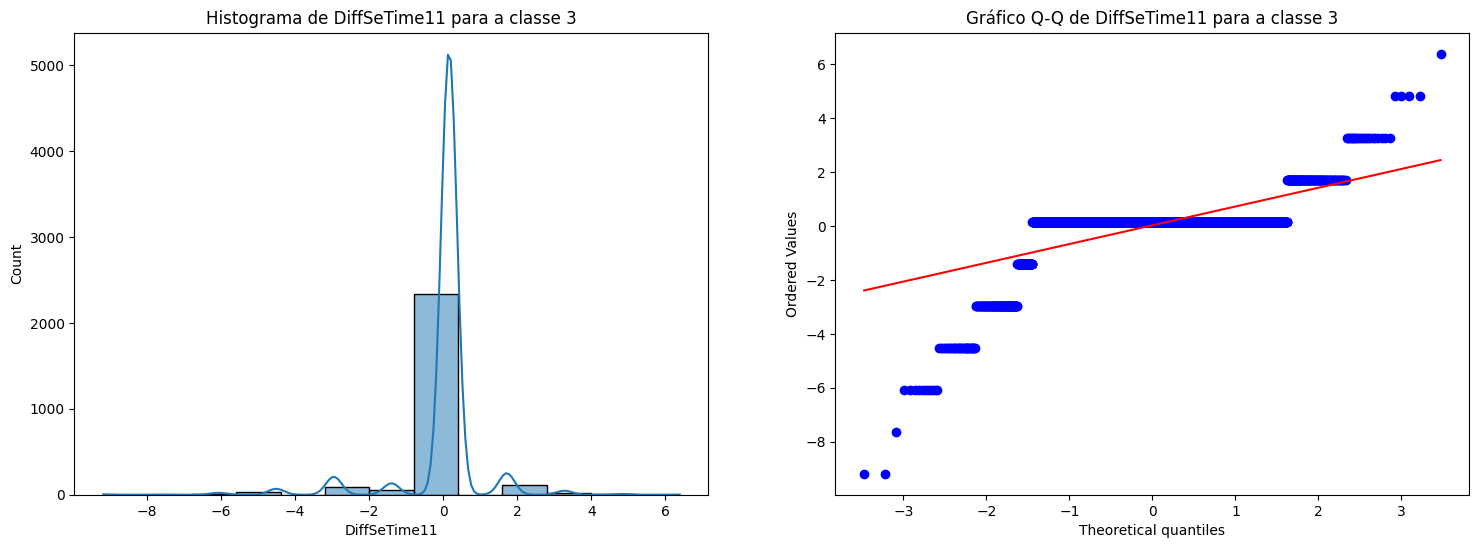

Atributo DiffSeTime13


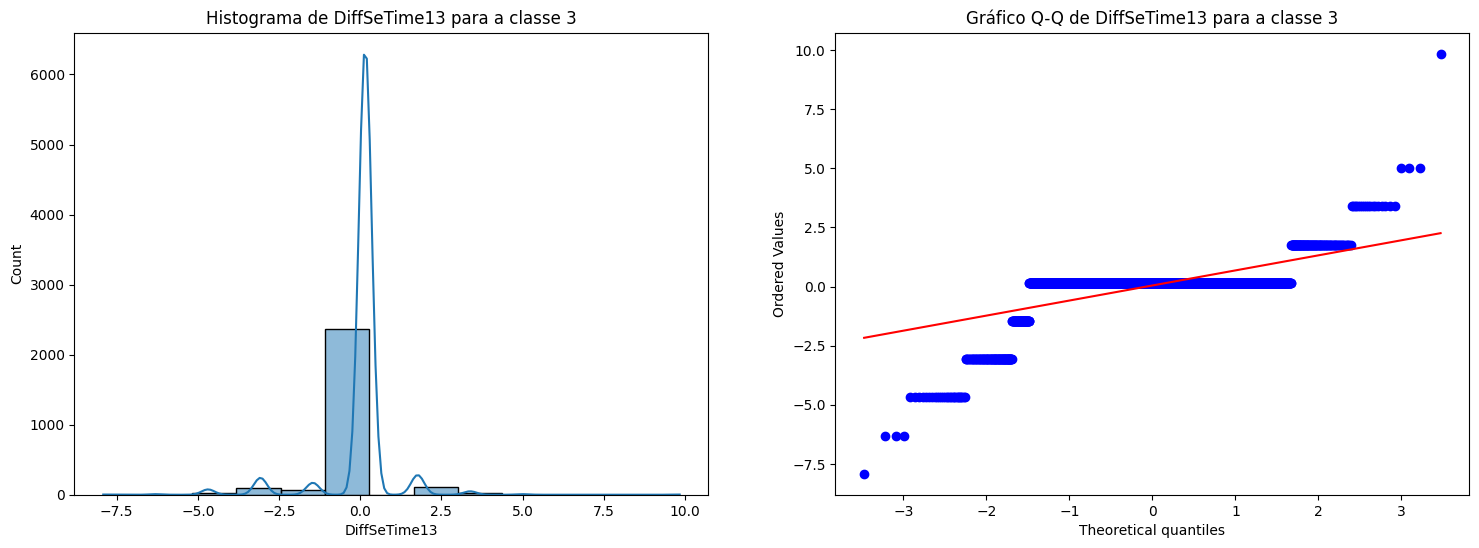

Atributo Alpha


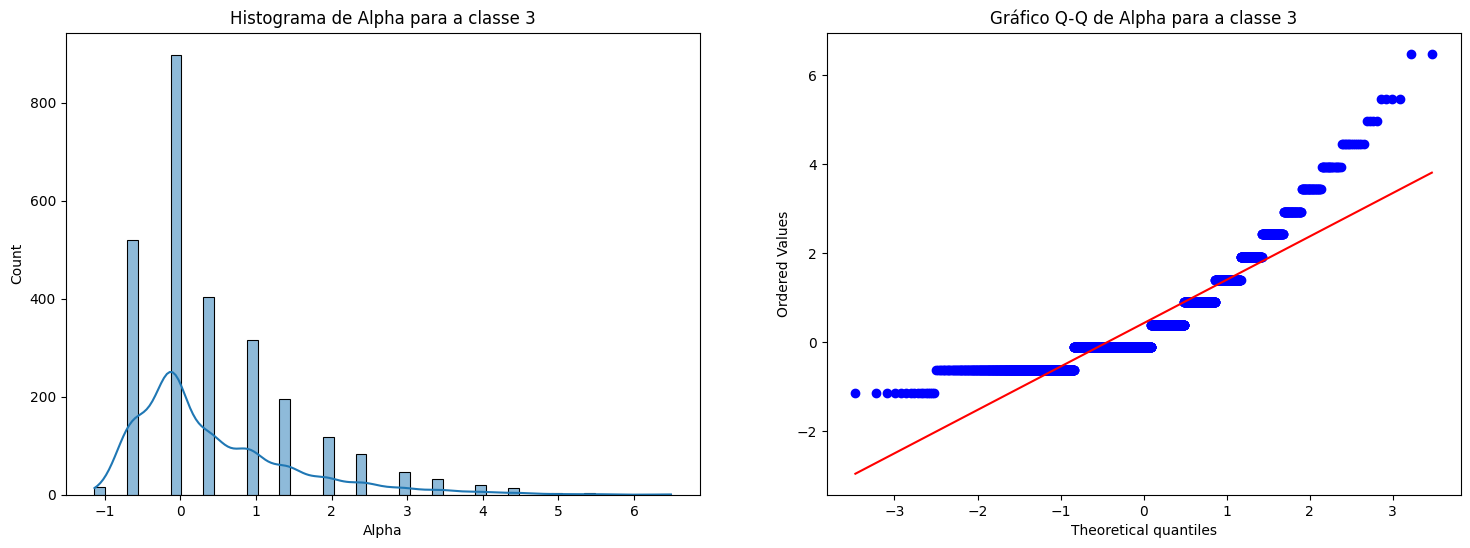

Atributo Se


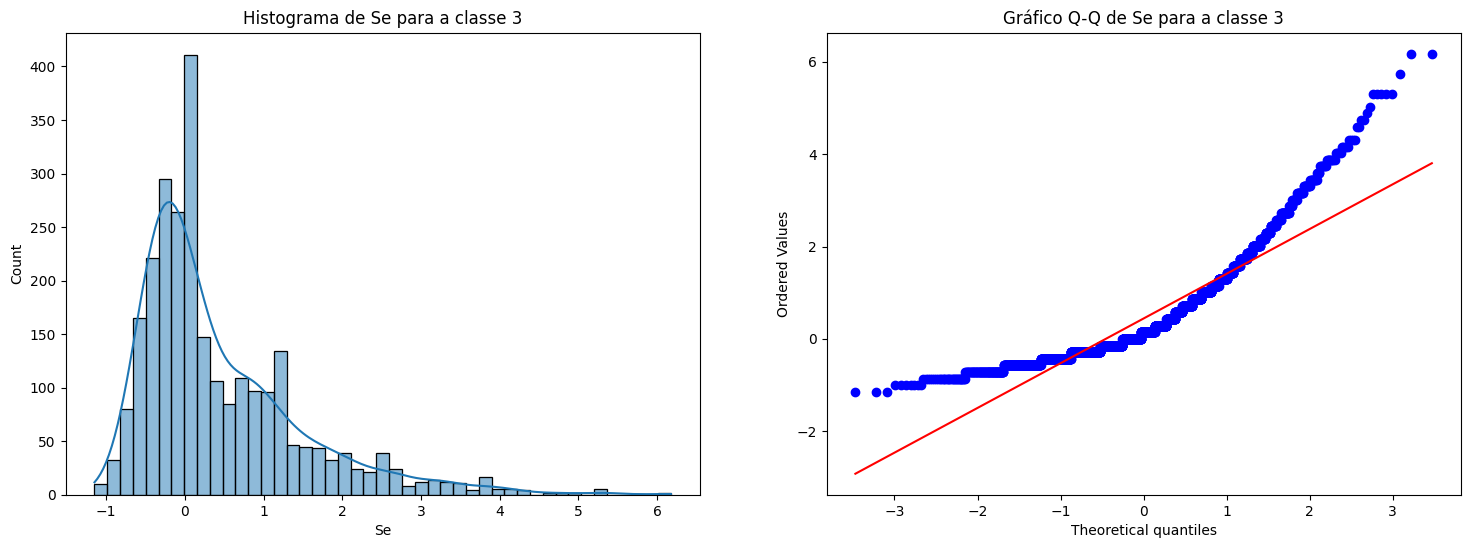

Classe 1
Atributo ClimbRate


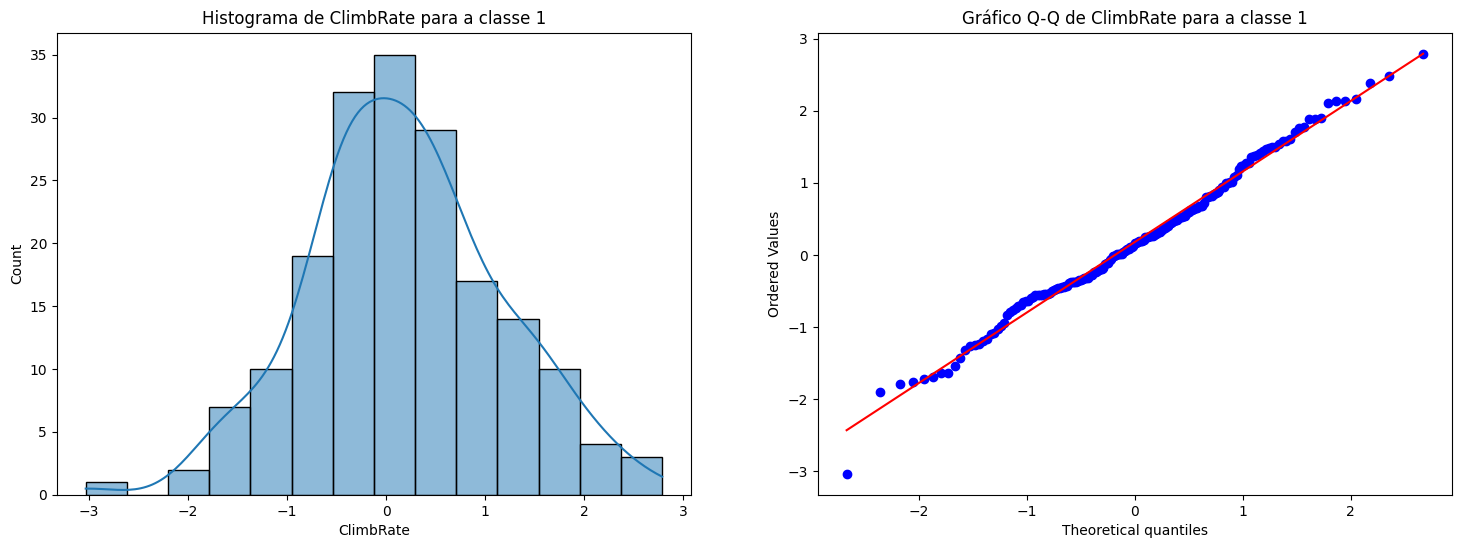

Atributo Sgz


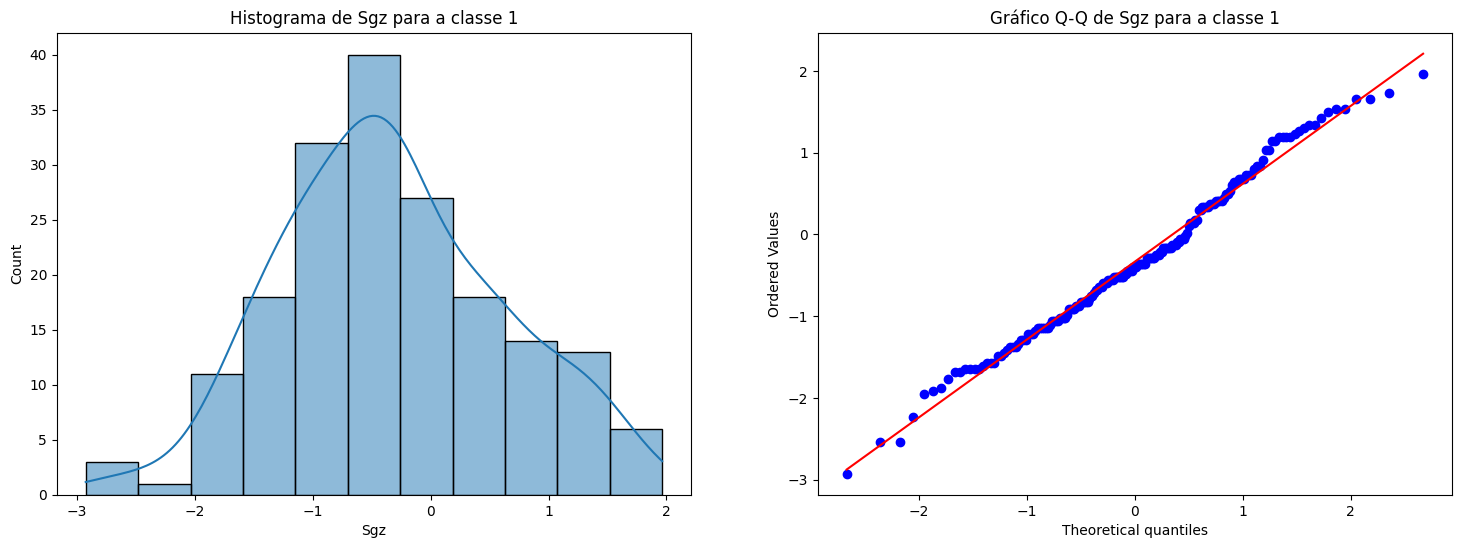

Atributo P


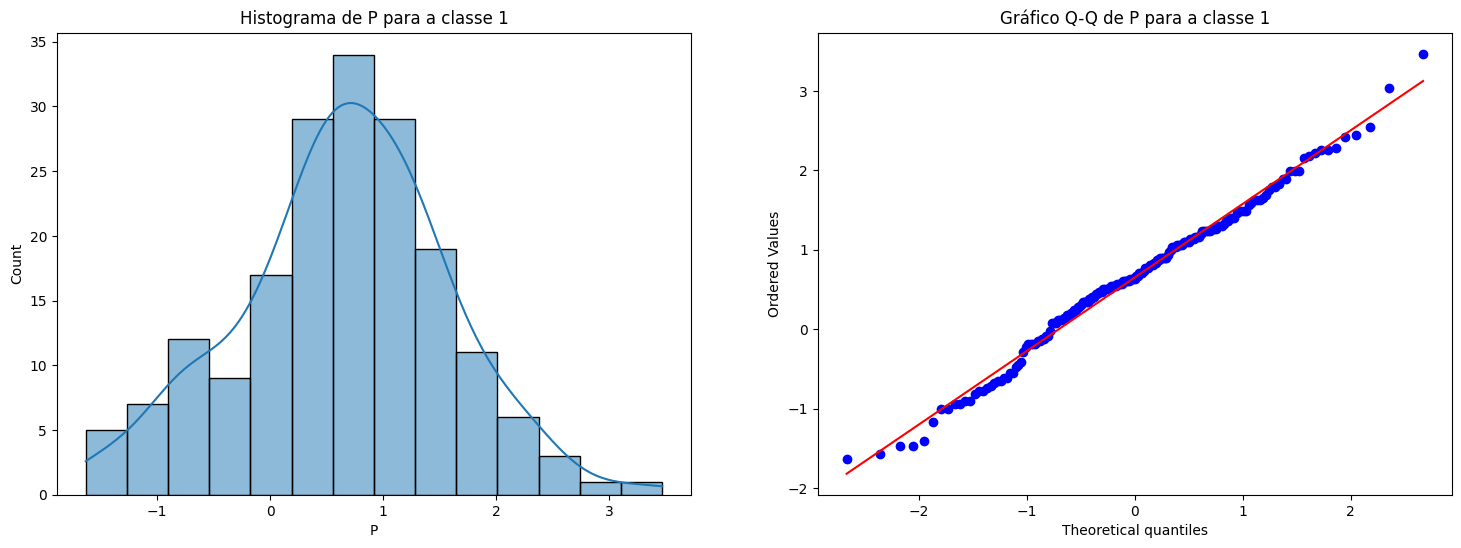

Atributo Q


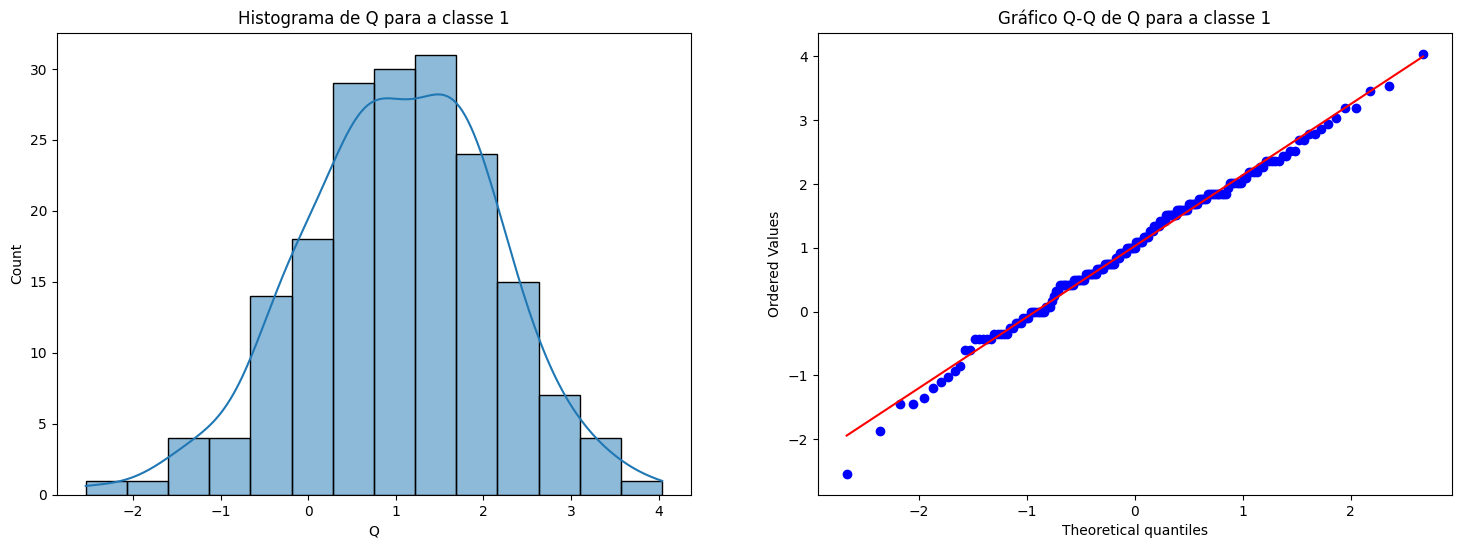

Atributo CurPitch


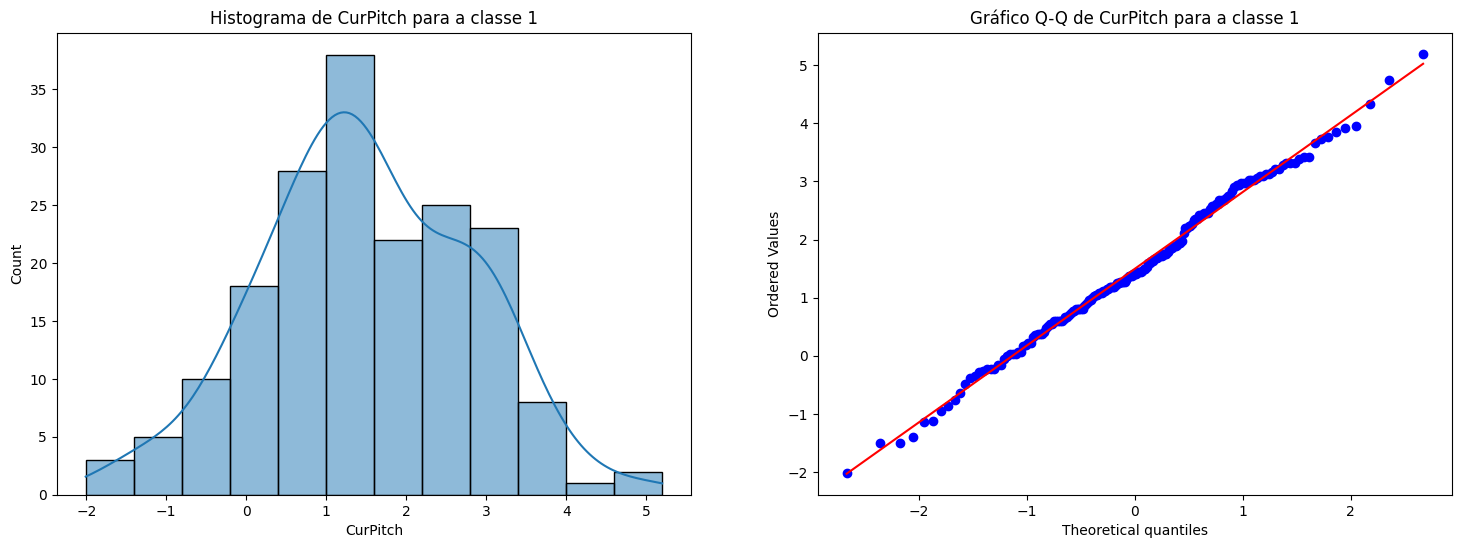

Atributo CurRoll


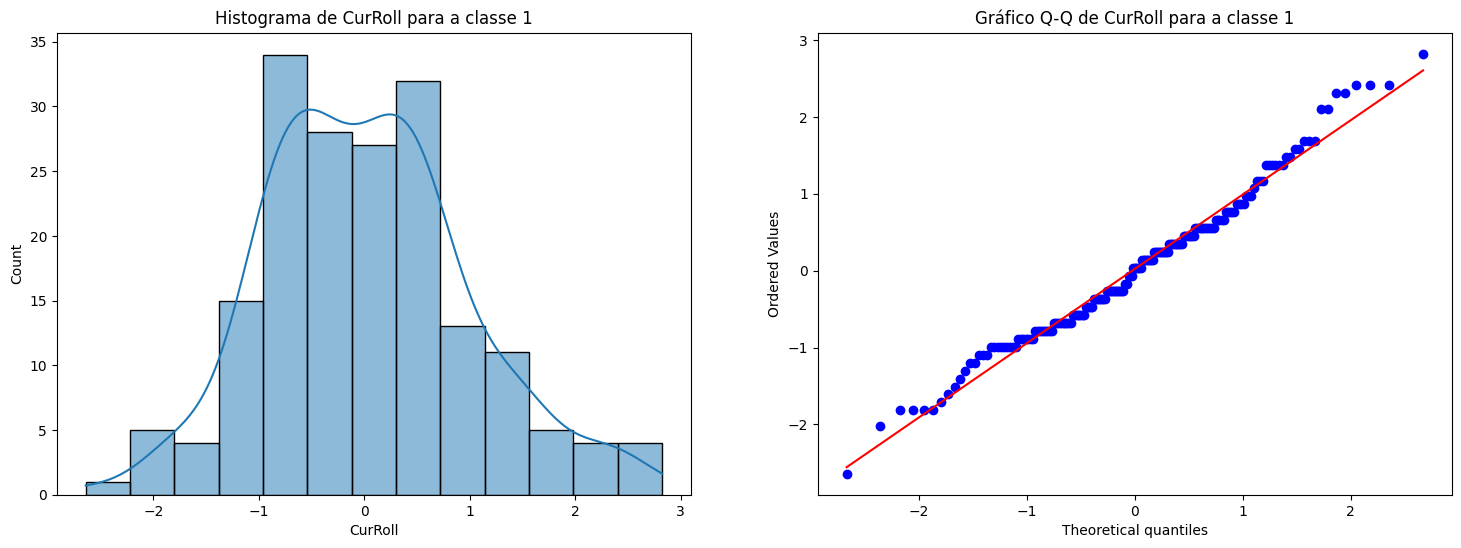

Atributo AbsRoll


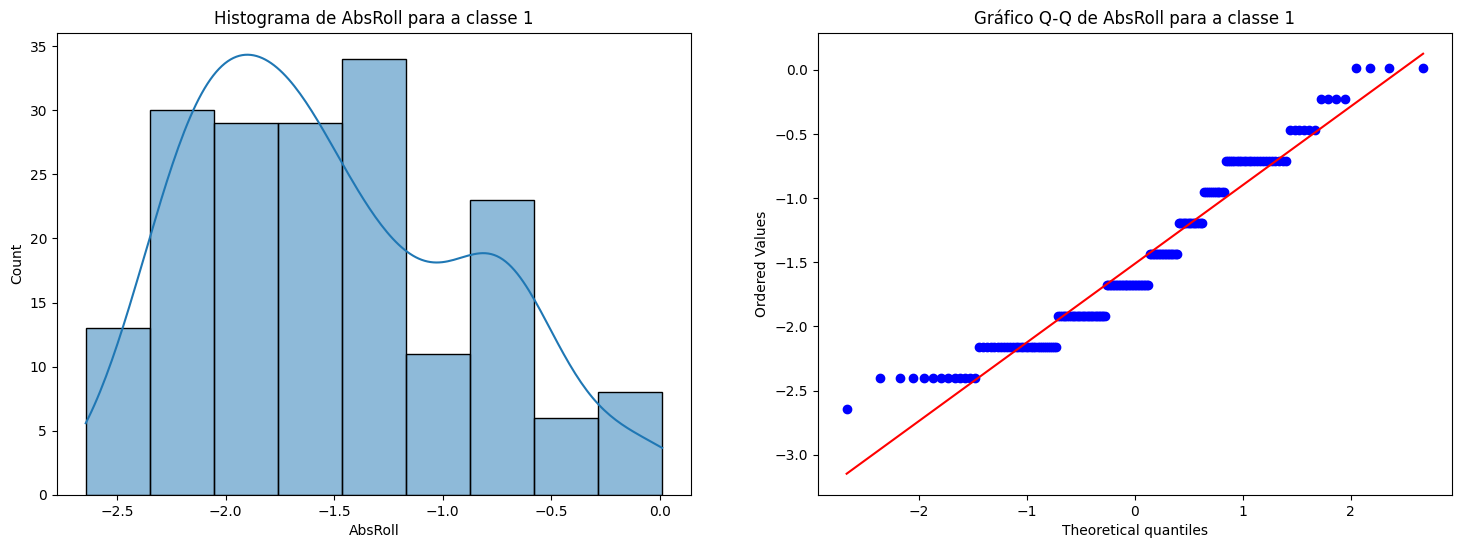

Atributo DiffClb


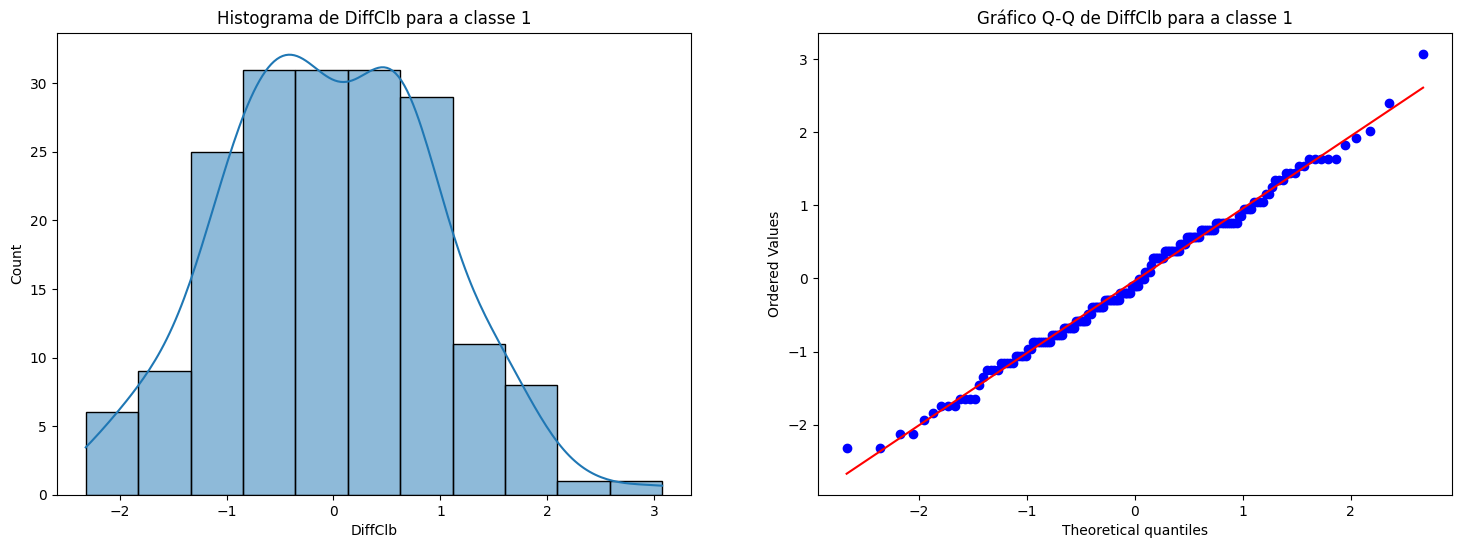

Atributo DiffRollRate


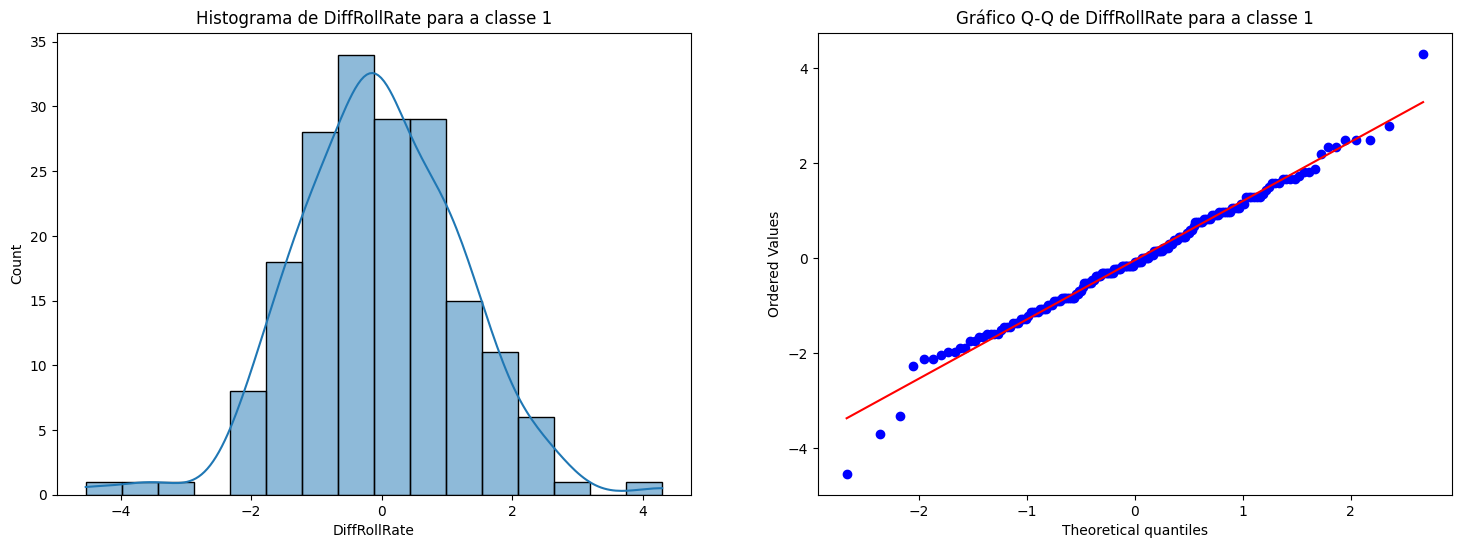

Atributo DiffDiffClb


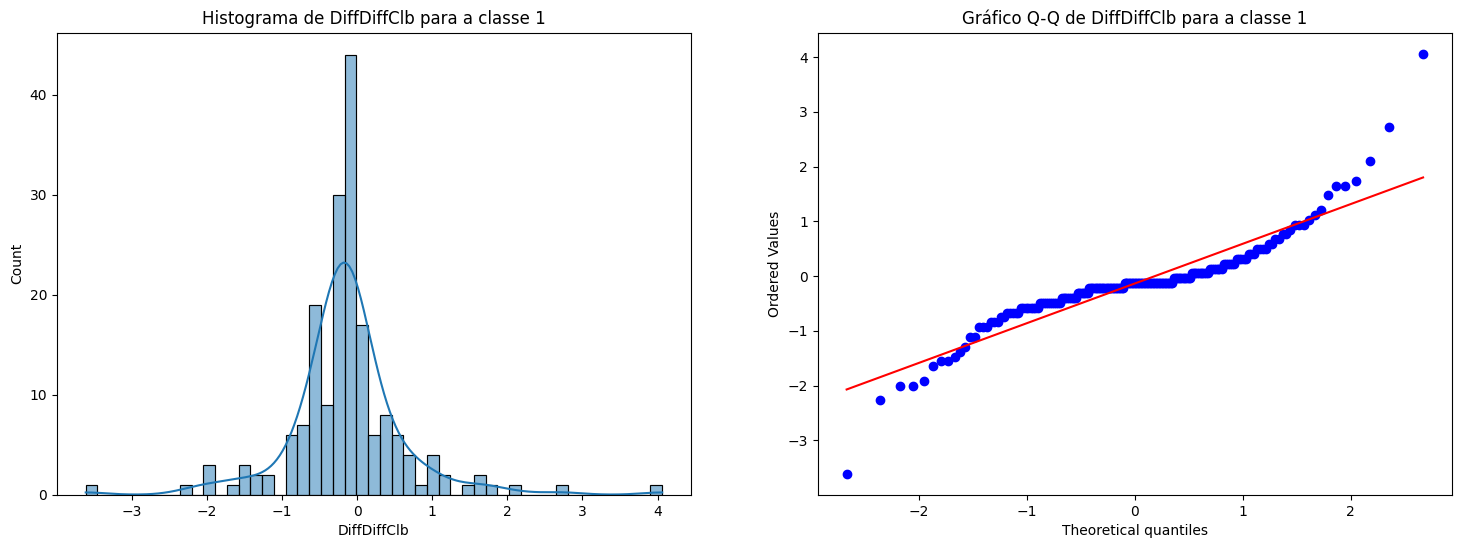

Atributo DiffSeTime1


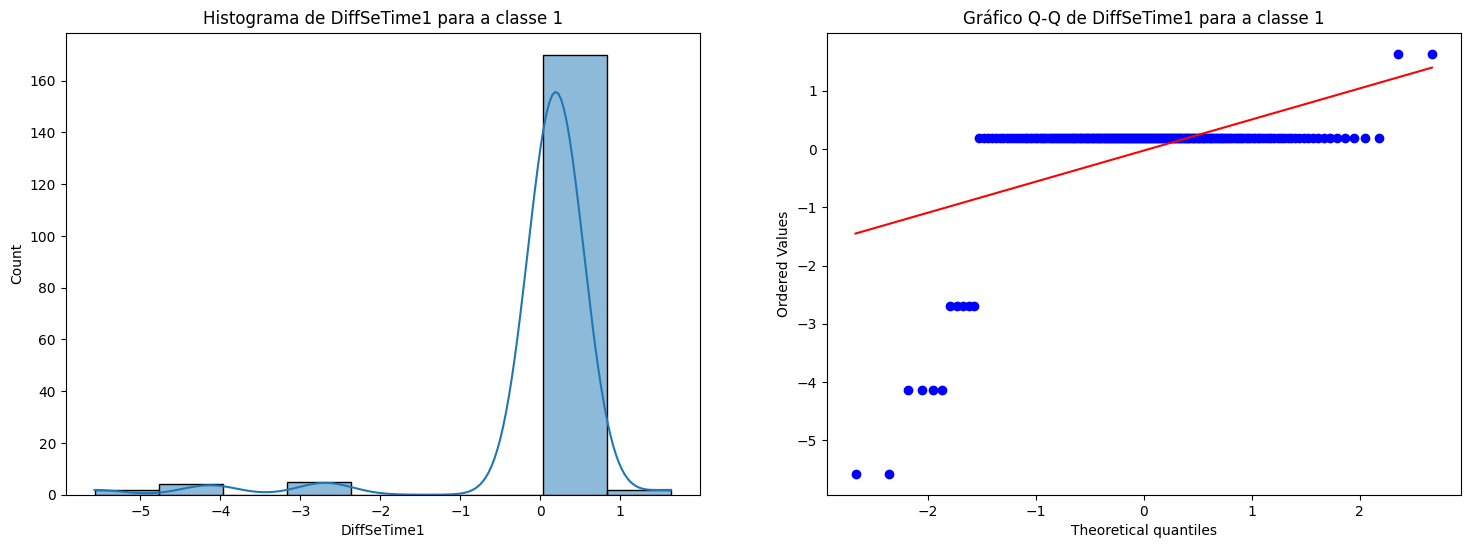

Atributo DiffSeTime3


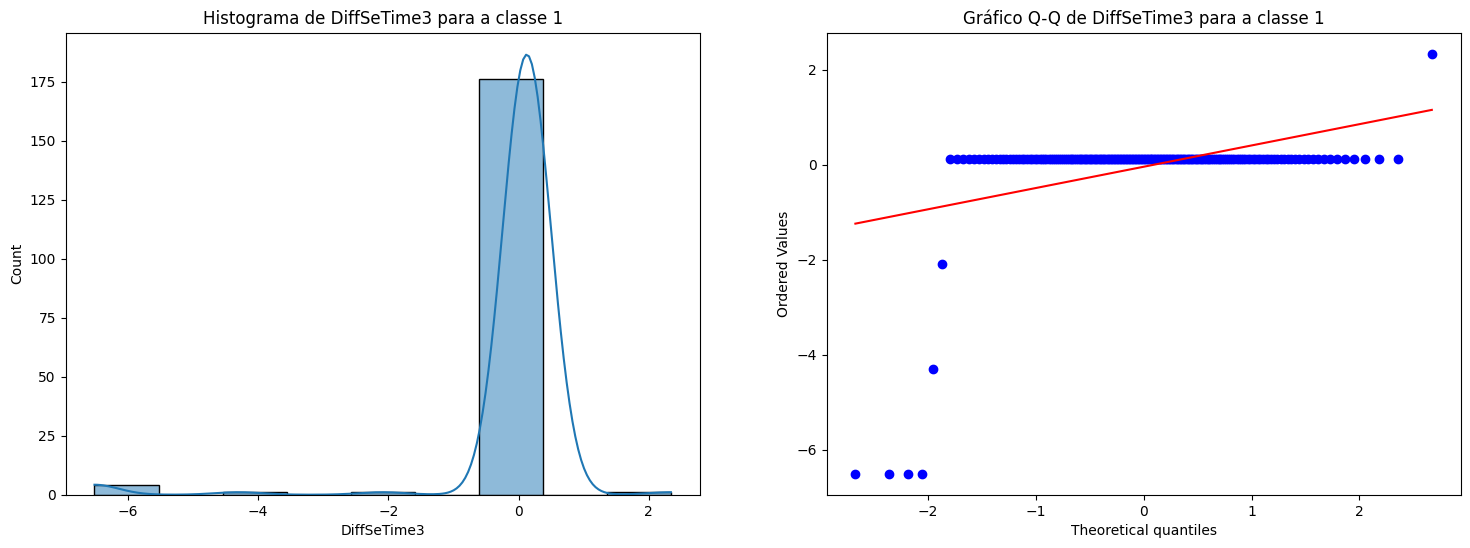

Atributo DiffSeTime5


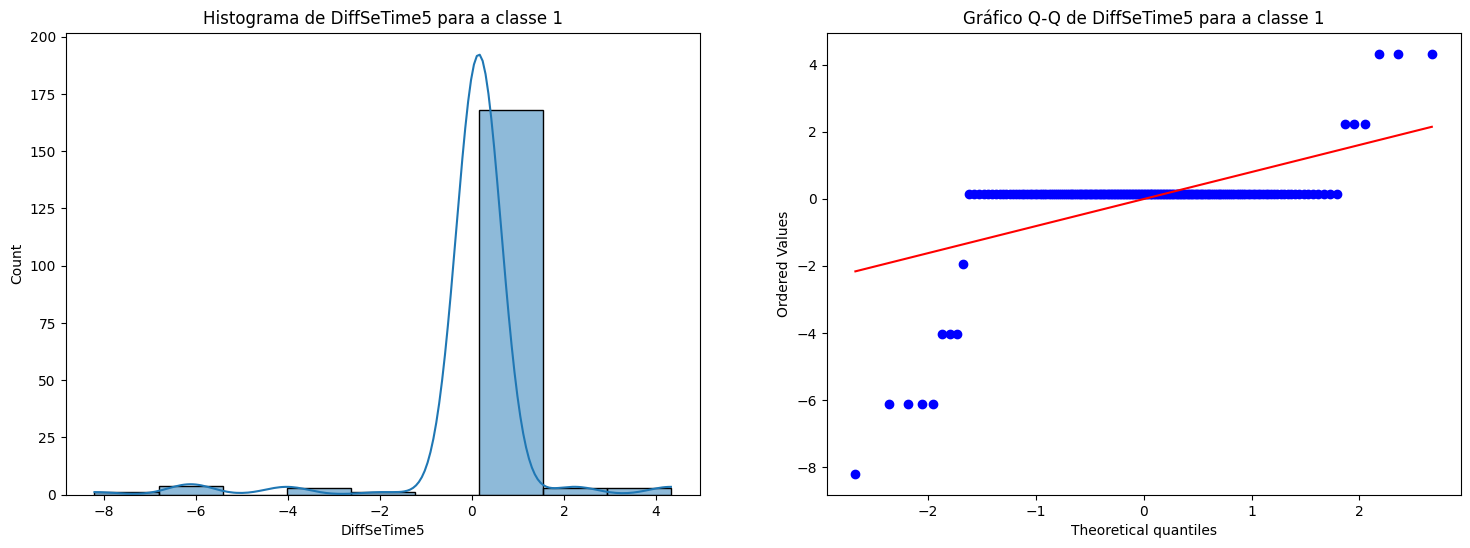

Atributo DiffSeTime7


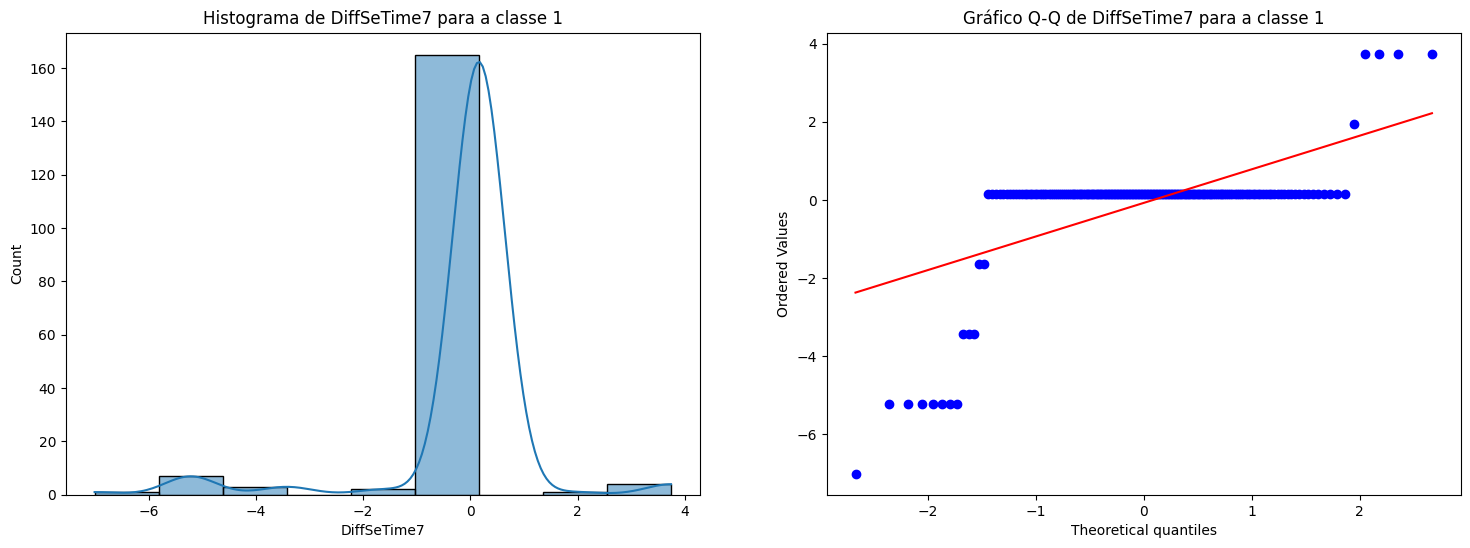

Atributo DiffSeTime9


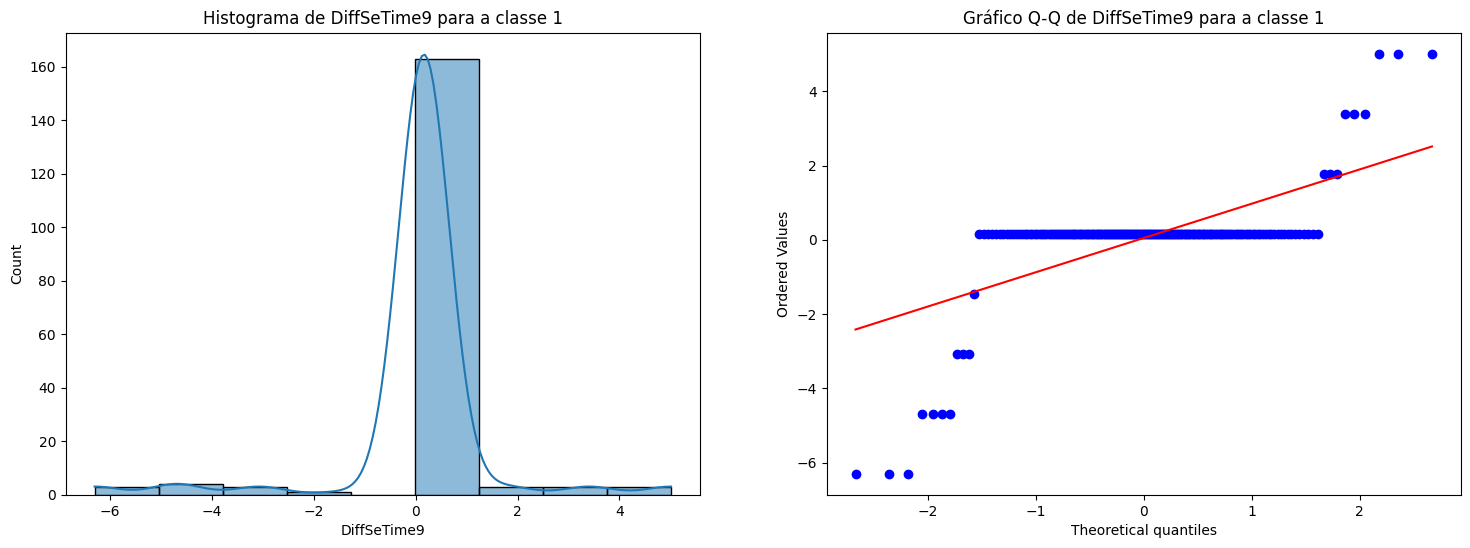

Atributo DiffSeTime11


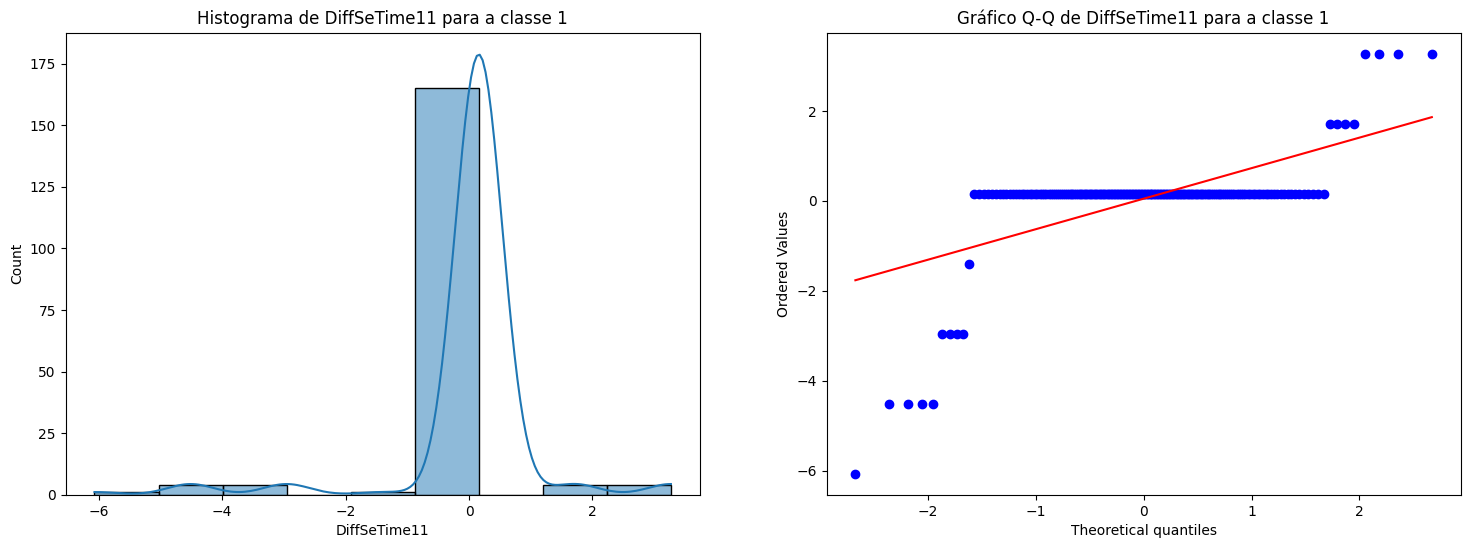

Atributo DiffSeTime13


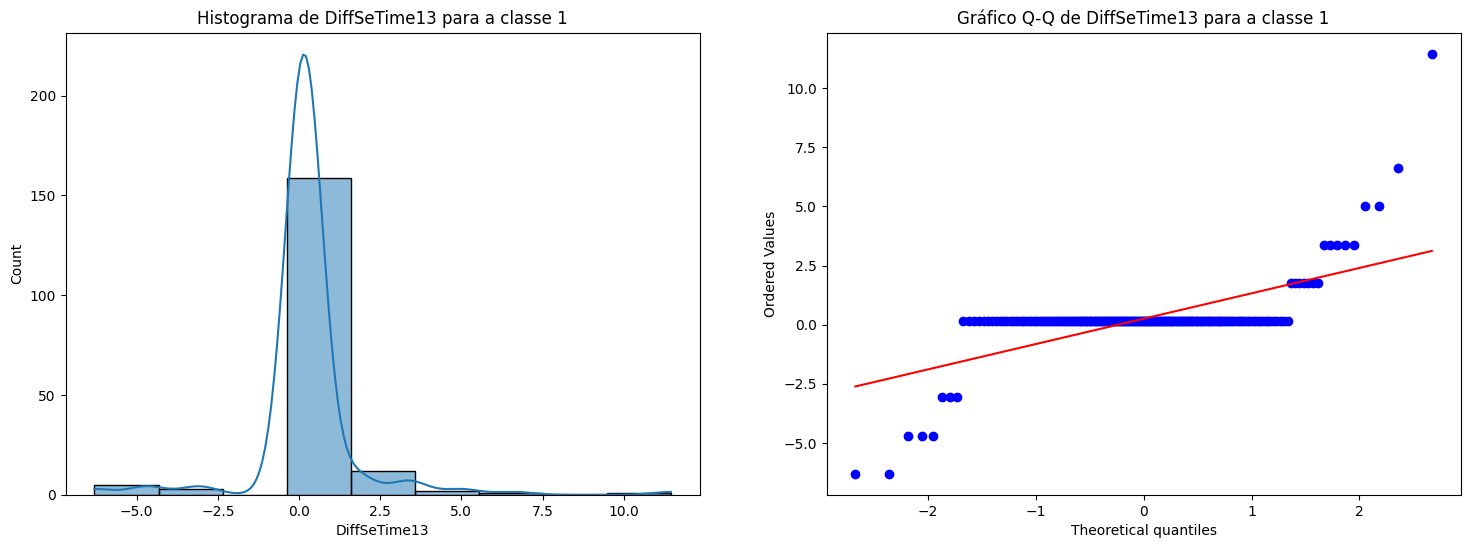

Atributo Alpha


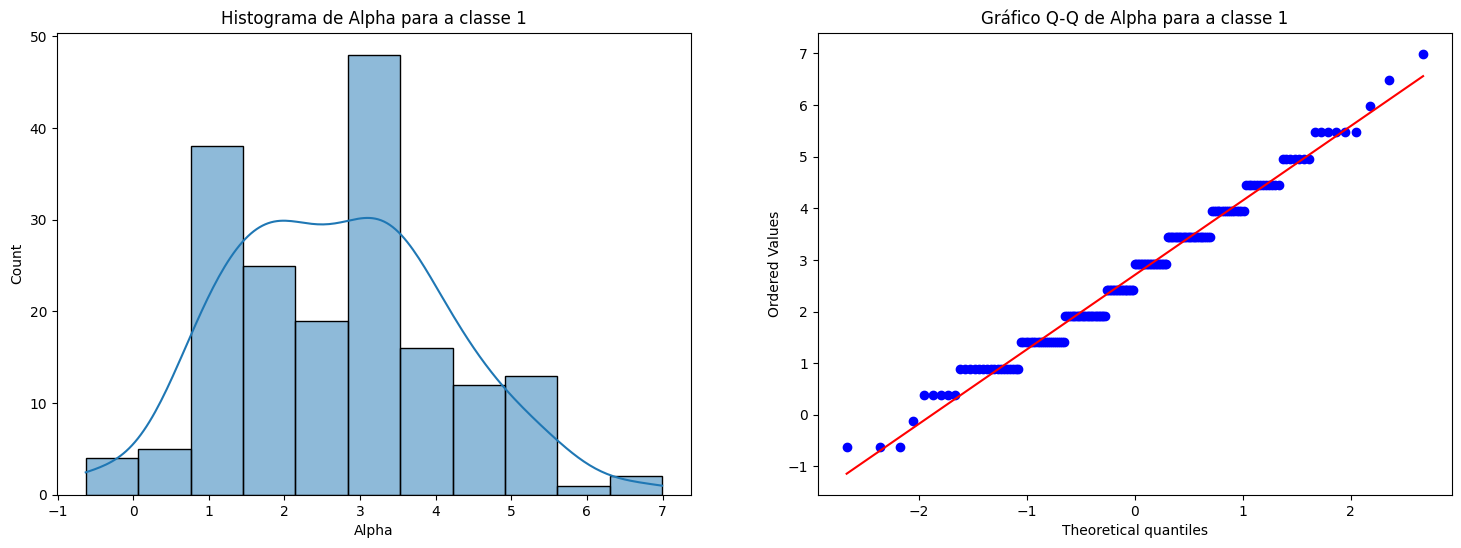

Atributo Se


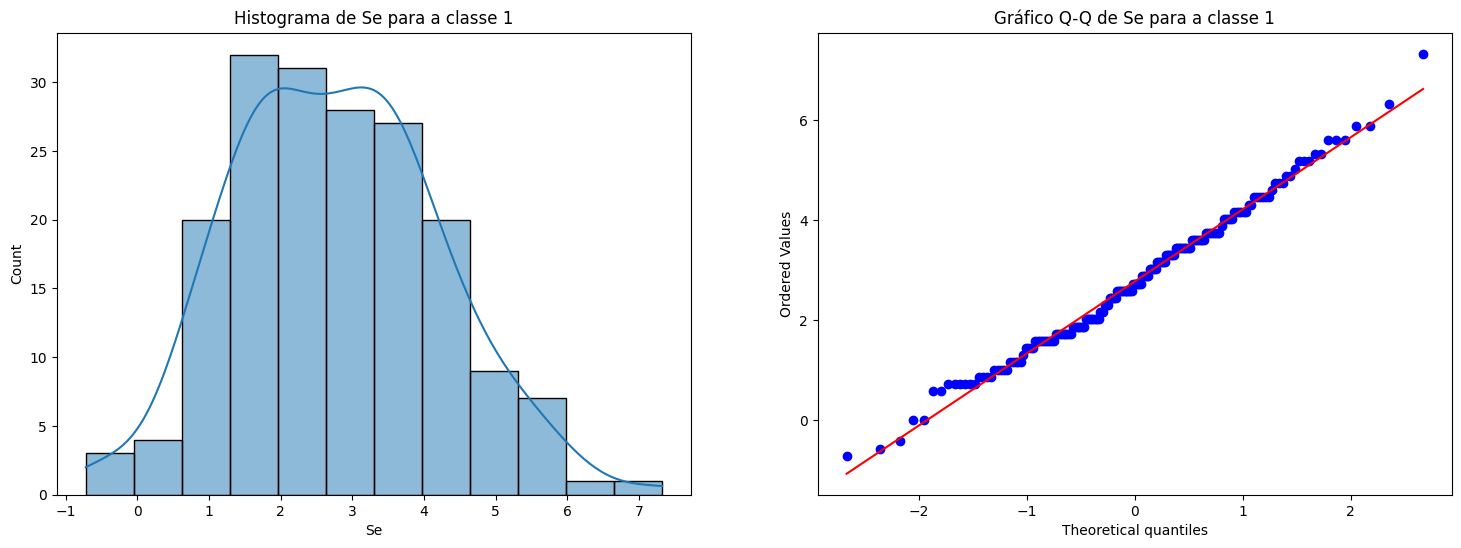

Classe 0
Atributo ClimbRate


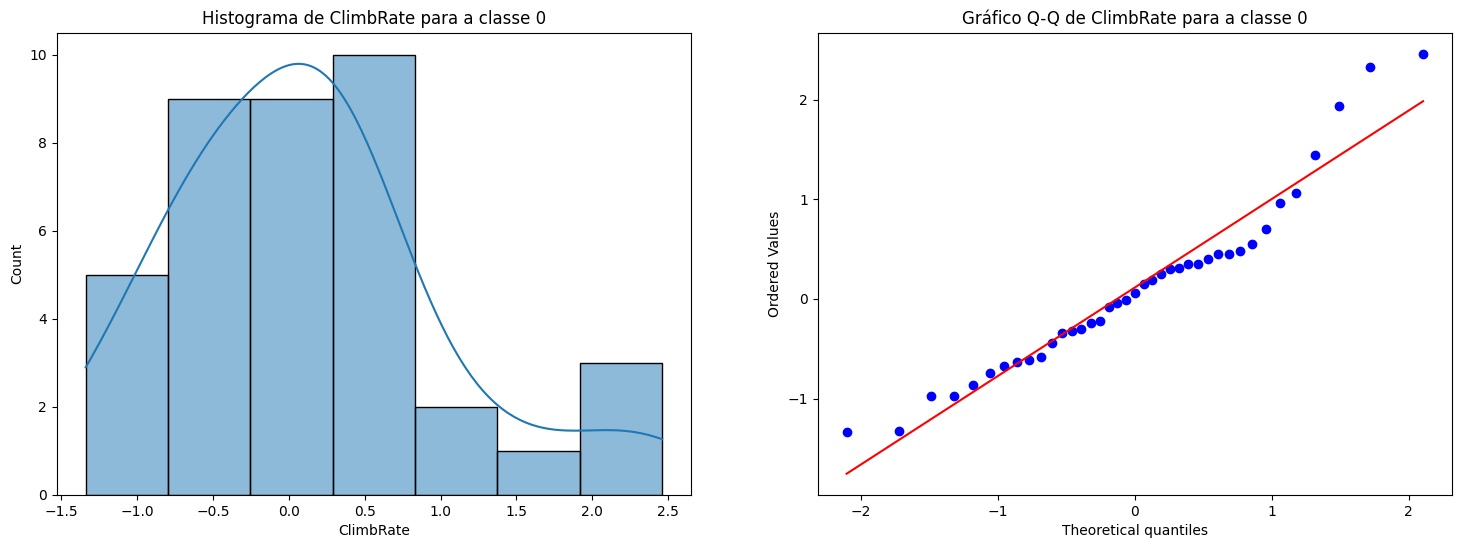

Atributo Sgz


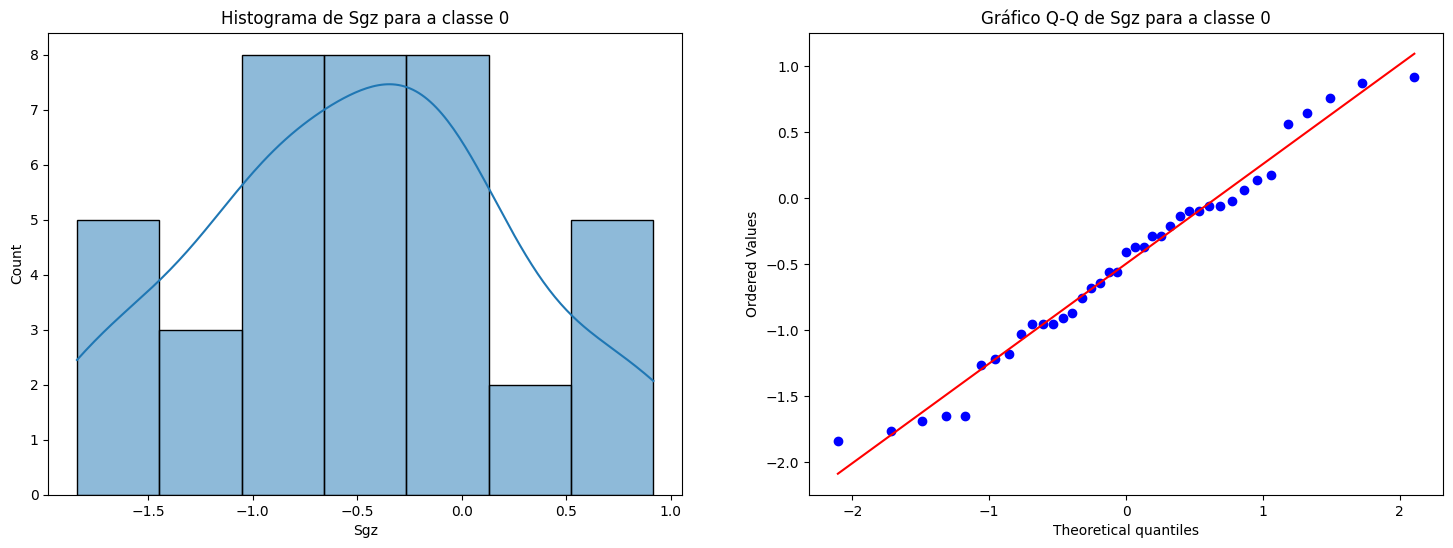

Atributo P


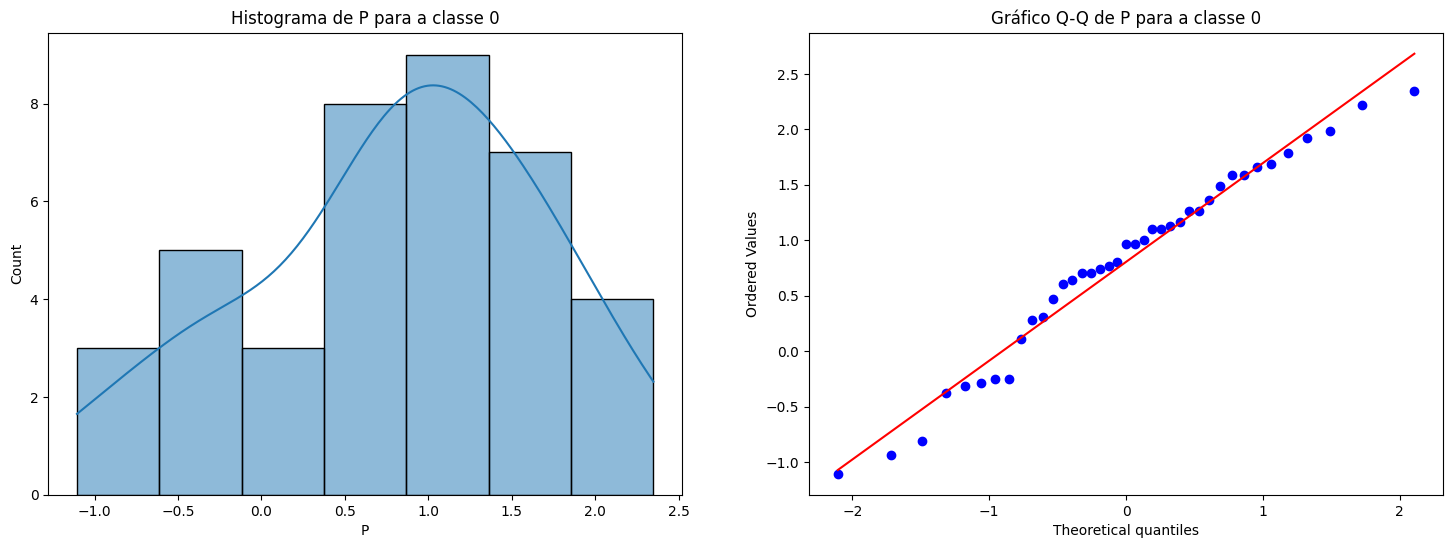

Atributo Q


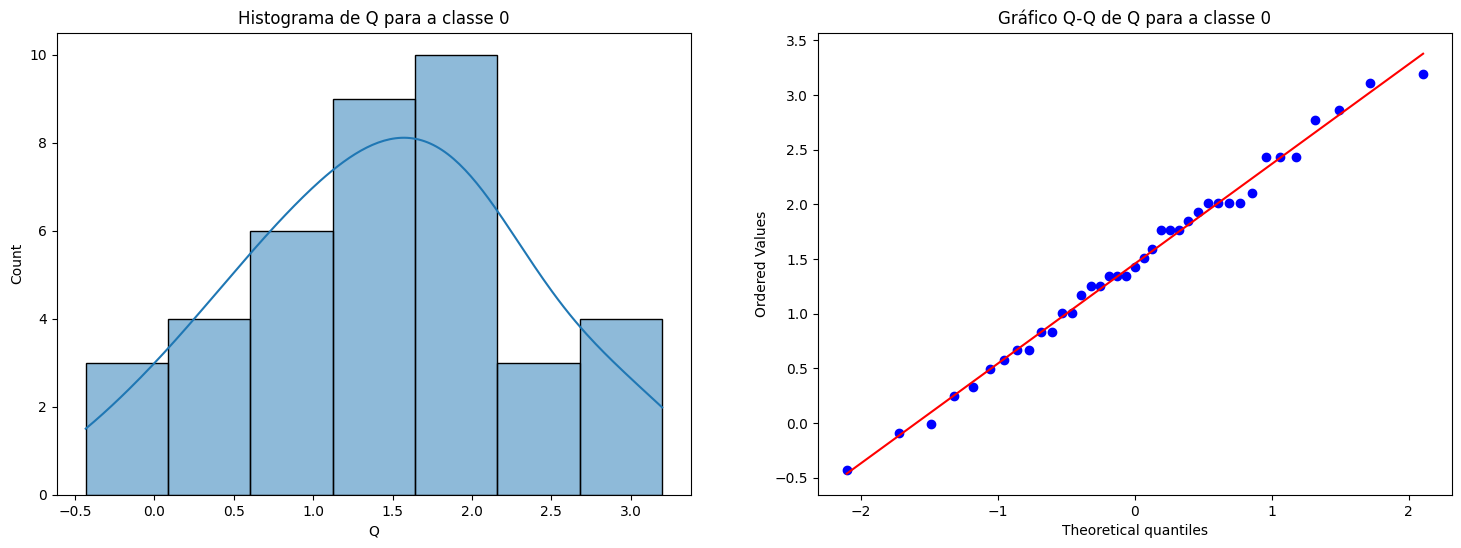

Atributo CurPitch


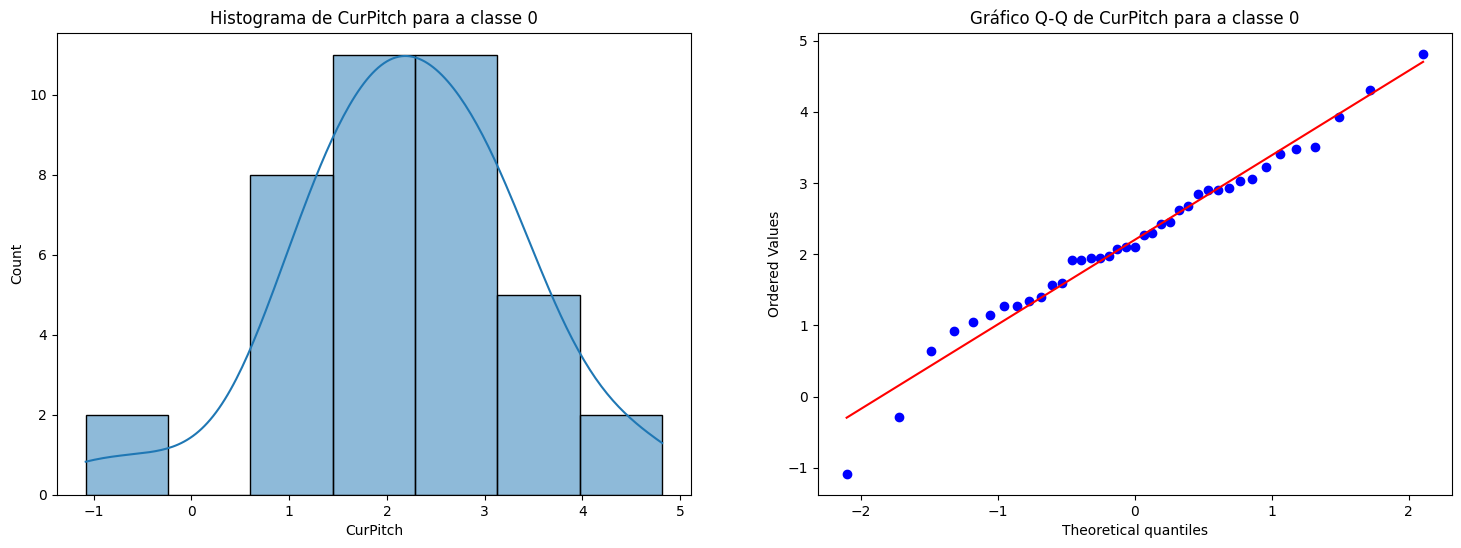

Atributo CurRoll


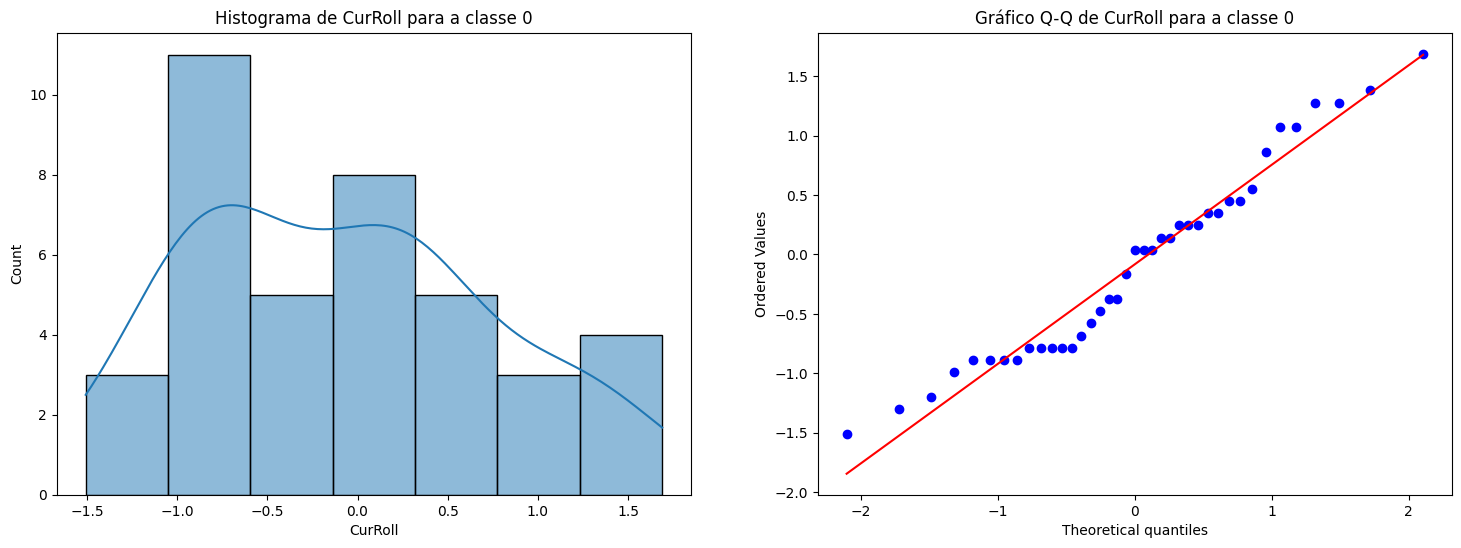

Atributo AbsRoll


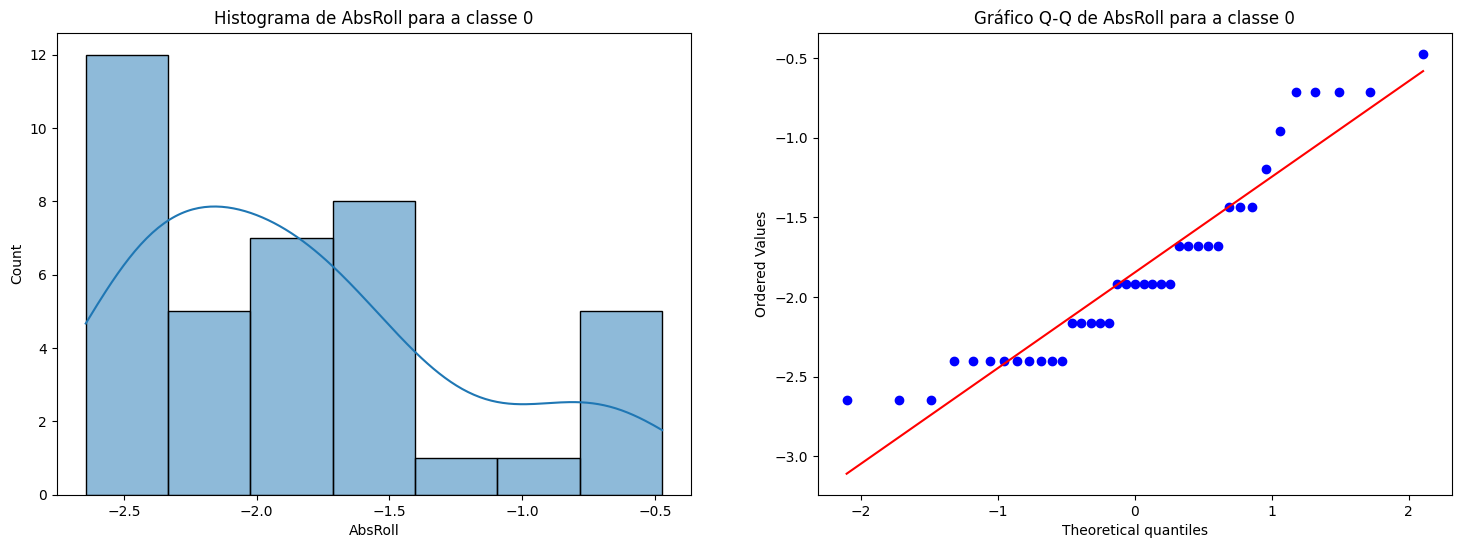

Atributo DiffClb


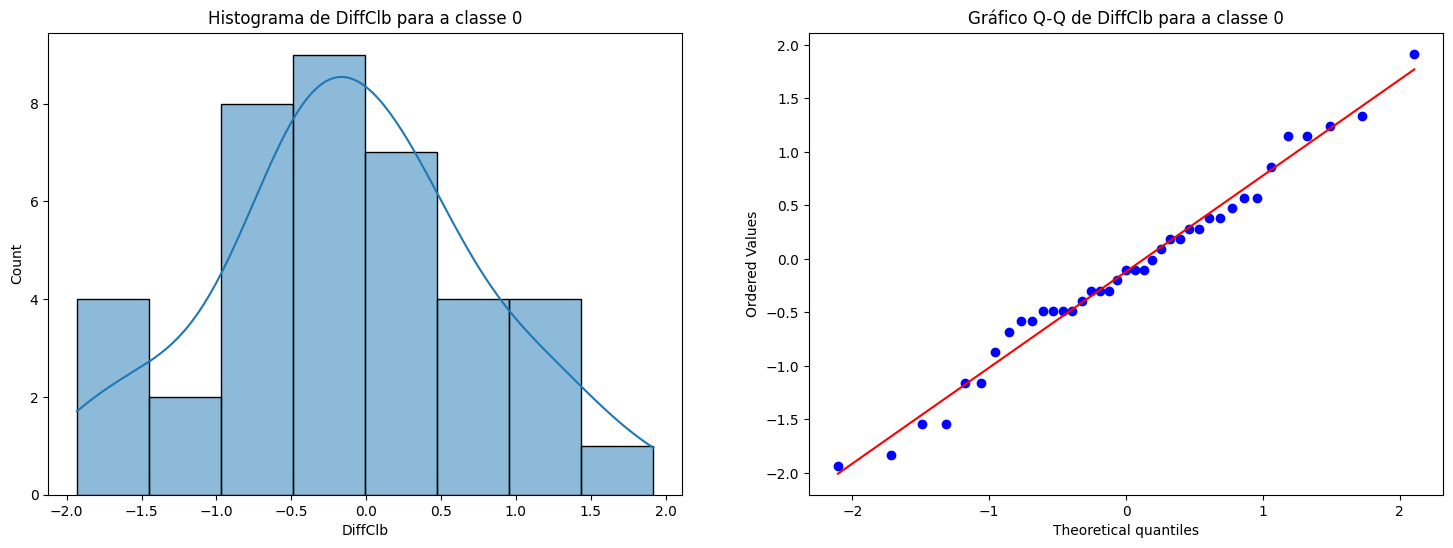

Atributo DiffRollRate


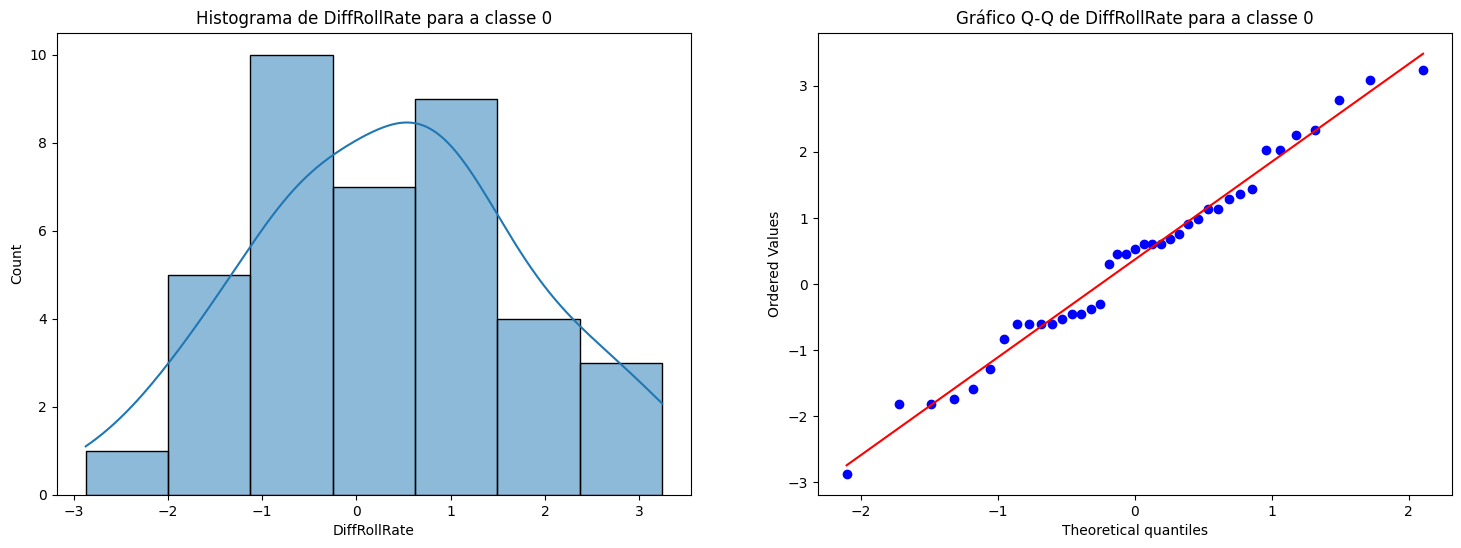

Atributo DiffDiffClb


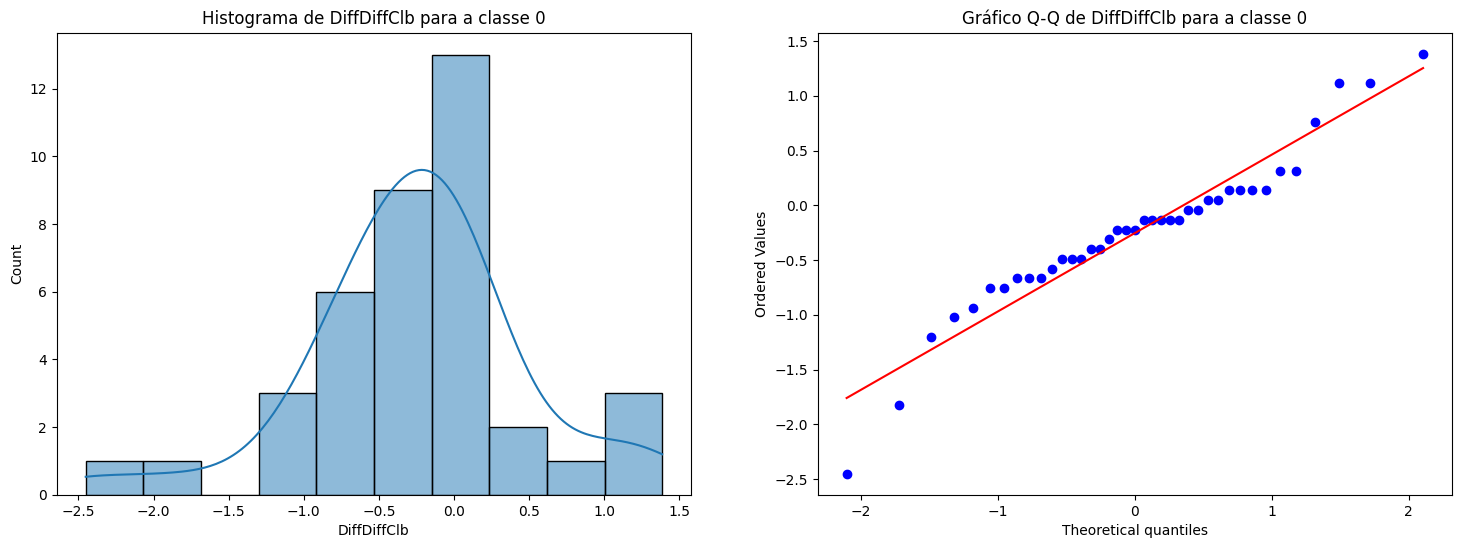

Atributo DiffSeTime1


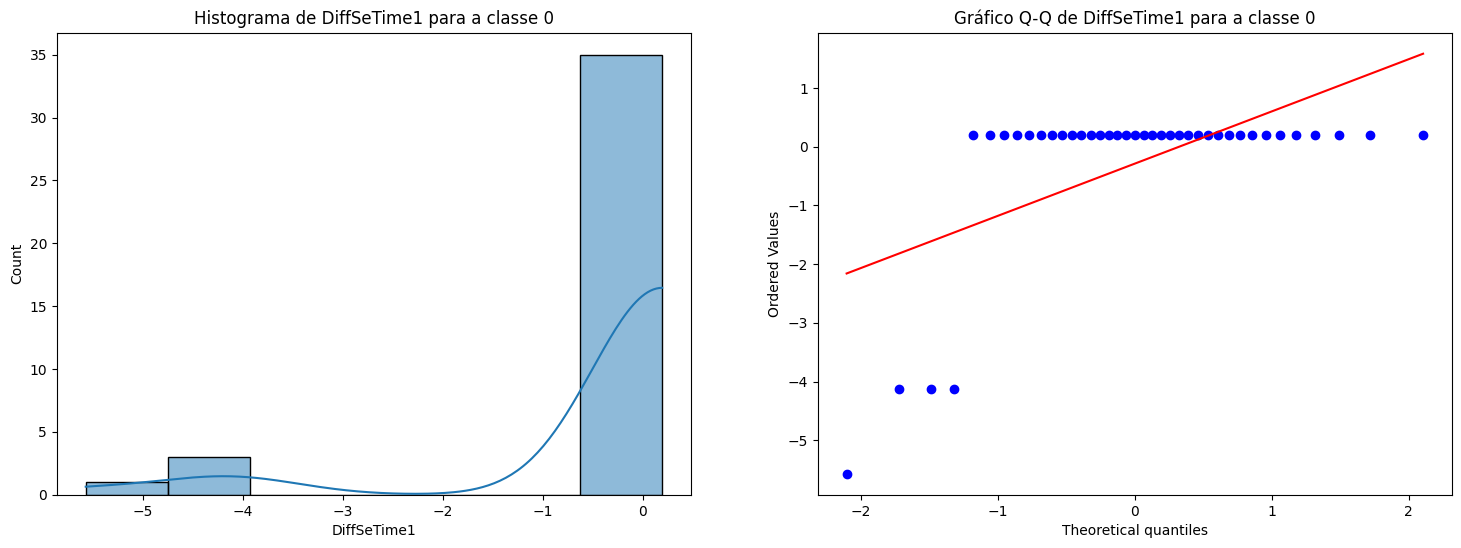

Atributo DiffSeTime3


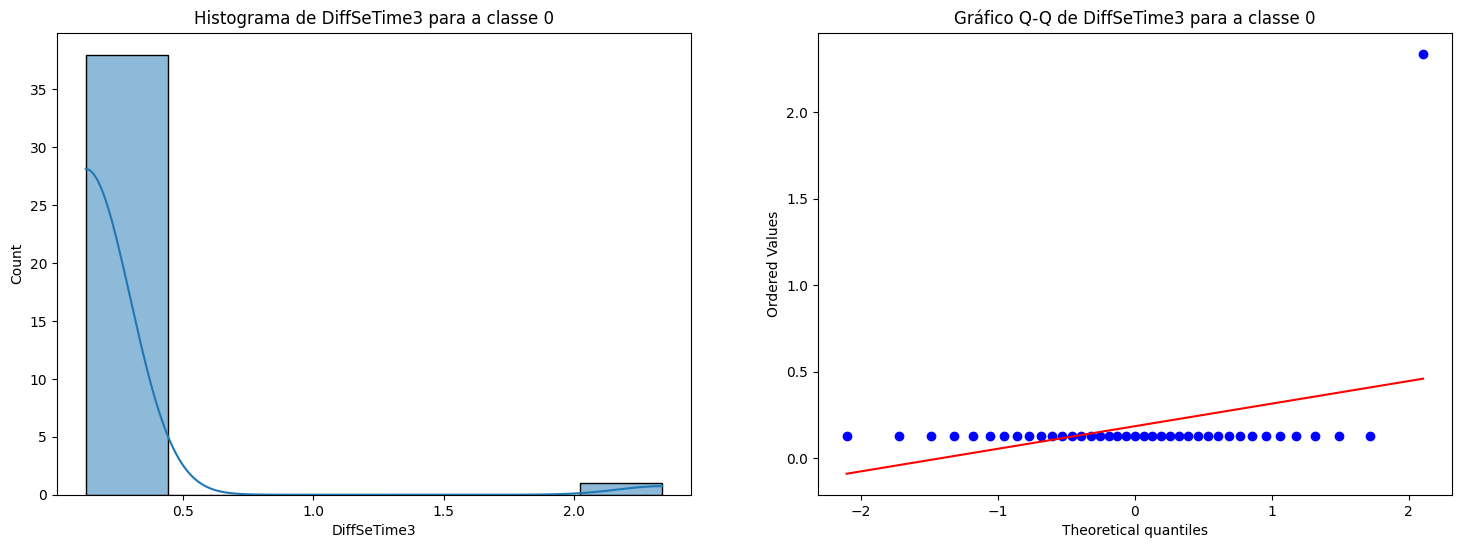

Atributo DiffSeTime5


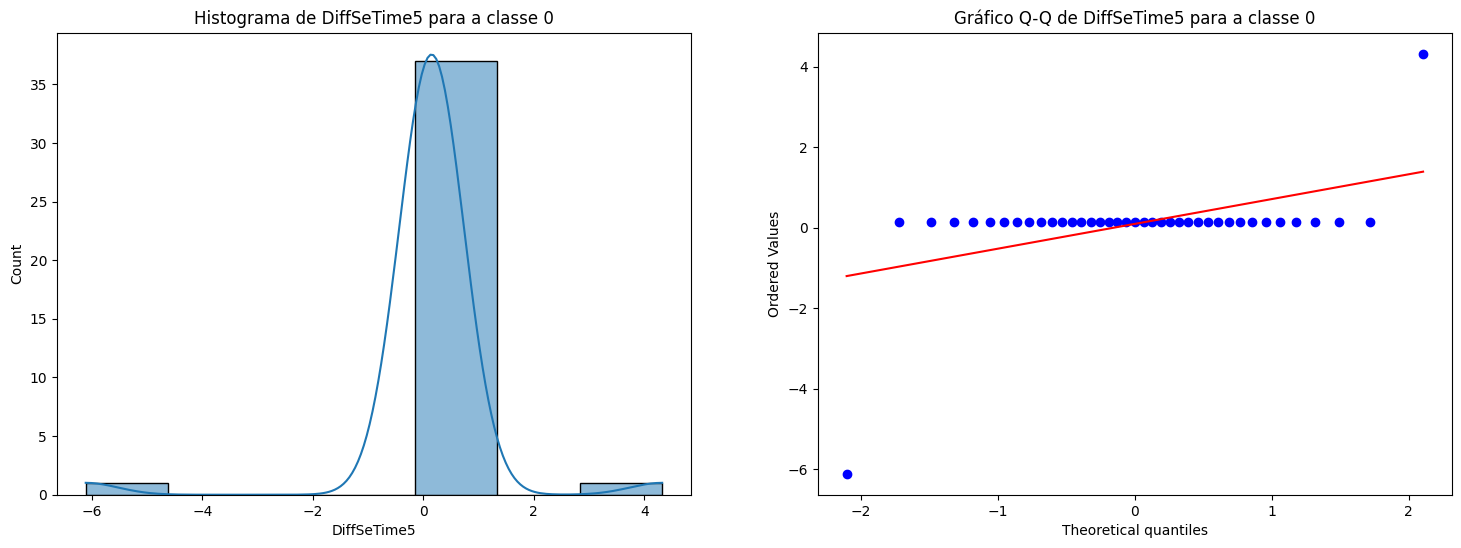

Atributo DiffSeTime7


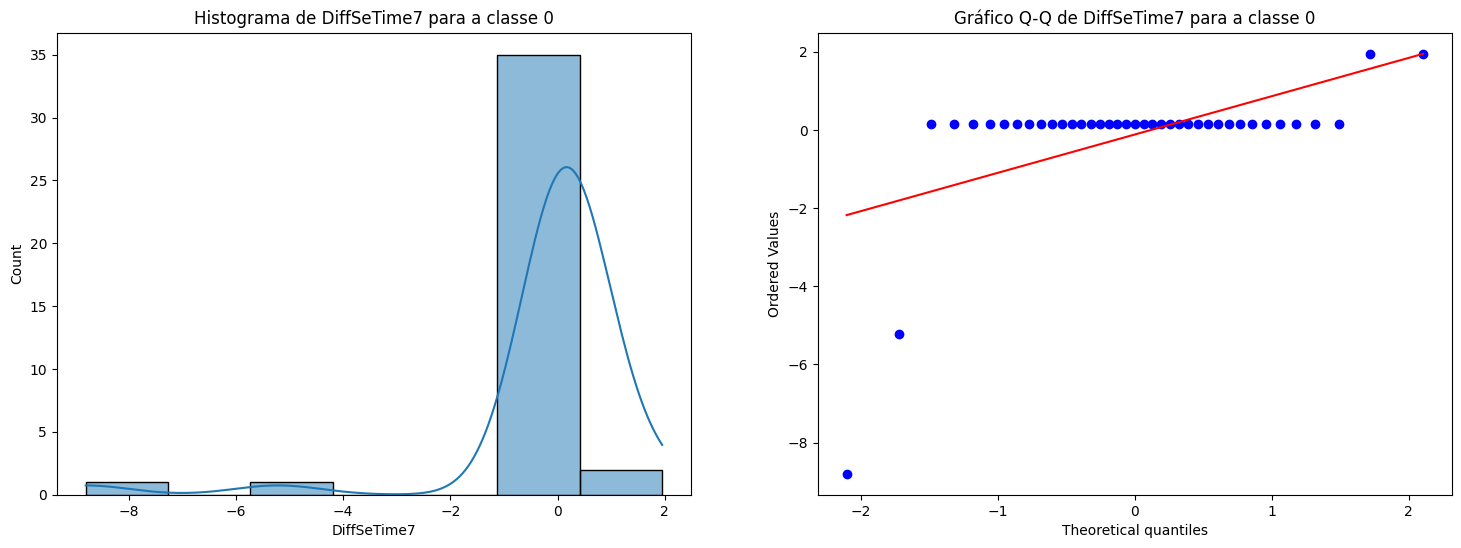

Atributo DiffSeTime9


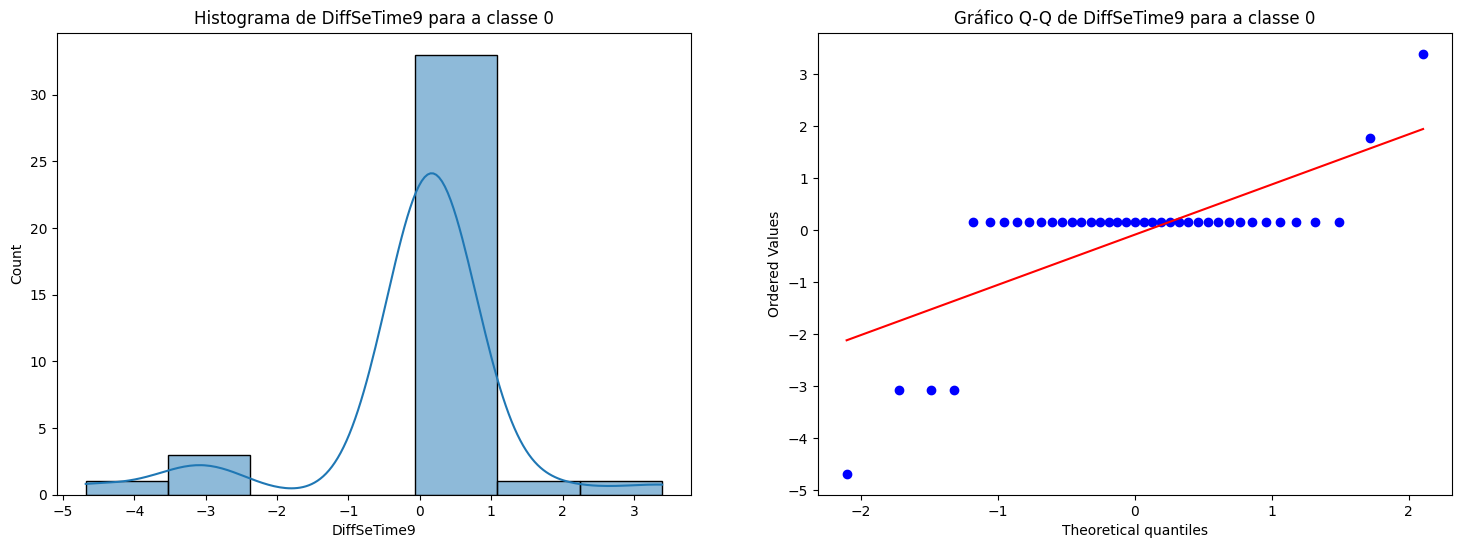

Atributo DiffSeTime11


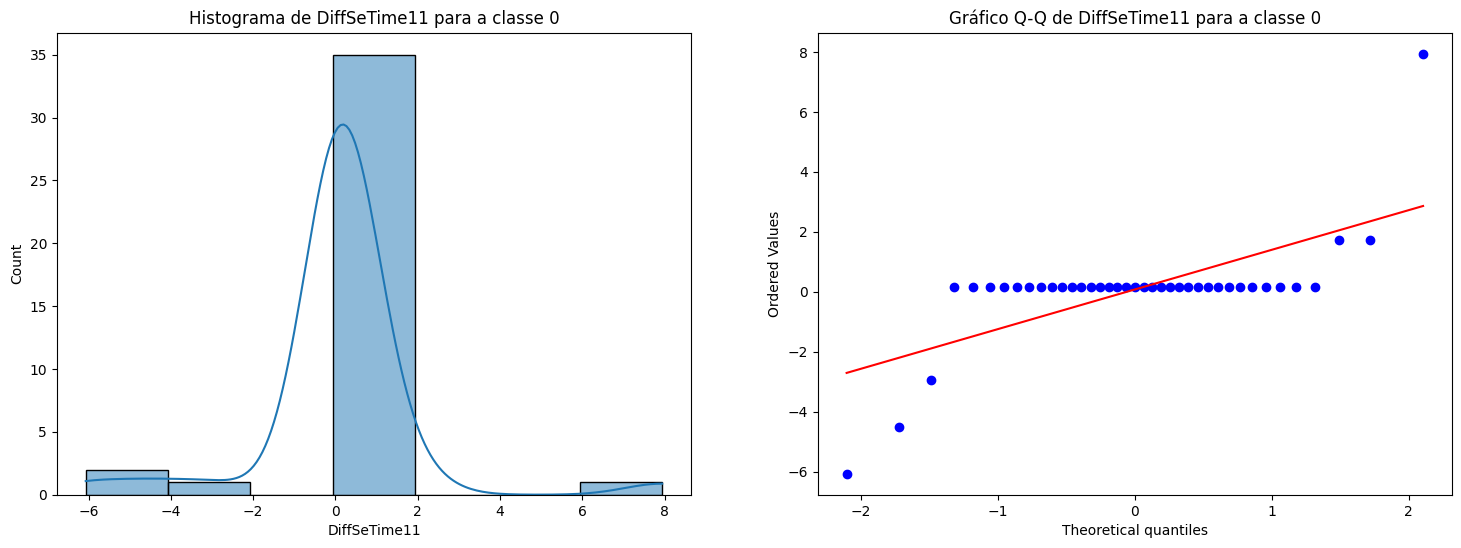

Atributo DiffSeTime13


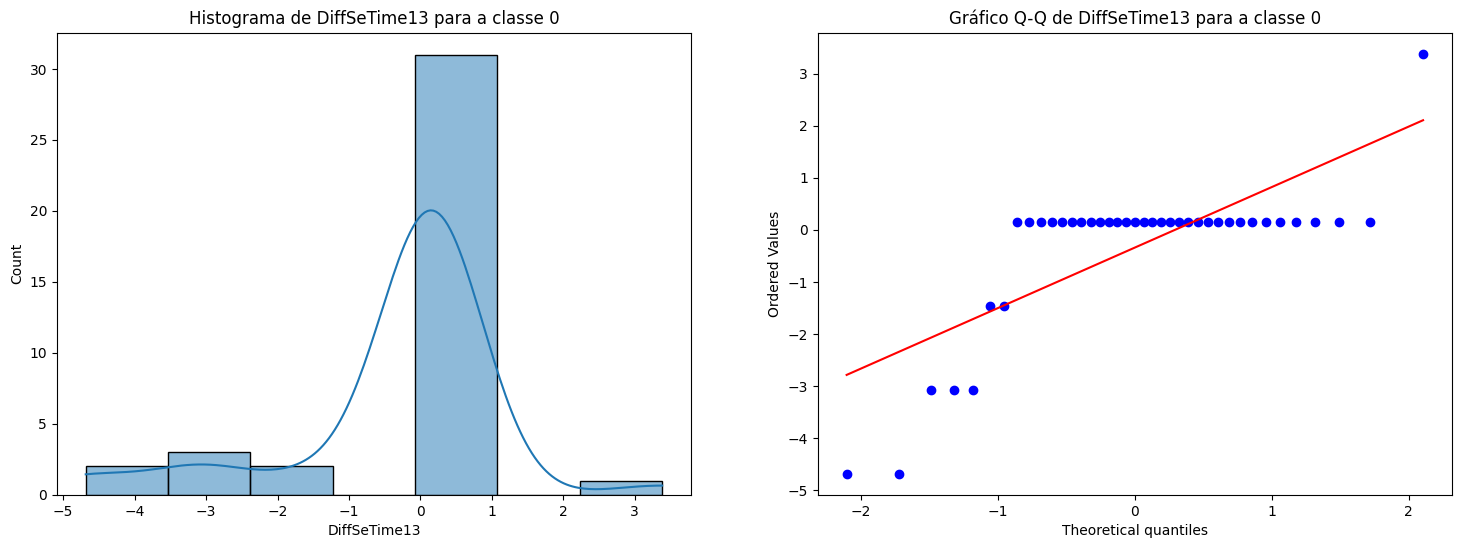

Atributo Alpha


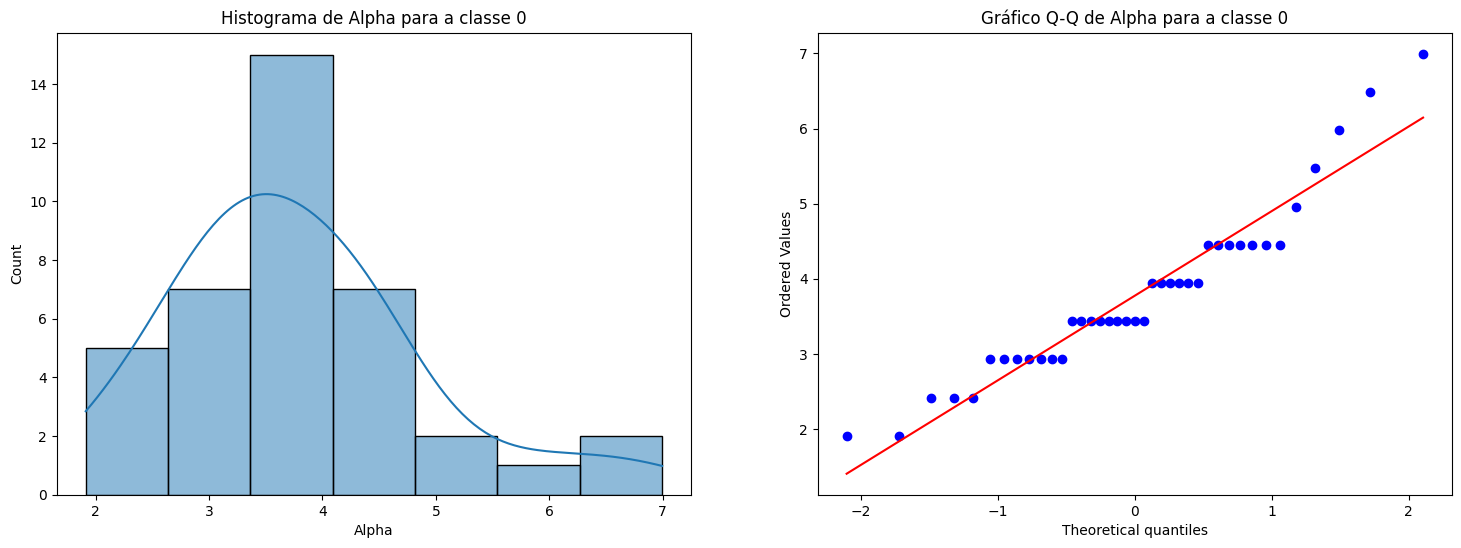

Atributo Se


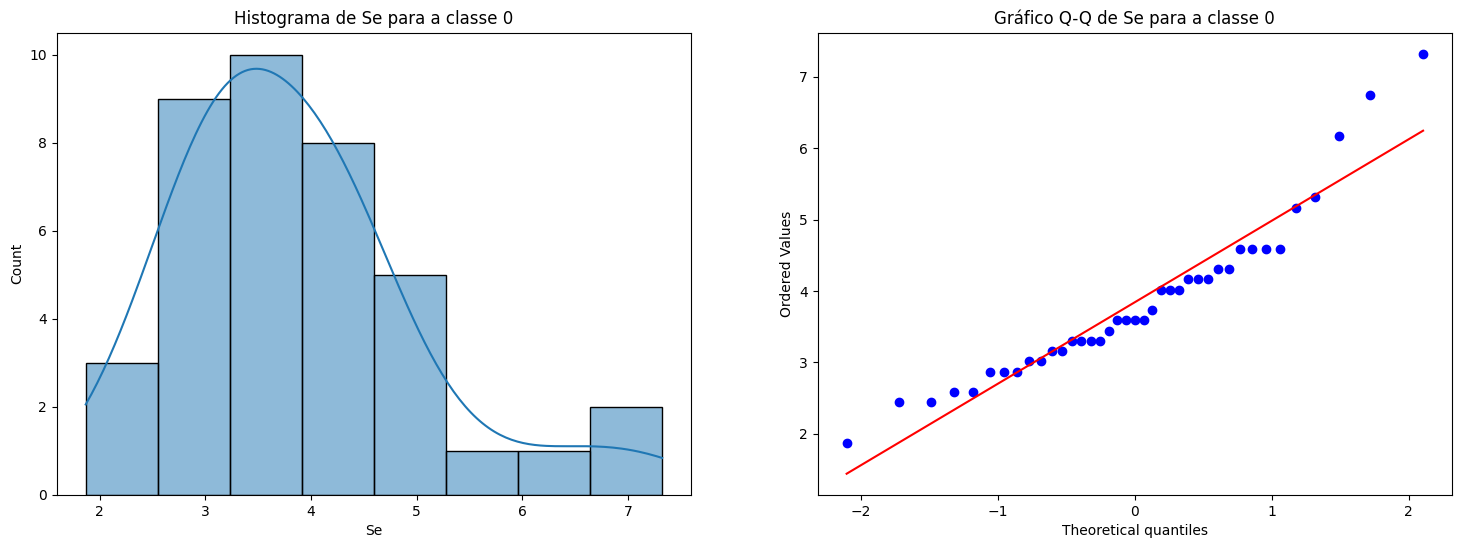

In [64]:
def plot_histogram_and_qq(data, attribute, cls):
    plt.figure(figsize=(18, 6))

    # Histograma com KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data[attribute], kde=True)
    plt.title(f'Histograma de {attribute} para a classe {cls}')

    # Gráfico Q-Q
    plt.subplot(1, 2, 2)
    stats.probplot(data[attribute], dist="norm", plot=plt)
    plt.title(f'Gráfico Q-Q de {attribute} para a classe {cls}')

    plt.show()



# Exemplo para um atributo em uma classe
for cls in classes:
    print(f"Classe {cls}")
    for attribute in selected_features:
        print(f"Atributo {attribute}")
        plot_histogram_and_qq(class_data[cls], attribute, cls)


In [65]:
def shapiro_test(data, attribute):
    stat, p = stats.shapiro(data[attribute])
    if p > 0.05:
        return True
    else:
        return False

def test_ks(data, attribute):
    stat, p = stats.kstest(data[attribute], 'norm')
    if p > 0.05:
        return True
    else:
        return False


# Exemplo para um atributo em uma classe
sum = 0
total = 0
for cls in classes:
    for attribute in selected_features:
        sum += shapiro_test(class_data[cls], attribute)
        total += 1
print(f"Quantidade de casos nos quais as variáveis aparentemente seguem uma distribuição normal (Shapiro test): {sum}/{total}")
sum = 0
for cls in classes:
    for attribute in selected_features:
        sum += test_ks(class_data[cls], attribute)
print(f"Quantidade de casos nos quais as variáveis aparentemente seguem uma distribuição normal (Kolmogorov-Smirnov test): {sum}/{total}")

/home/araju/anaconda3/envs/IA_TP2/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7110.
  res = hypotest_fun_out(*samples, **kwds)


Quantidade de casos nos quais as variáveis aparentemente seguem uma distribuição normal (Shapiro test): 16/114
Quantidade de casos nos quais as variáveis aparentemente seguem uma distribuição normal (Kolmogorov-Smirnov test): 7/114


# Árvores de Decisão

### VI

In [93]:
X = data[selected_features]
y = data['Goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MAX_DEPTH = 50
best_f1_test = -1
best_f1_train = -1
best_depth_test = 1
best_depth_train = 1
for i in range(1, MAX_DEPTH+1):

    model = tree.DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    if f1_score(y_train, y_pred_train, average='macro') > best_f1_train:
        best_f1_train = f1_score(y_train, y_pred_train, average='macro')
        best_depth_train = i
    if f1_score(y_test, y_pred_test, average='macro') > best_f1_test:
        best_f1_test = f1_score(y_test, y_pred_test, average='macro')
        best_depth_test = i

print(f"Melhor profundidade para o conjunto de treino: {best_depth_train} (F1-Score: {best_f1_train})")
print(f"Melhor profundidade para o conjunto de teste: {best_depth_test} (F1-Score: {best_f1_test})")



Melhor profundidade para o conjunto de treino: 31 (F1-Score: 1.0)
Melhor profundidade para o conjunto de teste: 7 (F1-Score: 0.5408479290512412)


In [67]:
best_acc_test = -1
best_acc_train = -1
best_depth_test = 1
best_depth_train = 1
for i in range(1, MAX_DEPTH +1):
    model = tree.DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    if accuracy_score(y_train, y_pred_train) > best_acc_train:
        best_acc_train = accuracy_score(y_train, y_pred_train)
        best_depth_train = i
    if accuracy_score(y_test, y_pred_test) > best_acc_test:
        best_acc_test = accuracy_score(y_test, y_pred_test)
        best_depth_test = i

print(f"Melhor profundidade para o conjunto de treino: {best_depth_train} (Acurácia: {best_acc_train})")
print(f"Melhor profundidade para o conjunto de teste: {best_depth_test} (Acurácia: {best_acc_test})")

Melhor profundidade para o conjunto de treino: 31 (Acurácia: 1.0)
Melhor profundidade para o conjunto de teste: 7 (Acurácia: 0.712)


In [68]:
best_precision_test = -1
best_precision_train = -1
best_depth_test = 1
best_depth_train = 1
for i in range(1, MAX_DEPTH +1):
    model = tree.DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    if precision_score(y_train, y_pred_train, average='macro', zero_division=0) > best_precision_train:
        best_precision_train = precision_score(y_train, y_pred_train, average='macro', zero_division=0)
        best_depth_train = i
    if precision_score(y_test, y_pred_test, average='macro', zero_division=0) > best_precision_test:
        best_precision_test = precision_score(y_test, y_pred_test, average='macro', zero_division=0)
        best_depth_test = i

print(f"Melhor profundidade para o conjunto de treino: {best_depth_train} (Precisão: {best_precision_train})")
print(f"Melhor profundidade para o conjunto de teste: {best_depth_test} (Precisão: {best_precision_test})")

Melhor profundidade para o conjunto de treino: 31 (Precisão: 1.0)
Melhor profundidade para o conjunto de teste: 7 (Precisão: 0.5871056363239728)


In [69]:
model = tree.DecisionTreeClassifier(max_depth=31)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Classification Report (Treino):")
print(classification_report(y_train, y_pred_train))
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)
print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test))
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

Classification Report (Treino):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00       140
           2       1.00      1.00      1.00       586
           3       1.00      1.00      1.00      2124
           4       1.00      1.00      1.00      5705
           5       1.00      1.00      1.00      2417

    accuracy                           1.00     11000
   macro avg       1.00      1.00      1.00     11000
weighted avg       1.00      1.00      1.00     11000

[[  28    0    0    0    0    0]
 [   0  140    0    0    0    0]
 [   0    0  586    0    0    0]
 [   0    0    0 2124    0    0]
 [   0    0    0    0 5705    0]
 [   0    0    0    0    0 2417]]
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.30      0.27      0.29        11
           1       0.35      0.30      0.33        43
           2       0.34      0.37

# KNN

### VII

In [102]:
X = data[selected_features]
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = data['Goal']
X

array([[-0.02266577,  0.25625762, -0.1182328 , ...,  0.15668893,
        -0.11967642, -0.14436019],
       [-2.99724359,  1.07167669, -0.94073953, ...,  0.15668893,
        -1.13607592, -1.29330894],
       [-0.13411636,  2.35304951, -1.4013433 , ...,  0.15668893,
        -0.62787617, -0.43159738],
       ...,
       [ 1.67599495, -0.05437821,  1.29647877, ...,  1.77052619,
         1.40492282,  1.43544434],
       [ 0.43466597,  0.1009397 , -0.64463711, ...,  0.15668893,
         3.94592156,  4.16419763],
       [-0.59144809,  2.50836743,  0.24367016, ...,  0.15668893,
         1.40492282,  1.72268153]])

In [103]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print("Classification Report (Treino):")
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.40      0.18      0.25        11
           1       0.33      0.47      0.38        43
           2       0.33      0.35      0.34       148
           3       0.54      0.45      0.49       548
           4       0.68      0.74      0.71      1405
           5       0.62      0.56      0.58       595

    accuracy                           0.61      2750
   macro avg       0.48      0.46      0.46      2750
weighted avg       0.61      0.61      0.61      2750

[[   2    5    4    0    0    0]
 [   1   20   13    9    0    0]
 [   1   26   52   57   12    0]
 [   1    9   69  246  221    2]
 [   0    1   20  141 1039  204]
 [   0    0    0    5  259  331]]
Classification Report (Treino):
              precision    recall  f1-score   support

           0       0.56      0.64      0.60        28
           1       0.59      0.77      0.67       140
           2       0.68      0.66

In [104]:
MAX_N_NEIGHBOURS = 10
best_f1_test = -1
best_f1_train = -1
best_n_test = -1
best_n_train = -1
for i in range(1, MAX_N_NEIGHBOURS+1):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    if f1_score(y_train, y_pred_train, average='macro') > best_f1_train:
        best_f1_train = f1_score(y_train, y_pred_train, average='macro')
        best_n_train = i
    if f1_score(y_test, y_pred_test, average='macro') > best_f1_test:
        best_f1_test = f1_score(y_test, y_pred_test, average='macro')
        best_n_test = i
print(f"Melhor profundidade para o conjunto de treino: {best_n_train} (F1-Score: {best_f1_train})")
print(f"Melhor profundidade para o conjunto de teste: {best_n_test} (F1-Score: {best_f1_test})")

Melhor profundidade para o conjunto de treino: 1 (F1-Score: 1.0)
Melhor profundidade para o conjunto de teste: 8 (F1-Score: 0.47161578182621716)


# XGBoost

### VIII

In [72]:
df_results = pd.DataFrame(columns=['n_estimators', 'max_depth', 'learning_rate', 'accuracy', 'precision', 'recall', 'f1'])

In [73]:
X = data[selected_features]
y = data['Goal']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
params = [[50, 4, 0.2],
          [50, 10, 1],
          [50, 10, 0.2],
          [50, 10, 0.04],
          [200, 4, 1],
          [200, 4, 0.2],
          [200, 4, 0.04],
          [200, 10, 0.2]]
for param in params:
    model = xgb.XGBClassifier(n_estimators=param[0], max_depth=param[1], learning_rate=param[2])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    df_results.loc[len(df_results)] = {
        'n_estimators': param[0],
        'max_depth': param[1],
        'learning_rate': param[2],
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='macro'),
        'recall': recall_score(y_test, y_pred, average='macro'),
        'f1': f1_score(y_test, y_pred, average='macro')
    } 


In [113]:
df_results.iloc[:, -4:] = df_results.iloc[:, -4:].round(4)
df_results

n_estimators  max_depth  learning_rate  accuracy  precision  recall      f1
0            50          4           0.20    0.7418     0.6444  0.5326  0.5709
1            50         10           1.00    0.7309     0.6402  0.5640  0.5930
2            50         10           0.20    0.7451     0.7216  0.6023  0.6463
3            50         10           0.04    0.7338     0.6363  0.5183  0.5545
4           200          4           1.00    0.7222     0.6615  0.5651  0.5964
5           200          4           0.20    0.7473     0.6838  0.5897  0.6212
6           200          4           0.04    0.7320     0.5912  0.5015  0.5332
7           200         10           0.20    0.7484     0.7118  0.5945  0.6343

In [105]:
df_results.sort_values(by='f1', ascending=False).head(1)

n_estimators  max_depth  learning_rate  accuracy  precision    recall  \
2            50         10            0.2  0.745091   0.721605  0.602261   

         f1  
2  0.646335

In [106]:
df_results.sort_values(by='accuracy', ascending=False).head(1)

n_estimators  max_depth  learning_rate  accuracy  precision    recall  \
7           200         10            0.2  0.748364   0.711768  0.594548   

         f1  
7  0.634331

In [109]:
df_results.groupby('n_estimators').mean()

max_depth  learning_rate  accuracy  precision  recall        f1
n_estimators                                                                 
50                  8.5           0.36  0.737900   0.660625  0.5543  0.591175
200                 5.5           0.36  0.737475   0.662075  0.5627  0.596275

In [110]:
df_results.groupby('max_depth').mean()

n_estimators  learning_rate  accuracy  precision    recall  \
max_depth                                                               
4                 162.5           0.36  0.735825   0.645225  0.547225   
10                 87.5           0.36  0.739550   0.677475  0.569775   

                 f1  
max_depth            
4          0.580425  
10         0.607025

In [111]:
df_results.groupby('learning_rate').mean()

n_estimators  max_depth  accuracy  precision    recall  \
learning_rate                                                           
0.04                  125.0        7.0   0.73290    0.61375  0.509900   
0.20                  125.0        7.0   0.74565    0.69040  0.579775   
1.00                  125.0        7.0   0.72655    0.65085  0.564550   

                     f1  
learning_rate            
0.04           0.543850  
0.20           0.618175  
1.00           0.594700